In [ ]:
import gym
from stable_baselines3 import PPO
import torch
import numpy as np
from imitation.algorithms import bc
from utilsMW.dataLoaderMW import TorchDatasetMWToy

import numpy as np

from stable_baselines3.common.policies import ActorCriticPolicy

from searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy, train_policy
path_train = '/home/hendrik/Documents/master_project/LokalData/metaworld/medium/train/'
path_validate = '/home/hendrik/Documents/master_project/LokalData/metaworld/medium/val/'
train_data = TorchDatasetMWToy(path=path_train, device='cpu')
val_data = TorchDatasetMWToy(path=path_validate, device='cpu')
print(train_data.data.shape)
print(train_data.label.shape)
MyEnv.set_train_data(train_data, tol_neg=-0.15, tol_pos=0.05, window=11, show_step=True)
ToyExpertModel.set_datasets(train_data=train_data, val_data=val_data)
train_env = MyEnv()
val_env = MyEnv(data=val_data)
my_expert = ToyExpertModel(train_data=train_data, env=train_env)

In [ ]:
train_env.reset_envs_sampled()

In [ ]:
len(train_env.step(np.array([0,0,0,0]))[0])

In [ ]:
transitions = sample_expert_transitions(my_expert, train_env, n_episodes=1000)

In [ ]:
train_env.reset_envs_sampled()

In [ ]:
len(transitions)

In [ ]:
policy = ActorCriticPolicy(observation_space=train_env.observation_space, action_space=train_env.action_space, lr_schedule=lambda _: torch.finfo(torch.float32).max, net_arch = [dict(pi=[200, 200, 200], vf=[200, 200, 200])])

In [ ]:
bc_trainer = bc.BC(
    observation_space=train_env.observation_space,
    action_space=train_env.action_space,
    expert_data=transitions,
)

In [ ]:
state_dict = torch.load('/home/hendrik/Documents/master_project/LokalData/stableBaselines/BC trainer test large/best_model')
bc_trainer.policy.load_state_dict(state_dict)

In [ ]:
MyEnv.show_step = True

In [ ]:
benchmark_policy(
    policy=my_expert,
    path= '/home/hendrik/Documents/master_project/LokalData/stableBaselines/',
    logname='BC trainer medium expert',
    eval_epochs=200,
    val_env=val_env,
    stepid=0,
    best_reward=0,
    save_model=False)

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/


BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]/home/hendrik/anaconda3/envs/sb/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return default_collate([torch.as_tensor(b) for b in batch])


----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00525 |
| entropy       | 5.25     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 48.7     |
| loss          | 3.35     |
| n_updates     | 100      |
| neglogp       | 3.35     |
| prob_true_act | 0.0355   |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00484 |
| entropy       | 4.84     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 49.5     |
| loss          | 2.97     |
| n_updates     | 200      |
| neglogp       | 2.97     |
| prob_true_act | 0.052    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | -0.00443 |
| entropy       | 4.43     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 50.7     |
| loss          | 2.57     |
| n_updates     | 300      |
| neglogp       | 2.57     |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<08:03,  4.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.000415 |
| entropy       | -0.415   |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 64.6     |
| loss          | -2.02    |
| n_updates     | 1600     |
| neglogp       | -2.02    |
| prob_true_act | 9.05     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.000707 |
| entropy       | -0.707   |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 65.9     |
| loss          | -2.34    |
| n_updates     | 1700     |
| neglogp       | -2.34    |
| prob_true_act | 13.2     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.000986 |
| entropy       | -0.986   |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 66.7     |
| loss          | -2.43    |
| n_updates     | 1800     |
| neglogp       | -2.44    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:53,  4.83s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00267  |
| entropy       | -2.67    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 76.5     |
| loss          | -3.39    |
| n_updates     | 3200     |
| neglogp       | -3.39    |
| prob_true_act | 71.9     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00269  |
| entropy       | -2.69    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 77.1     |
| loss          | -3.29    |
| n_updates     | 3300     |
| neglogp       | -3.29    |
| prob_true_act | 86.1     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00268  |
| entropy       | -2.68    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 77.6     |
| loss          | -2.37    |
| n_updates     | 3400     |
| neglogp       | -2.37    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:14<07:38,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00295  |
| entropy       | -2.95    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 84.1     |
| loss          | -4.32    |
| n_updates     | 4700     |
| neglogp       | -4.32    |
| prob_true_act | 108      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00296  |
| entropy       | -2.96    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 84.7     |
| loss          | -2.23    |
| n_updates     | 4800     |
| neglogp       | -2.23    |
| prob_true_act | 81.7     |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.003    |
| entropy       | -3       |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 85.3     |
| loss          | -4.61    |
| n_updates     | 4900     |
| neglogp       | -4.61    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:19<07:42,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00308  |
| entropy       | -3.08    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 92.4     |
| loss          | -3.63    |
| n_updates     | 6300     |
| neglogp       | -3.64    |
| prob_true_act | 121      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00309  |
| entropy       | -3.09    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 92.9     |
| loss          | -3.07    |
| n_updates     | 6400     |
| neglogp       | -3.07    |
| prob_true_act | 118      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00309  |
| entropy       | -3.09    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 93.3     |
| loss          | -3.32    |
| n_updates     | 6500     |
| neglogp       | -3.32    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:24<07:39,  4.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00321  |
| entropy       | -3.21    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 101      |
| loss          | -3.32    |
| n_updates     | 7900     |
| neglogp       | -3.33    |
| prob_true_act | 130      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00324  |
| entropy       | -3.24    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 102      |
| loss          | -3.26    |
| n_updates     | 8000     |
| neglogp       | -3.27    |
| prob_true_act | 123      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00327  |
| entropy       | -3.27    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 102      |
| loss          | -4.11    |
| n_updates     | 8100     |
| neglogp       | -4.11    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:28<07:30,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00344  |
| entropy       | -3.44    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 110      |
| loss          | -3.49    |
| n_updates     | 9400     |
| neglogp       | -3.49    |
| prob_true_act | 142      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00345  |
| entropy       | -3.45    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 110      |
| loss          | -4.41    |
| n_updates     | 9500     |
| neglogp       | -4.41    |
| prob_true_act | 177      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00348  |
| entropy       | -3.48    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 111      |
| loss          | -4.21    |
| n_updates     | 9600     |
| neglogp       | -4.22    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:33<07:20,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00362  |
| entropy       | -3.62    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 120      |
| loss          | -4.22    |
| n_updates     | 11000    |
| neglogp       | -4.22    |
| prob_true_act | 214      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00365  |
| entropy       | -3.65    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 120      |
| loss          | -3.9     |
| n_updates     | 11100    |
| neglogp       | -3.9     |
| prob_true_act | 189      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00369  |
| entropy       | -3.69    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 121      |
| loss          | -4.55    |
| n_updates     | 11200    |
| neglogp       | -4.55    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:38<07:10,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00378  |
| entropy       | -3.78    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 130      |
| loss          | -4.65    |
| n_updates     | 12600    |
| neglogp       | -4.65    |
| prob_true_act | 225      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00379  |
| entropy       | -3.79    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 130      |
| loss          | -4.06    |
| n_updates     | 12700    |
| neglogp       | -4.07    |
| prob_true_act | 226      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00378  |
| entropy       | -3.78    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 131      |
| loss          | -3.51    |
| n_updates     | 12800    |
| neglogp       | -3.51    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:42<07:05,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00402  |
| entropy       | -4.02    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 139      |
| loss          | -4.06    |
| n_updates     | 14100    |
| neglogp       | -4.06    |
| prob_true_act | 271      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00401  |
| entropy       | -4.01    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 140      |
| loss          | -4.22    |
| n_updates     | 14200    |
| neglogp       | -4.23    |
| prob_true_act | 271      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00403  |
| entropy       | -4.03    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 141      |
| loss          | -3.85    |
| n_updates     | 14300    |
| neglogp       | -3.86    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:47<07:01,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00419  |
| entropy       | -4.19    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 149      |
| loss          | -4.14    |
| n_updates     | 15700    |
| neglogp       | -4.14    |
| prob_true_act | 318      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00421  |
| entropy       | -4.21    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 149      |
| loss          | -5.31    |
| n_updates     | 15800    |
| neglogp       | -5.31    |
| prob_true_act | 340      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00422  |
| entropy       | -4.22    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 150      |
| loss          | -4.62    |
| n_updates     | 15900    |
| neglogp       | -4.63    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:52<06:58,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00434  |
| entropy       | -4.34    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 157      |
| loss          | -3.57    |
| n_updates     | 17200    |
| neglogp       | -3.57    |
| prob_true_act | 387      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00437  |
| entropy       | -4.37    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 158      |
| loss          | -4.13    |
| n_updates     | 17300    |
| neglogp       | -4.13    |
| prob_true_act | 443      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00437  |
| entropy       | -4.37    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 158      |
| loss          | -4.81    |
| n_updates     | 17400    |
| neglogp       | -4.81    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:56<06:51,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00447  |
| entropy       | -4.47    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 166      |
| loss          | -5.8     |
| n_updates     | 18800    |
| neglogp       | -5.8     |
| prob_true_act | 455      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00449  |
| entropy       | -4.49    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 166      |
| loss          | -5.82    |
| n_updates     | 18900    |
| neglogp       | -5.82    |
| prob_true_act | 417      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00449  |
| entropy       | -4.49    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 167      |
| loss          | -5.18    |
| n_updates     | 19000    |
| neglogp       | -5.18    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [01:01<06:43,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00456  |
| entropy       | -4.56    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 173      |
| loss          | -4.21    |
| n_updates     | 20400    |
| neglogp       | -4.21    |
| prob_true_act | 432      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00458  |
| entropy       | -4.58    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 174      |
| loss          | -5.63    |
| n_updates     | 20500    |
| neglogp       | -5.63    |
| prob_true_act | 509      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0046   |
| entropy       | -4.6     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 174      |
| loss          | -5.28    |
| n_updates     | 20600    |
| neglogp       | -5.28    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:05<06:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00475  |
| entropy       | -4.75    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 180      |
| loss          | -1.53    |
| n_updates     | 21900    |
| neglogp       | -1.54    |
| prob_true_act | 454      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00475  |
| entropy       | -4.75    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 180      |
| loss          | -3.07    |
| n_updates     | 22000    |
| neglogp       | -3.07    |
| prob_true_act | 529      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00477  |
| entropy       | -4.77    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 180      |
| loss          | -6.2     |
| n_updates     | 22100    |
| neglogp       | -6.2     |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:10<06:29,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00476  |
| entropy       | -4.76    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | -3.74    |
| n_updates     | 23500    |
| neglogp       | -3.75    |
| prob_true_act | 536      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00479  |
| entropy       | -4.79    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | -3.95    |
| n_updates     | 23600    |
| neglogp       | -3.95    |
| prob_true_act | 615      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0048   |
| entropy       | -4.8     |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 186      |
| loss          | -5.51    |
| n_updates     | 23700    |
| neglogp       | -5.51    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:15<06:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00488  |
| entropy       | -4.88    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 191      |
| loss          | -3.53    |
| n_updates     | 25100    |
| neglogp       | -3.53    |
| prob_true_act | 608      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00487  |
| entropy       | -4.87    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 192      |
| loss          | -3.45    |
| n_updates     | 25200    |
| neglogp       | -3.46    |
| prob_true_act | 642      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00484  |
| entropy       | -4.84    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 192      |
| loss          | -3.74    |
| n_updates     | 25300    |
| neglogp       | -3.75    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:19<06:26,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00489  |
| entropy       | -4.89    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 196      |
| loss          | -1.01    |
| n_updates     | 26600    |
| neglogp       | -1.02    |
| prob_true_act | 635      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00487  |
| entropy       | -4.87    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 196      |
| loss          | -4.29    |
| n_updates     | 26700    |
| neglogp       | -4.3     |
| prob_true_act | 653      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00488  |
| entropy       | -4.88    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 197      |
| loss          | -2.81    |
| n_updates     | 26800    |
| neglogp       | -2.81    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:24<06:24,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00503  |
| entropy       | -5.03    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -6.39    |
| n_updates     | 28200    |
| neglogp       | -6.39    |
| prob_true_act | 902      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00507  |
| entropy       | -5.07    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -5.22    |
| n_updates     | 28300    |
| neglogp       | -5.22    |
| prob_true_act | 776      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00505  |
| entropy       | -5.05    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 202      |
| loss          | -4.24    |
| n_updates     | 28400    |
| neglogp       | -4.24    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:29<06:26,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.005    |
| entropy       | -5       |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 206      |
| loss          | -4.58    |
| n_updates     | 29700    |
| neglogp       | -4.59    |
| prob_true_act | 724      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 206      |
| loss          | -3.17    |
| n_updates     | 29800    |
| neglogp       | -3.18    |
| prob_true_act | 615      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00501  |
| entropy       | -5.01    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 207      |
| loss          | -4.37    |
| n_updates     | 29900    |
| neglogp       | -4.38    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:34<06:25,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00511  |
| entropy       | -5.11    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | -5.36    |
| n_updates     | 31300    |
| neglogp       | -5.37    |
| prob_true_act | 827      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00511  |
| entropy       | -5.11    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | -6.64    |
| n_updates     | 31400    |
| neglogp       | -6.64    |
| prob_true_act | 902      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00509  |
| entropy       | -5.09    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 211      |
| loss          | -2.4     |
| n_updates     | 31500    |
| neglogp       | -2.4     |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:39<06:22,  4.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 215      |
| loss          | -6.61    |
| n_updates     | 32900    |
| neglogp       | -6.62    |
| prob_true_act | 985      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00517  |
| entropy       | -5.17    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 216      |
| loss          | -2.86    |
| n_updates     | 33000    |
| neglogp       | -2.86    |
| prob_true_act | 732      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 216      |
| loss          | -4.22    |
| n_updates     | 33100    |
| neglogp       | -4.23    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:44<06:18,  4.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00512  |
| entropy       | -5.12    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 219      |
| loss          | -5.14    |
| n_updates     | 34400    |
| neglogp       | -5.14    |
| prob_true_act | 878      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 220      |
| loss          | -5.96    |
| n_updates     | 34500    |
| neglogp       | -5.97    |
| prob_true_act | 952      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00514  |
| entropy       | -5.14    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 220      |
| loss          | -5.06    |
| n_updates     | 34600    |
| neglogp       | -5.06    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:49<06:15,  4.88s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00518  |
| entropy       | -5.18    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 224      |
| loss          | -4.76    |
| n_updates     | 36000    |
| neglogp       | -4.77    |
| prob_true_act | 665      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00517  |
| entropy       | -5.17    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 224      |
| loss          | -6.01    |
| n_updates     | 36100    |
| neglogp       | -6.02    |
| prob_true_act | 860      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 225      |
| loss          | -4.95    |
| n_updates     | 36200    |
| neglogp       | -4.96    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:53<06:06,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00524  |
| entropy       | -5.24    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 229      |
| loss          | -5.95    |
| n_updates     | 37600    |
| neglogp       | -5.95    |
| prob_true_act | 926      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00526  |
| entropy       | -5.26    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 229      |
| loss          | -2.76    |
| n_updates     | 37700    |
| neglogp       | -2.77    |
| prob_true_act | 916      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00521  |
| entropy       | -5.21    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 229      |
| loss          | -5.51    |
| n_updates     | 37800    |
| neglogp       | -5.51    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:58<05:57,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00525  |
| entropy       | -5.25    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 233      |
| loss          | -2.49    |
| n_updates     | 39100    |
| neglogp       | -2.5     |
| prob_true_act | 977      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00526  |
| entropy       | -5.26    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 233      |
| loss          | -6.13    |
| n_updates     | 39200    |
| neglogp       | -6.14    |
| prob_true_act | 1.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 233      |
| loss          | -6.42    |
| n_updates     | 39300    |
| neglogp       | -6.42    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:03<05:53,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00529  |
| entropy       | -5.29    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 237      |
| loss          | -3.46    |
| n_updates     | 40700    |
| neglogp       | -3.46    |
| prob_true_act | 1.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00533  |
| entropy       | -5.33    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 237      |
| loss          | -6.32    |
| n_updates     | 40800    |
| neglogp       | -6.32    |
| prob_true_act | 1.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 237      |
| loss          | -4.97    |
| n_updates     | 40900    |
| neglogp       | -4.98    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:08<05:51,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 241      |
| loss          | -4.47    |
| n_updates     | 42300    |
| neglogp       | -4.47    |
| prob_true_act | 1e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00525  |
| entropy       | -5.25    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 241      |
| loss          | -1.66    |
| n_updates     | 42400    |
| neglogp       | -1.67    |
| prob_true_act | 857      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00528  |
| entropy       | -5.28    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 241      |
| loss          | -7.02    |
| n_updates     | 42500    |
| neglogp       | -7.02    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:12<05:46,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00533  |
| entropy       | -5.33    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 245      |
| loss          | -2.59    |
| n_updates     | 43800    |
| neglogp       | -2.6     |
| prob_true_act | 975      |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00536  |
| entropy       | -5.36    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 245      |
| loss          | -6.41    |
| n_updates     | 43900    |
| neglogp       | -6.42    |
| prob_true_act | 1.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00536  |
| entropy       | -5.36    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 245      |
| loss          | -6.42    |
| n_updates     | 44000    |
| neglogp       | -6.42    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:17<05:39,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00534  |
| entropy       | -5.34    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 249      |
| loss          | -5.97    |
| n_updates     | 45400    |
| neglogp       | -5.98    |
| prob_true_act | 1.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00535  |
| entropy       | -5.35    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 249      |
| loss          | -6.98    |
| n_updates     | 45500    |
| neglogp       | -6.98    |
| prob_true_act | 1.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00537  |
| entropy       | -5.37    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 250      |
| loss          | -3.72    |
| n_updates     | 45600    |
| neglogp       | -3.73    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:22<05:32,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00541  |
| entropy       | -5.41    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 253      |
| loss          | -6.27    |
| n_updates     | 46900    |
| neglogp       | -6.28    |
| prob_true_act | 1.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00543  |
| entropy       | -5.43    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 253      |
| loss          | -5.56    |
| n_updates     | 47000    |
| neglogp       | -5.56    |
| prob_true_act | 1.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0054   |
| entropy       | -5.4     |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 253      |
| loss          | -6.4     |
| n_updates     | 47100    |
| neglogp       | -6.41    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:27<05:27,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00542  |
| entropy       | -5.42    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 257      |
| loss          | -3.69    |
| n_updates     | 48500    |
| neglogp       | -3.7     |
| prob_true_act | 1.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00544  |
| entropy       | -5.44    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 257      |
| loss          | -6.45    |
| n_updates     | 48600    |
| neglogp       | -6.46    |
| prob_true_act | 1.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00544  |
| entropy       | -5.44    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 258      |
| loss          | -6.14    |
| n_updates     | 48700    |
| neglogp       | -6.15    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:31<05:20,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00544  |
| entropy       | -5.44    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 261      |
| loss          | -6.89    |
| n_updates     | 50100    |
| neglogp       | -6.9     |
| prob_true_act | 1.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00544  |
| entropy       | -5.44    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 261      |
| loss          | -6.64    |
| n_updates     | 50200    |
| neglogp       | -6.65    |
| prob_true_act | 1.38e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00546  |
| entropy       | -5.46    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 262      |
| loss          | -6.53    |
| n_updates     | 50300    |
| neglogp       | -6.54    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:36<05:16,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 265      |
| loss          | -7.19    |
| n_updates     | 51600    |
| neglogp       | -7.19    |
| prob_true_act | 1.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00552  |
| entropy       | -5.52    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 266      |
| loss          | -4.46    |
| n_updates     | 51700    |
| neglogp       | -4.47    |
| prob_true_act | 1.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00549  |
| entropy       | -5.49    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 266      |
| loss          | -5.25    |
| n_updates     | 51800    |
| neglogp       | -5.25    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:41<05:15,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 270      |
| loss          | -6.44    |
| n_updates     | 53200    |
| neglogp       | -6.45    |
| prob_true_act | 1.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00555  |
| entropy       | -5.55    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 270      |
| loss          | -6.27    |
| n_updates     | 53300    |
| neglogp       | -6.28    |
| prob_true_act | 1.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 270      |
| loss          | -4.85    |
| n_updates     | 53400    |
| neglogp       | -4.86    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:46<05:09,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00548  |
| entropy       | -5.48    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 274      |
| loss          | -6.69    |
| n_updates     | 54800    |
| neglogp       | -6.7     |
| prob_true_act | 1.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 274      |
| loss          | -6.07    |
| n_updates     | 54900    |
| neglogp       | -6.07    |
| prob_true_act | 1.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0055   |
| entropy       | -5.5     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 274      |
| loss          | -5.28    |
| n_updates     | 55000    |
| neglogp       | -5.28    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:50<05:06,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 278      |
| loss          | -5.58    |
| n_updates     | 56300    |
| neglogp       | -5.59    |
| prob_true_act | 1.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 278      |
| loss          | -5.17    |
| n_updates     | 56400    |
| neglogp       | -5.18    |
| prob_true_act | 1.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00556  |
| entropy       | -5.56    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 278      |
| loss          | -4.67    |
| n_updates     | 56500    |
| neglogp       | -4.67    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:55<04:56,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00559  |
| entropy       | -5.59    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 282      |
| loss          | -6.85    |
| n_updates     | 57900    |
| neglogp       | -6.85    |
| prob_true_act | 1.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 282      |
| loss          | -6.08    |
| n_updates     | 58000    |
| neglogp       | -6.09    |
| prob_true_act | 1.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00557  |
| entropy       | -5.57    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 283      |
| loss          | -6.45    |
| n_updates     | 58100    |
| neglogp       | -6.45    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [03:00<04:53,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0056   |
| entropy       | -5.6     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 286      |
| loss          | -6.23    |
| n_updates     | 59400    |
| neglogp       | -6.24    |
| prob_true_act | 1.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00559  |
| entropy       | -5.59    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 286      |
| loss          | -7.25    |
| n_updates     | 59500    |
| neglogp       | -7.25    |
| prob_true_act | 1.6e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0056   |
| entropy       | -5.6     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 287      |
| loss          | -2.11    |
| n_updates     | 59600    |
| neglogp       | -2.12    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:05<04:51,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0056   |
| entropy       | -5.6     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 290      |
| loss          | -6.27    |
| n_updates     | 61000    |
| neglogp       | -6.28    |
| prob_true_act | 1.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0056   |
| entropy       | -5.6     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 291      |
| loss          | -6.93    |
| n_updates     | 61100    |
| neglogp       | -6.94    |
| prob_true_act | 1.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00558  |
| entropy       | -5.58    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 291      |
| loss          | -6.24    |
| n_updates     | 61200    |
| neglogp       | -6.24    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:10<04:49,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 295      |
| loss          | -5.7     |
| n_updates     | 62600    |
| neglogp       | -5.71    |
| prob_true_act | 1.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 295      |
| loss          | -6.02    |
| n_updates     | 62700    |
| neglogp       | -6.03    |
| prob_true_act | 1.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00567  |
| entropy       | -5.67    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 295      |
| loss          | -6.33    |
| n_updates     | 62800    |
| neglogp       | -6.34    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:15<04:52,  4.96s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00566  |
| entropy       | -5.66    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 299      |
| loss          | -4.6     |
| n_updates     | 64100    |
| neglogp       | -4.6     |
| prob_true_act | 1.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00568  |
| entropy       | -5.68    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 299      |
| loss          | -7.18    |
| n_updates     | 64200    |
| neglogp       | -7.18    |
| prob_true_act | 1.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 299      |
| loss          | -6.61    |
| n_updates     | 64300    |
| neglogp       | -6.62    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:20<04:54,  5.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 303      |
| loss          | -5.79    |
| n_updates     | 65700    |
| neglogp       | -5.8     |
| prob_true_act | 1.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 304      |
| loss          | -5.29    |
| n_updates     | 65800    |
| neglogp       | -5.29    |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00573  |
| entropy       | -5.73    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 304      |
| loss          | -5.36    |
| n_updates     | 65900    |
| neglogp       | -5.37    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:25<04:49,  5.08s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00572  |
| entropy       | -5.72    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 308      |
| loss          | -5.62    |
| n_updates     | 67300    |
| neglogp       | -5.62    |
| prob_true_act | 1.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00574  |
| entropy       | -5.74    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 308      |
| loss          | -7.16    |
| n_updates     | 67400    |
| neglogp       | -7.16    |
| prob_true_act | 1.68e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00576  |
| entropy       | -5.76    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 308      |
| loss          | -6.91    |
| n_updates     | 67500    |
| neglogp       | -6.92    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:30<04:45,  5.10s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0057   |
| entropy       | -5.7     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 312      |
| loss          | -6.49    |
| n_updates     | 68800    |
| neglogp       | -6.5     |
| prob_true_act | 1.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 312      |
| loss          | -5.91    |
| n_updates     | 68900    |
| neglogp       | -5.92    |
| prob_true_act | 1.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00569  |
| entropy       | -5.69    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 312      |
| loss          | -7.41    |
| n_updates     | 69000    |
| neglogp       | -7.42    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:36<04:42,  5.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 316      |
| loss          | -7.25    |
| n_updates     | 70400    |
| neglogp       | -7.25    |
| prob_true_act | 1.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00584  |
| entropy       | -5.84    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 316      |
| loss          | -4.74    |
| n_updates     | 70500    |
| neglogp       | -4.74    |
| prob_true_act | 1.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00585  |
| entropy       | -5.85    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 317      |
| loss          | -7.28    |
| n_updates     | 70600    |
| neglogp       | -7.28    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:41<04:37,  5.14s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0058   |
| entropy       | -5.8     |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 320      |
| loss          | -5.03    |
| n_updates     | 71900    |
| neglogp       | -5.04    |
| prob_true_act | 1.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00577  |
| entropy       | -5.77    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 320      |
| loss          | -4.29    |
| n_updates     | 72000    |
| neglogp       | -4.3     |
| prob_true_act | 1.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00577  |
| entropy       | -5.77    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 320      |
| loss          | -7.23    |
| n_updates     | 72100    |
| neglogp       | -7.23    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:46<04:34,  5.18s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00584  |
| entropy       | -5.84    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 324      |
| loss          | -6.04    |
| n_updates     | 73500    |
| neglogp       | -6.04    |
| prob_true_act | 1.78e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 325      |
| loss          | -6.72    |
| n_updates     | 73600    |
| neglogp       | -6.73    |
| prob_true_act | 1.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00581  |
| entropy       | -5.81    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 325      |
| loss          | -7.17    |
| n_updates     | 73700    |
| neglogp       | -7.17    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:51<04:26,  5.13s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00594  |
| entropy       | -5.94    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 329      |
| loss          | -4.18    |
| n_updates     | 75100    |
| neglogp       | -4.18    |
| prob_true_act | 1.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00595  |
| entropy       | -5.95    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 329      |
| loss          | -3.44    |
| n_updates     | 75200    |
| neglogp       | -3.45    |
| prob_true_act | 1.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00594  |
| entropy       | -5.94    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 330      |
| loss          | -7.13    |
| n_updates     | 75300    |
| neglogp       | -7.13    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:56<04:16,  5.03s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00592  |
| entropy       | -5.92    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -6.01    |
| n_updates     | 76600    |
| neglogp       | -6.01    |
| prob_true_act | 2.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00596  |
| entropy       | -5.96    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -6.9     |
| n_updates     | 76700    |
| neglogp       | -6.91    |
| prob_true_act | 2.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00593  |
| entropy       | -5.93    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 333      |
| loss          | -7.51    |
| n_updates     | 76800    |
| neglogp       | -7.52    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [04:01<04:12,  5.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00592  |
| entropy       | -5.92    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 337      |
| loss          | -5.57    |
| n_updates     | 78200    |
| neglogp       | -5.57    |
| prob_true_act | 1.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00594  |
| entropy       | -5.94    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 337      |
| loss          | -5.68    |
| n_updates     | 78300    |
| neglogp       | -5.69    |
| prob_true_act | 2.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00596  |
| entropy       | -5.96    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 338      |
| loss          | -6.74    |
| n_updates     | 78400    |
| neglogp       | -6.75    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [04:07<04:21,  5.34s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 342      |
| loss          | -6.55    |
| n_updates     | 79800    |
| neglogp       | -6.55    |
| prob_true_act | 2.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 342      |
| loss          | -4.65    |
| n_updates     | 79900    |
| neglogp       | -4.66    |
| prob_true_act | 2.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 342      |
| loss          | -7.49    |
| n_updates     | 80000    |
| neglogp       | -7.5     |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [04:12<04:16,  5.34s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00593  |
| entropy       | -5.93    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 345      |
| loss          | -7.56    |
| n_updates     | 81300    |
| neglogp       | -7.57    |
| prob_true_act | 2.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00591  |
| entropy       | -5.91    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 345      |
| loss          | -7.36    |
| n_updates     | 81400    |
| neglogp       | -7.36    |
| prob_true_act | 2.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0059   |
| entropy       | -5.9     |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 346      |
| loss          | -4.87    |
| n_updates     | 81500    |
| neglogp       | -4.88    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:18<04:10,  5.33s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00601  |
| entropy       | -6.01    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 350      |
| loss          | -7.16    |
| n_updates     | 82900    |
| neglogp       | -7.16    |
| prob_true_act | 2.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 350      |
| loss          | -6.55    |
| n_updates     | 83000    |
| neglogp       | -6.56    |
| prob_true_act | 2.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00601  |
| entropy       | -6.01    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 350      |
| loss          | -5.12    |
| n_updates     | 83100    |
| neglogp       | -5.13    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:23<04:04,  5.32s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.006    |
| entropy       | -6       |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 354      |
| loss          | -2.61    |
| n_updates     | 84500    |
| neglogp       | -2.62    |
| prob_true_act | 2.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00597  |
| entropy       | -5.97    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 354      |
| loss          | -2.84    |
| n_updates     | 84600    |
| neglogp       | -2.84    |
| prob_true_act | 2.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00601  |
| entropy       | -6.01    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 354      |
| loss          | -3.47    |
| n_updates     | 84700    |
| neglogp       | -3.48    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:28<03:59,  5.32s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00604  |
| entropy       | -6.04    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -6.73    |
| n_updates     | 86000    |
| neglogp       | -6.73    |
| prob_true_act | 2.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00604  |
| entropy       | -6.04    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -6.39    |
| n_updates     | 86100    |
| neglogp       | -6.4     |
| prob_true_act | 2.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00599  |
| entropy       | -5.99    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 358      |
| loss          | -7.32    |
| n_updates     | 86200    |
| neglogp       | -7.33    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:34<03:54,  5.33s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00609  |
| entropy       | -6.09    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 362      |
| loss          | -6.87    |
| n_updates     | 87600    |
| neglogp       | -6.88    |
| prob_true_act | 2.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 363      |
| loss          | -5.52    |
| n_updates     | 87700    |
| neglogp       | -5.53    |
| prob_true_act | 2.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00611  |
| entropy       | -6.11    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 363      |
| loss          | -6.1     |
| n_updates     | 87800    |
| neglogp       | -6.11    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:39<03:48,  5.32s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00606  |
| entropy       | -6.06    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 366      |
| loss          | -6.81    |
| n_updates     | 89100    |
| neglogp       | -6.82    |
| prob_true_act | 2.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00603  |
| entropy       | -6.03    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 366      |
| loss          | -7.47    |
| n_updates     | 89200    |
| neglogp       | -7.48    |
| prob_true_act | 2.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00602  |
| entropy       | -6.02    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 367      |
| loss          | -6.29    |
| n_updates     | 89300    |
| neglogp       | -6.3     |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:44<03:42,  5.29s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 370      |
| loss          | -7.08    |
| n_updates     | 90700    |
| neglogp       | -7.08    |
| prob_true_act | 2.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00614  |
| entropy       | -6.14    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 371      |
| loss          | -4.69    |
| n_updates     | 90800    |
| neglogp       | -4.7     |
| prob_true_act | 2.52e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00614  |
| entropy       | -6.14    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 371      |
| loss          | -4.48    |
| n_updates     | 90900    |
| neglogp       | -4.48    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:50<03:37,  5.32s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00605  |
| entropy       | -6.05    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 374      |
| loss          | -6.29    |
| n_updates     | 92300    |
| neglogp       | -6.29    |
| prob_true_act | 2.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00608  |
| entropy       | -6.08    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 374      |
| loss          | -4.93    |
| n_updates     | 92400    |
| neglogp       | -4.94    |
| prob_true_act | 2.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00606  |
| entropy       | -6.06    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 375      |
| loss          | -3.37    |
| n_updates     | 92500    |
| neglogp       | -3.38    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:55<03:32,  5.30s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00611  |
| entropy       | -6.11    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 378      |
| loss          | -7.33    |
| n_updates     | 93800    |
| neglogp       | -7.34    |
| prob_true_act | 2.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00615  |
| entropy       | -6.15    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 378      |
| loss          | -7.78    |
| n_updates     | 93900    |
| neglogp       | -7.78    |
| prob_true_act | 2.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00614  |
| entropy       | -6.14    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 378      |
| loss          | -7.17    |
| n_updates     | 94000    |
| neglogp       | -7.17    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [05:00<03:25,  5.28s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 382      |
| loss          | -0.935   |
| n_updates     | 95400    |
| neglogp       | -0.942   |
| prob_true_act | 2.24e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0061   |
| entropy       | -6.1     |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 382      |
| loss          | -7.33    |
| n_updates     | 95500    |
| neglogp       | -7.34    |
| prob_true_act | 2.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00613  |
| entropy       | -6.13    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 383      |
| loss          | -7.86    |
| n_updates     | 95600    |
| neglogp       | -7.87    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [05:05<03:19,  5.25s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 386      |
| loss          | -5.11    |
| n_updates     | 97000    |
| neglogp       | -5.11    |
| prob_true_act | 2.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 387      |
| loss          | -6.53    |
| n_updates     | 97100    |
| neglogp       | -6.54    |
| prob_true_act | 2.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00618  |
| entropy       | -6.18    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 387      |
| loss          | -7.76    |
| n_updates     | 97200    |
| neglogp       | -7.77    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [05:10<03:10,  5.15s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00614  |
| entropy       | -6.14    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 390      |
| loss          | -2.48    |
| n_updates     | 98500    |
| neglogp       | -2.48    |
| prob_true_act | 2.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00615  |
| entropy       | -6.15    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 390      |
| loss          | -6.91    |
| n_updates     | 98600    |
| neglogp       | -6.91    |
| prob_true_act | 2.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00614  |
| entropy       | -6.14    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 391      |
| loss          | -5.33    |
| n_updates     | 98700    |
| neglogp       | -5.34    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [05:15<03:00,  5.01s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 394      |
| loss          | -6.03    |
| n_updates     | 100100   |
| neglogp       | -6.03    |
| prob_true_act | 2.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 394      |
| loss          | -6.73    |
| n_updates     | 100200   |
| neglogp       | -6.74    |
| prob_true_act | 2.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 395      |
| loss          | -7.62    |
| n_updates     | 100300   |
| neglogp       | -7.62    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [05:19<02:51,  4.91s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 398      |
| loss          | -5.95    |
| n_updates     | 101600   |
| neglogp       | -5.96    |
| prob_true_act | 2.68e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 398      |
| loss          | -6.59    |
| n_updates     | 101700   |
| neglogp       | -6.6     |
| prob_true_act | 2.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00617  |
| entropy       | -6.17    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 398      |
| loss          | -6.51    |
| n_updates     | 101800   |
| neglogp       | -6.51    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:24<02:43,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 402      |
| loss          | -6.29    |
| n_updates     | 103200   |
| neglogp       | -6.29    |
| prob_true_act | 2.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00619  |
| entropy       | -6.19    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 402      |
| loss          | -7.81    |
| n_updates     | 103300   |
| neglogp       | -7.82    |
| prob_true_act | 2.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 402      |
| loss          | -7.87    |
| n_updates     | 103400   |
| neglogp       | -7.87    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:29<02:37,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 406      |
| loss          | -5.5     |
| n_updates     | 104800   |
| neglogp       | -5.5     |
| prob_true_act | 2.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0062   |
| entropy       | -6.2     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 406      |
| loss          | -1.37    |
| n_updates     | 104900   |
| neglogp       | -1.37    |
| prob_true_act | 2.33e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00618  |
| entropy       | -6.18    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 406      |
| loss          | -5.25    |
| n_updates     | 105000   |
| neglogp       | -5.26    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:34<02:33,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 409      |
| loss          | -3.19    |
| n_updates     | 106300   |
| neglogp       | -3.2     |
| prob_true_act | 2.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 410      |
| loss          | -7.96    |
| n_updates     | 106400   |
| neglogp       | -7.96    |
| prob_true_act | 3.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 410      |
| loss          | -7.18    |
| n_updates     | 106500   |
| neglogp       | -7.18    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:39<02:32,  4.93s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00625  |
| entropy       | -6.25    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 413      |
| loss          | -6.66    |
| n_updates     | 107900   |
| neglogp       | -6.67    |
| prob_true_act | 2.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00628  |
| entropy       | -6.28    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 413      |
| loss          | -3.14    |
| n_updates     | 108000   |
| neglogp       | -3.15    |
| prob_true_act | 2.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00624  |
| entropy       | -6.24    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 414      |
| loss          | -5.09    |
| n_updates     | 108100   |
| neglogp       | -5.09    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:44<02:28,  4.94s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00626  |
| entropy       | -6.26    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 417      |
| loss          | -5.58    |
| n_updates     | 109500   |
| neglogp       | -5.59    |
| prob_true_act | 2.7e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00623  |
| entropy       | -6.23    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 417      |
| loss          | -7.92    |
| n_updates     | 109600   |
| neglogp       | -7.92    |
| prob_true_act | 2.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00621  |
| entropy       | -6.21    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 417      |
| loss          | -7.41    |
| n_updates     | 109700   |
| neglogp       | -7.42    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:49<02:22,  4.90s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00629  |
| entropy       | -6.29    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 421      |
| loss          | -7.39    |
| n_updates     | 111000   |
| neglogp       | -7.4     |
| prob_true_act | 2.78e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00628  |
| entropy       | -6.28    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 421      |
| loss          | -7.92    |
| n_updates     | 111100   |
| neglogp       | -7.93    |
| prob_true_act | 3.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 421      |
| loss          | -5.64    |
| n_updates     | 111200   |
| neglogp       | -5.65    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:53<02:15,  4.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 425      |
| loss          | -7.77    |
| n_updates     | 112600   |
| neglogp       | -7.78    |
| prob_true_act | 3.24e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 425      |
| loss          | -7.68    |
| n_updates     | 112700   |
| neglogp       | -7.69    |
| prob_true_act | 3.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00632  |
| entropy       | -6.32    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 425      |
| loss          | -6.17    |
| n_updates     | 112800   |
| neglogp       | -6.18    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:58<02:09,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00627  |
| entropy       | -6.27    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 428      |
| loss          | -7.92    |
| n_updates     | 114100   |
| neglogp       | -7.92    |
| prob_true_act | 3.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 428      |
| loss          | -4.48    |
| n_updates     | 114200   |
| neglogp       | -4.49    |
| prob_true_act | 2.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 428      |
| loss          | -7.28    |
| n_updates     | 114300   |
| neglogp       | -7.29    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [06:03<02:03,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 432      |
| loss          | -7.26    |
| n_updates     | 115700   |
| neglogp       | -7.27    |
| prob_true_act | 2.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00631  |
| entropy       | -6.31    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 432      |
| loss          | -6.59    |
| n_updates     | 115800   |
| neglogp       | -6.59    |
| prob_true_act | 2.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0063   |
| entropy       | -6.3     |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 432      |
| loss          | -7.7     |
| n_updates     | 115900   |
| neglogp       | -7.71    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [06:08<01:59,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00634  |
| entropy       | -6.34    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 435      |
| loss          | -8.03    |
| n_updates     | 117300   |
| neglogp       | -8.03    |
| prob_true_act | 3.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 436      |
| loss          | -7.81    |
| n_updates     | 117400   |
| neglogp       | -7.81    |
| prob_true_act | 3.58e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 436      |
| loss          | -7.93    |
| n_updates     | 117500   |
| neglogp       | -7.94    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [06:13<01:56,  4.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 439      |
| loss          | -6.2     |
| n_updates     | 118800   |
| neglogp       | -6.21    |
| prob_true_act | 2.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 439      |
| loss          | -7.55    |
| n_updates     | 118900   |
| neglogp       | -7.55    |
| prob_true_act | 3.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00635  |
| entropy       | -6.35    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 440      |
| loss          | -6.24    |
| n_updates     | 119000   |
| neglogp       | -6.25    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [06:18<01:54,  4.98s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 443      |
| loss          | -3.16    |
| n_updates     | 120400   |
| neglogp       | -3.17    |
| prob_true_act | 3.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 443      |
| loss          | -6.36    |
| n_updates     | 120500   |
| neglogp       | -6.36    |
| prob_true_act | 2.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 443      |
| loss          | -7.24    |
| n_updates     | 120600   |
| neglogp       | -7.24    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:23<01:48,  4.92s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 446      |
| loss          | -7.91    |
| n_updates     | 122000   |
| neglogp       | -7.92    |
| prob_true_act | 3.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 447      |
| loss          | -6.76    |
| n_updates     | 122100   |
| neglogp       | -6.77    |
| prob_true_act | 3.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0064   |
| entropy       | -6.4     |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 447      |
| loss          | -5.43    |
| n_updates     | 122200   |
| neglogp       | -5.44    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:27<01:41,  4.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 450      |
| loss          | -8.08    |
| n_updates     | 123500   |
| neglogp       | -8.09    |
| prob_true_act | 3.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 450      |
| loss          | -5.03    |
| n_updates     | 123600   |
| neglogp       | -5.04    |
| prob_true_act | 2.79e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00639  |
| entropy       | -6.39    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 450      |
| loss          | -5.37    |
| n_updates     | 123700   |
| neglogp       | -5.37    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:32<01:36,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00642  |
| entropy       | -6.42    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 454      |
| loss          | -7.17    |
| n_updates     | 125100   |
| neglogp       | -7.17    |
| prob_true_act | 2.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 454      |
| loss          | -6.57    |
| n_updates     | 125200   |
| neglogp       | -6.58    |
| prob_true_act | 2.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 454      |
| loss          | -8.11    |
| n_updates     | 125300   |
| neglogp       | -8.11    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:37<01:31,  4.80s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00637  |
| entropy       | -6.37    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 457      |
| loss          | -7.53    |
| n_updates     | 126700   |
| neglogp       | -7.54    |
| prob_true_act | 3.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00638  |
| entropy       | -6.38    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 458      |
| loss          | -7.01    |
| n_updates     | 126800   |
| neglogp       | -7.01    |
| prob_true_act | 2.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00636  |
| entropy       | -6.36    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 458      |
| loss          | -6.61    |
| n_updates     | 126900   |
| neglogp       | -6.62    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:42<01:26,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 461      |
| loss          | -7.2     |
| n_updates     | 128200   |
| neglogp       | -7.21    |
| prob_true_act | 3.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00647  |
| entropy       | -6.47    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 461      |
| loss          | -3.35    |
| n_updates     | 128300   |
| neglogp       | -3.36    |
| prob_true_act | 3.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 462      |
| loss          | -5.32    |
| n_updates     | 128400   |
| neglogp       | -5.33    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:47<01:22,  4.86s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00643  |
| entropy       | -6.43    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 465      |
| loss          | -7.86    |
| n_updates     | 129800   |
| neglogp       | -7.87    |
| prob_true_act | 3.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 465      |
| loss          | -7.81    |
| n_updates     | 129900   |
| neglogp       | -7.82    |
| prob_true_act | 3.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00641  |
| entropy       | -6.41    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 465      |
| loss          | -8.02    |
| n_updates     | 130000   |
| neglogp       | -8.03    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:51<01:17,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 468      |
| loss          | -5.01    |
| n_updates     | 131300   |
| neglogp       | -5.02    |
| prob_true_act | 3.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00645  |
| entropy       | -6.45    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 468      |
| loss          | -5.11    |
| n_updates     | 131400   |
| neglogp       | -5.12    |
| prob_true_act | 3.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 469      |
| loss          | -7.36    |
| n_updates     | 131500   |
| neglogp       | -7.37    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:56<01:11,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -8.24    |
| n_updates     | 132900   |
| neglogp       | -8.24    |
| prob_true_act | 4.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00654  |
| entropy       | -6.54    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -8.3     |
| n_updates     | 133000   |
| neglogp       | -8.31    |
| prob_true_act | 4.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 472      |
| loss          | -7.6     |
| n_updates     | 133100   |
| neglogp       | -7.6     |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [07:01<01:06,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 475      |
| loss          | -7.38    |
| n_updates     | 134500   |
| neglogp       | -7.39    |
| prob_true_act | 3.18e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 476      |
| loss          | -5.73    |
| n_updates     | 134600   |
| neglogp       | -5.74    |
| prob_true_act | 3.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00644  |
| entropy       | -6.44    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 476      |
| loss          | -7.23    |
| n_updates     | 134700   |
| neglogp       | -7.24    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [07:05<01:01,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00647  |
| entropy       | -6.47    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 479      |
| loss          | -1.44    |
| n_updates     | 136000   |
| neglogp       | -1.45    |
| prob_true_act | 3.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00648  |
| entropy       | -6.48    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 479      |
| loss          | -5.58    |
| n_updates     | 136100   |
| neglogp       | -5.59    |
| prob_true_act | 3.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 480      |
| loss          | -4.9     |
| n_updates     | 136200   |
| neglogp       | -4.91    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [07:10<00:56,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | 1.16     |
| n_updates     | 137600   |
| neglogp       | 1.15     |
| prob_true_act | 3.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | -7.97    |
| n_updates     | 137700   |
| neglogp       | -7.97    |
| prob_true_act | 3.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 483      |
| loss          | -1.42    |
| n_updates     | 137800   |
| neglogp       | -1.43    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [07:15<00:52,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0065   |
| entropy       | -6.5     |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 486      |
| loss          | -6.99    |
| n_updates     | 139200   |
| neglogp       | -6.99    |
| prob_true_act | 3.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 487      |
| loss          | -7.17    |
| n_updates     | 139300   |
| neglogp       | -7.17    |
| prob_true_act | 3.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 487      |
| loss          | -7.55    |
| n_updates     | 139400   |
| neglogp       | -7.56    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [07:19<00:47,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00657  |
| entropy       | -6.57    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 490      |
| loss          | -5.65    |
| n_updates     | 140700   |
| neglogp       | -5.65    |
| prob_true_act | 3.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00655  |
| entropy       | -6.55    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 490      |
| loss          | -7.01    |
| n_updates     | 140800   |
| neglogp       | -7.01    |
| prob_true_act | 3.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 491      |
| loss          | -4.78    |
| n_updates     | 140900   |
| neglogp       | -4.79    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:24<00:42,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00657  |
| entropy       | -6.57    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 494      |
| loss          | -7.87    |
| n_updates     | 142300   |
| neglogp       | -7.87    |
| prob_true_act | 3.93e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00657  |
| entropy       | -6.57    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 494      |
| loss          | -7.89    |
| n_updates     | 142400   |
| neglogp       | -7.89    |
| prob_true_act | 3.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 494      |
| loss          | -6.91    |
| n_updates     | 142500   |
| neglogp       | -6.92    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:29<00:37,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00649  |
| entropy       | -6.49    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 497      |
| loss          | -6.83    |
| n_updates     | 143800   |
| neglogp       | -6.83    |
| prob_true_act | 3.85e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00651  |
| entropy       | -6.51    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 497      |
| loss          | -7.99    |
| n_updates     | 143900   |
| neglogp       | -7.99    |
| prob_true_act | 4.09e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00656  |
| entropy       | -6.56    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 497      |
| loss          | -7.62    |
| n_updates     | 144000   |
| neglogp       | -7.63    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:33<00:32,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 500      |
| loss          | -7.29    |
| n_updates     | 145400   |
| neglogp       | -7.29    |
| prob_true_act | 3.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 501      |
| loss          | -3.12    |
| n_updates     | 145500   |
| neglogp       | -3.13    |
| prob_true_act | 4.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 501      |
| loss          | -6.2     |
| n_updates     | 145600   |
| neglogp       | -6.21    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:38<00:27,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 504      |
| loss          | -5.5     |
| n_updates     | 147000   |
| neglogp       | -5.51    |
| prob_true_act | 4.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 504      |
| loss          | -5.81    |
| n_updates     | 147100   |
| neglogp       | -5.82    |
| prob_true_act | 4.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 504      |
| loss          | -6.99    |
| n_updates     | 147200   |
| neglogp       | -7       |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:42<00:22,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00653  |
| entropy       | -6.53    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 507      |
| loss          | -6       |
| n_updates     | 148500   |
| neglogp       | -6       |
| prob_true_act | 3.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00654  |
| entropy       | -6.54    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 507      |
| loss          | -8.23    |
| n_updates     | 148600   |
| neglogp       | -8.23    |
| prob_true_act | 4.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00652  |
| entropy       | -6.52    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 507      |
| loss          | -6.27    |
| n_updates     | 148700   |
| neglogp       | -6.28    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:47<00:18,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 511      |
| loss          | -8.25    |
| n_updates     | 150100   |
| neglogp       | -8.25    |
| prob_true_act | 4.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0066   |
| entropy       | -6.6     |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 511      |
| loss          | -6.97    |
| n_updates     | 150200   |
| neglogp       | -6.97    |
| prob_true_act | 3.73e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 511      |
| loss          | -4.64    |
| n_updates     | 150300   |
| neglogp       | -4.65    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:52<00:13,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 514      |
| loss          | -5.5     |
| n_updates     | 151700   |
| neglogp       | -5.5     |
| prob_true_act | 4.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 515      |
| loss          | -2.18    |
| n_updates     | 151800   |
| neglogp       | -2.18    |
| prob_true_act | 4.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 515      |
| loss          | -8.04    |
| n_updates     | 151900   |
| neglogp       | -8.05    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:56<00:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0066   |
| entropy       | -6.6     |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 518      |
| loss          | -6.46    |
| n_updates     | 153200   |
| neglogp       | -6.46    |
| prob_true_act | 3.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 518      |
| loss          | -6.73    |
| n_updates     | 153300   |
| neglogp       | -6.73    |
| prob_true_act | 4.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 519      |
| loss          | -4.03    |
| n_updates     | 153400   |
| neglogp       | -4.04    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [08:01<00:04,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00659  |
| entropy       | -6.59    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 521      |
| loss          | -6.66    |
| n_updates     | 154800   |
| neglogp       | -6.66    |
| prob_true_act | 4.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 522      |
| loss          | -7.92    |
| n_updates     | 154900   |
| neglogp       | -7.92    |
| prob_true_act | 4.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0066   |
| entropy       | -6.6     |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 522      |
| loss          | -5.41    |
| n_updates     | 155000   |
| neglogp       | -5.42    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [08:06<00:00,  4.86s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 525      |
| loss          | -7.53    |
| n_updates     | 100      |
| neglogp       | -7.53    |
| prob_true_act | 3.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 525      |
| loss          | -7.36    |
| n_updates     | 200      |
| neglogp       | -7.37    |
| prob_true_act | 3.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 525      |
| loss          | -8.08    |
| n_updates     | 300      |
| neglogp       | -8.09    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:05<08:20,  5.06s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 528      |
| loss          | -4.64    |
| n_updates     | 1600     |
| neglogp       | -4.65    |
| prob_true_act | 4.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 528      |
| loss          | -8.12    |
| n_updates     | 1700     |
| neglogp       | -8.13    |
| prob_true_act | 4.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 529      |
| loss          | -7.75    |
| n_updates     | 1800     |
| neglogp       | -7.76    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<08:07,  4.97s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 532      |
| loss          | -7.51    |
| n_updates     | 3200     |
| neglogp       | -7.51    |
| prob_true_act | 4.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 532      |
| loss          | -7.9     |
| n_updates     | 3300     |
| neglogp       | -7.91    |
| prob_true_act | 3.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 532      |
| loss          | -8.06    |
| n_updates     | 3400     |
| neglogp       | -8.07    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:14<07:55,  4.90s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00663  |
| entropy       | -6.63    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 535      |
| loss          | -4.83    |
| n_updates     | 4700     |
| neglogp       | -4.84    |
| prob_true_act | 3.93e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00664  |
| entropy       | -6.64    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 536      |
| loss          | -2.39    |
| n_updates     | 4800     |
| neglogp       | -2.4     |
| prob_true_act | 3.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 536      |
| loss          | -6.78    |
| n_updates     | 4900     |
| neglogp       | -6.78    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:19<07:44,  4.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00662  |
| entropy       | -6.62    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 539      |
| loss          | -7.12    |
| n_updates     | 6300     |
| neglogp       | -7.13    |
| prob_true_act | 3.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00658  |
| entropy       | -6.58    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 539      |
| loss          | -7.9     |
| n_updates     | 6400     |
| neglogp       | -7.91    |
| prob_true_act | 4.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00661  |
| entropy       | -6.61    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 539      |
| loss          | -7.33    |
| n_updates     | 6500     |
| neglogp       | -7.33    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:24<07:39,  4.83s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 543      |
| loss          | -5.18    |
| n_updates     | 7900     |
| neglogp       | -5.19    |
| prob_true_act | 3.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 543      |
| loss          | -6.33    |
| n_updates     | 8000     |
| neglogp       | -6.34    |
| prob_true_act | 4.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 543      |
| loss          | -8.33    |
| n_updates     | 8100     |
| neglogp       | -8.34    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:28<07:25,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 546      |
| loss          | -5.09    |
| n_updates     | 9400     |
| neglogp       | -5.1     |
| prob_true_act | 4.46e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 546      |
| loss          | -4.6     |
| n_updates     | 9500     |
| neglogp       | -4.6     |
| prob_true_act | 4.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 546      |
| loss          | -7.92    |
| n_updates     | 9600     |
| neglogp       | -7.93    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:33<07:17,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00663  |
| entropy       | -6.63    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 549      |
| loss          | -7.1     |
| n_updates     | 11000    |
| neglogp       | -7.1     |
| prob_true_act | 4.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 549      |
| loss          | -2.65    |
| n_updates     | 11100    |
| neglogp       | -2.66    |
| prob_true_act | 3.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00665  |
| entropy       | -6.65    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 550      |
| loss          | -6.02    |
| n_updates     | 11200    |
| neglogp       | -6.03    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:38<07:12,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 553      |
| loss          | -7.44    |
| n_updates     | 12600    |
| neglogp       | -7.44    |
| prob_true_act | 3.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 553      |
| loss          | -6.7     |
| n_updates     | 12700    |
| neglogp       | -6.7     |
| prob_true_act | 4.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 553      |
| loss          | -8.39    |
| n_updates     | 12800    |
| neglogp       | -8.39    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:42<07:08,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 556      |
| loss          | -7.95    |
| n_updates     | 14100    |
| neglogp       | -7.96    |
| prob_true_act | 4.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 556      |
| loss          | -5.45    |
| n_updates     | 14200    |
| neglogp       | -5.46    |
| prob_true_act | 4.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 556      |
| loss          | 2.6      |
| n_updates     | 14300    |
| neglogp       | 2.59     |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:47<07:03,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 560      |
| loss          | -7.37    |
| n_updates     | 15700    |
| neglogp       | -7.37    |
| prob_true_act | 4.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 560      |
| loss          | -8.29    |
| n_updates     | 15800    |
| neglogp       | -8.29    |
| prob_true_act | 5.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 560      |
| loss          | -6.46    |
| n_updates     | 15900    |
| neglogp       | -6.46    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:52<07:01,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0067   |
| entropy       | -6.7     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 563      |
| loss          | -8.08    |
| n_updates     | 17200    |
| neglogp       | -8.08    |
| prob_true_act | 4.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 563      |
| loss          | -6.23    |
| n_updates     | 17300    |
| neglogp       | -6.23    |
| prob_true_act | 4.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 563      |
| loss          | -8.13    |
| n_updates     | 17400    |
| neglogp       | -8.13    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:57<06:57,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00667  |
| entropy       | -6.67    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 566      |
| loss          | -8.38    |
| n_updates     | 18800    |
| neglogp       | -8.39    |
| prob_true_act | 4.66e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00666  |
| entropy       | -6.66    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 566      |
| loss          | -3.42    |
| n_updates     | 18900    |
| neglogp       | -3.43    |
| prob_true_act | 3.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00668  |
| entropy       | -6.68    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 567      |
| loss          | -6.85    |
| n_updates     | 19000    |
| neglogp       | -6.86    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [01:01<06:52,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 570      |
| loss          | -7.25    |
| n_updates     | 20400    |
| neglogp       | -7.25    |
| prob_true_act | 4.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 570      |
| loss          | -7.31    |
| n_updates     | 20500    |
| neglogp       | -7.32    |
| prob_true_act | 4.33e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 570      |
| loss          | -7.78    |
| n_updates     | 20600    |
| neglogp       | -7.79    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:06<06:49,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 573      |
| loss          | -8.15    |
| n_updates     | 21900    |
| neglogp       | -8.16    |
| prob_true_act | 4.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 574      |
| loss          | -6.62    |
| n_updates     | 22000    |
| neglogp       | -6.63    |
| prob_true_act | 4.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 574      |
| loss          | -7.45    |
| n_updates     | 22100    |
| neglogp       | -7.46    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:11<06:40,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 577      |
| loss          | -5.41    |
| n_updates     | 23500    |
| neglogp       | -5.42    |
| prob_true_act | 4.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 577      |
| loss          | -6.23    |
| n_updates     | 23600    |
| neglogp       | -6.23    |
| prob_true_act | 4.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 577      |
| loss          | -0.381   |
| n_updates     | 23700    |
| neglogp       | -0.388   |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:15<06:33,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 580      |
| loss          | -8.47    |
| n_updates     | 25100    |
| neglogp       | -8.48    |
| prob_true_act | 4.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 581      |
| loss          | -5.55    |
| n_updates     | 25200    |
| neglogp       | -5.56    |
| prob_true_act | 4.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 581      |
| loss          | -7.07    |
| n_updates     | 25300    |
| neglogp       | -7.07    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:21<06:38,  4.80s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 584      |
| loss          | -7.58    |
| n_updates     | 26600    |
| neglogp       | -7.58    |
| prob_true_act | 5.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 584      |
| loss          | -6.79    |
| n_updates     | 26700    |
| neglogp       | -6.8     |
| prob_true_act | 4.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 584      |
| loss          | -7.3     |
| n_updates     | 26800    |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:26<06:37,  4.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 587      |
| loss          | -6.63    |
| n_updates     | 28200    |
| neglogp       | -6.64    |
| prob_true_act | 4.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00673  |
| entropy       | -6.73    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 588      |
| loss          | -7.7     |
| n_updates     | 28300    |
| neglogp       | -7.71    |
| prob_true_act | 5.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 588      |
| loss          | -6.66    |
| n_updates     | 28400    |
| neglogp       | -6.67    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:30<06:30,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 591      |
| loss          | -8.5     |
| n_updates     | 29700    |
| neglogp       | -8.51    |
| prob_true_act | 5.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 591      |
| loss          | -8.28    |
| n_updates     | 29800    |
| neglogp       | -8.29    |
| prob_true_act | 4.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 591      |
| loss          | -6.87    |
| n_updates     | 29900    |
| neglogp       | -6.88    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:35<06:23,  4.80s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00672  |
| entropy       | -6.72    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 594      |
| loss          | -7.5     |
| n_updates     | 31300    |
| neglogp       | -7.5     |
| prob_true_act | 4.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00671  |
| entropy       | -6.71    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 595      |
| loss          | -8.25    |
| n_updates     | 31400    |
| neglogp       | -8.26    |
| prob_true_act | 5.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00674  |
| entropy       | -6.74    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 595      |
| loss          | -6.12    |
| n_updates     | 31500    |
| neglogp       | -6.12    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:40<06:23,  4.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00676  |
| entropy       | -6.76    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 598      |
| loss          | -6.05    |
| n_updates     | 32900    |
| neglogp       | -6.06    |
| prob_true_act | 4.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 598      |
| loss          | -8.47    |
| n_updates     | 33000    |
| neglogp       | -8.48    |
| prob_true_act | 4.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00678  |
| entropy       | -6.78    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 599      |
| loss          | -5.23    |
| n_updates     | 33100    |
| neglogp       | -5.24    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:45<06:17,  4.84s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 602      |
| loss          | -6.29    |
| n_updates     | 34400    |
| neglogp       | -6.29    |
| prob_true_act | 5.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00679  |
| entropy       | -6.79    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 602      |
| loss          | -6.62    |
| n_updates     | 34500    |
| neglogp       | -6.63    |
| prob_true_act | 5.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 602      |
| loss          | -6.13    |
| n_updates     | 34600    |
| neglogp       | -6.14    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:49<06:08,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00682  |
| entropy       | -6.82    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 606      |
| loss          | -7.15    |
| n_updates     | 36000    |
| neglogp       | -7.16    |
| prob_true_act | 5.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 606      |
| loss          | -7.27    |
| n_updates     | 36100    |
| neglogp       | -7.27    |
| prob_true_act | 5.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00684  |
| entropy       | -6.84    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 606      |
| loss          | -8.51    |
| n_updates     | 36200    |
| neglogp       | -8.51    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:54<06:02,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00675  |
| entropy       | -6.75    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 609      |
| loss          | -8.39    |
| n_updates     | 37600    |
| neglogp       | -8.4     |
| prob_true_act | 4.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00677  |
| entropy       | -6.77    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 609      |
| loss          | -7.5     |
| n_updates     | 37700    |
| neglogp       | -7.51    |
| prob_true_act | 4.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00678  |
| entropy       | -6.78    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 610      |
| loss          | -7.29    |
| n_updates     | 37800    |
| neglogp       | -7.3     |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:59<05:59,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 613      |
| loss          | -4.98    |
| n_updates     | 39100    |
| neglogp       | -4.98    |
| prob_true_act | 4.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 613      |
| loss          | -7.82    |
| n_updates     | 39200    |
| neglogp       | -7.83    |
| prob_true_act | 5.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 613      |
| loss          | -5.08    |
| n_updates     | 39300    |
| neglogp       | -5.08    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:04<05:54,  4.79s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 616      |
| loss          | -8.45    |
| n_updates     | 40700    |
| neglogp       | -8.45    |
| prob_true_act | 5.7e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 616      |
| loss          | -4.29    |
| n_updates     | 40800    |
| neglogp       | -4.29    |
| prob_true_act | 4.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 617      |
| loss          | -5.86    |
| n_updates     | 40900    |
| neglogp       | -5.87    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:09<05:50,  4.80s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 620      |
| loss          | -5.99    |
| n_updates     | 42300    |
| neglogp       | -5.99    |
| prob_true_act | 5.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 620      |
| loss          | -5.31    |
| n_updates     | 42400    |
| neglogp       | -5.31    |
| prob_true_act | 5.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 621      |
| loss          | -6.87    |
| n_updates     | 42500    |
| neglogp       | -6.87    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:13<05:46,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 623      |
| loss          | -8.37    |
| n_updates     | 43800    |
| neglogp       | -8.37    |
| prob_true_act | 5.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0068   |
| entropy       | -6.8     |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 624      |
| loss          | -8.29    |
| n_updates     | 43900    |
| neglogp       | -8.3     |
| prob_true_act | 5.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00681  |
| entropy       | -6.81    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 624      |
| loss          | -4.49    |
| n_updates     | 44000    |
| neglogp       | -4.49    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:18<05:37,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 627      |
| loss          | -0.384   |
| n_updates     | 45400    |
| neglogp       | -0.391   |
| prob_true_act | 4.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 628      |
| loss          | -6.15    |
| n_updates     | 45500    |
| neglogp       | -6.15    |
| prob_true_act | 5.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 628      |
| loss          | -7.19    |
| n_updates     | 45600    |
| neglogp       | -7.19    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:23<05:28,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 631      |
| loss          | -7.18    |
| n_updates     | 46900    |
| neglogp       | -7.19    |
| prob_true_act | 5.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 631      |
| loss          | -8.6     |
| n_updates     | 47000    |
| neglogp       | -8.6     |
| prob_true_act | 5.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 632      |
| loss          | -8.46    |
| n_updates     | 47100    |
| neglogp       | -8.46    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:28<05:28,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 634      |
| loss          | -0.885   |
| n_updates     | 48500    |
| neglogp       | -0.892   |
| prob_true_act | 4.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 635      |
| loss          | -8.35    |
| n_updates     | 48600    |
| neglogp       | -8.36    |
| prob_true_act | 5.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 635      |
| loss          | -8.59    |
| n_updates     | 48700    |
| neglogp       | -8.59    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:32<05:21,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 639      |
| loss          | -8.55    |
| n_updates     | 50100    |
| neglogp       | -8.56    |
| prob_true_act | 5.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 639      |
| loss          | -8.07    |
| n_updates     | 50200    |
| neglogp       | -8.07    |
| prob_true_act | 4.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 639      |
| loss          | -8.31    |
| n_updates     | 50300    |
| neglogp       | -8.32    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:37<05:14,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00683  |
| entropy       | -6.83    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 642      |
| loss          | -5.12    |
| n_updates     | 51600    |
| neglogp       | -5.13    |
| prob_true_act | 5.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 642      |
| loss          | -7.62    |
| n_updates     | 51700    |
| neglogp       | -7.63    |
| prob_true_act | 5.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 642      |
| loss          | -3.45    |
| n_updates     | 51800    |
| neglogp       | -3.45    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:42<05:09,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 646      |
| loss          | -4.89    |
| n_updates     | 53200    |
| neglogp       | -4.9     |
| prob_true_act | 5.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 646      |
| loss          | -7.55    |
| n_updates     | 53300    |
| neglogp       | -7.56    |
| prob_true_act | 4.43e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00684  |
| entropy       | -6.84    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 646      |
| loss          | -3.37    |
| n_updates     | 53400    |
| neglogp       | -3.37    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:46<05:01,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 649      |
| loss          | -3.05    |
| n_updates     | 54800    |
| neglogp       | -3.06    |
| prob_true_act | 5.83e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0069   |
| entropy       | -6.9     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 650      |
| loss          | -6.92    |
| n_updates     | 54900    |
| neglogp       | -6.92    |
| prob_true_act | 4.42e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 650      |
| loss          | -3.88    |
| n_updates     | 55000    |
| neglogp       | -3.89    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:51<04:54,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 652      |
| loss          | -7.83    |
| n_updates     | 56300    |
| neglogp       | -7.84    |
| prob_true_act | 5.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 653      |
| loss          | -8.44    |
| n_updates     | 56400    |
| neglogp       | -8.45    |
| prob_true_act | 5.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 653      |
| loss          | -8.35    |
| n_updates     | 56500    |
| neglogp       | -8.36    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:55<04:51,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00686  |
| entropy       | -6.86    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 657      |
| loss          | -8.53    |
| n_updates     | 57900    |
| neglogp       | -8.54    |
| prob_true_act | 5.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 657      |
| loss          | -6.41    |
| n_updates     | 58000    |
| neglogp       | -6.42    |
| prob_true_act | 4.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00689  |
| entropy       | -6.89    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 657      |
| loss          | -6.67    |
| n_updates     | 58100    |
| neglogp       | -6.67    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [03:00<04:53,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00687  |
| entropy       | -6.87    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 660      |
| loss          | -7.86    |
| n_updates     | 59400    |
| neglogp       | -7.86    |
| prob_true_act | 5.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00688  |
| entropy       | -6.88    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 660      |
| loss          | -6.11    |
| n_updates     | 59500    |
| neglogp       | -6.12    |
| prob_true_act | 5.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00685  |
| entropy       | -6.85    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 661      |
| loss          | -5.61    |
| n_updates     | 59600    |
| neglogp       | -5.62    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:05<04:55,  4.85s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 664      |
| loss          | -4.02    |
| n_updates     | 61000    |
| neglogp       | -4.03    |
| prob_true_act | 5.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 664      |
| loss          | -8.66    |
| n_updates     | 61100    |
| neglogp       | -8.67    |
| prob_true_act | 6e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 664      |
| loss          | -5.24    |
| n_updates     | 61200    |
| neglogp       | -5.25    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:10<04:49,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 668      |
| loss          | -8.71    |
| n_updates     | 62600    |
| neglogp       | -8.71    |
| prob_true_act | 6.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00692  |
| entropy       | -6.92    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 668      |
| loss          | -5.57    |
| n_updates     | 62700    |
| neglogp       | -5.58    |
| prob_true_act | 4.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 668      |
| loss          | -7.09    |
| n_updates     | 62800    |
| neglogp       | -7.09    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:15<04:41,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 671      |
| loss          | -7.62    |
| n_updates     | 64100    |
| neglogp       | -7.63    |
| prob_true_act | 5.19e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 672      |
| loss          | -3.36    |
| n_updates     | 64200    |
| neglogp       | -3.37    |
| prob_true_act | 5.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 672      |
| loss          | -7.75    |
| n_updates     | 64300    |
| neglogp       | -7.76    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:19<04:34,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 675      |
| loss          | -8.47    |
| n_updates     | 65700    |
| neglogp       | -8.48    |
| prob_true_act | 6.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 676      |
| loss          | -8.14    |
| n_updates     | 65800    |
| neglogp       | -8.15    |
| prob_true_act | 5.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 676      |
| loss          | -1.91    |
| n_updates     | 65900    |
| neglogp       | -1.92    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:24<04:27,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 680      |
| loss          | -7.62    |
| n_updates     | 67300    |
| neglogp       | -7.63    |
| prob_true_act | 5.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 680      |
| loss          | -7.39    |
| n_updates     | 67400    |
| neglogp       | -7.39    |
| prob_true_act | 6.02e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 680      |
| loss          | -8.61    |
| n_updates     | 67500    |
| neglogp       | -8.62    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:29<04:22,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00691  |
| entropy       | -6.91    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 683      |
| loss          | -8.34    |
| n_updates     | 68800    |
| neglogp       | -8.35    |
| prob_true_act | 5.5e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 683      |
| loss          | -6.52    |
| n_updates     | 68900    |
| neglogp       | -6.53    |
| prob_true_act | 5.28e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 683      |
| loss          | -4.22    |
| n_updates     | 69000    |
| neglogp       | -4.23    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:34<04:20,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 687      |
| loss          | -7.91    |
| n_updates     | 70400    |
| neglogp       | -7.92    |
| prob_true_act | 6.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 687      |
| loss          | -8.17    |
| n_updates     | 70500    |
| neglogp       | -8.18    |
| prob_true_act | 5.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 687      |
| loss          | -8.54    |
| n_updates     | 70600    |
| neglogp       | -8.54    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:38<04:15,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 691      |
| loss          | -8.28    |
| n_updates     | 71900    |
| neglogp       | -8.29    |
| prob_true_act | 6.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 691      |
| loss          | -8.45    |
| n_updates     | 72000    |
| neglogp       | -8.45    |
| prob_true_act | 6.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 691      |
| loss          | -7.43    |
| n_updates     | 72100    |
| neglogp       | -7.44    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:43<04:07,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 694      |
| loss          | -8.34    |
| n_updates     | 73500    |
| neglogp       | -8.35    |
| prob_true_act | 5.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00693  |
| entropy       | -6.93    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 695      |
| loss          | -4.52    |
| n_updates     | 73600    |
| neglogp       | -4.52    |
| prob_true_act | 4.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00692  |
| entropy       | -6.92    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 695      |
| loss          | -7.11    |
| n_updates     | 73700    |
| neglogp       | -7.12    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:47<04:01,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 698      |
| loss          | -8.69    |
| n_updates     | 75100    |
| neglogp       | -8.7     |
| prob_true_act | 6.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 698      |
| loss          | -5.78    |
| n_updates     | 75200    |
| neglogp       | -5.78    |
| prob_true_act | 5.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 699      |
| loss          | -4.95    |
| n_updates     | 75300    |
| neglogp       | -4.96    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:52<03:55,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 702      |
| loss          | -7.79    |
| n_updates     | 76600    |
| neglogp       | -7.8     |
| prob_true_act | 6.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00692  |
| entropy       | -6.92    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 702      |
| loss          | -8.39    |
| n_updates     | 76700    |
| neglogp       | -8.4     |
| prob_true_act | 5.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00694  |
| entropy       | -6.94    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 702      |
| loss          | -8.28    |
| n_updates     | 76800    |
| neglogp       | -8.29    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:56<03:49,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 706      |
| loss          | -6.76    |
| n_updates     | 78200    |
| neglogp       | -6.77    |
| prob_true_act | 5.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 706      |
| loss          | -8.38    |
| n_updates     | 78300    |
| neglogp       | -8.39    |
| prob_true_act | 6.15e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 706      |
| loss          | -8.67    |
| n_updates     | 78400    |
| neglogp       | -8.67    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [04:01<03:44,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00692  |
| entropy       | -6.92    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 709      |
| loss          | -8.66    |
| n_updates     | 79800    |
| neglogp       | -8.67    |
| prob_true_act | 6.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00695  |
| entropy       | -6.95    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 710      |
| loss          | -7.9     |
| n_updates     | 79900    |
| neglogp       | -7.91    |
| prob_true_act | 5.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 710      |
| loss          | -8.55    |
| n_updates     | 80000    |
| neglogp       | -8.56    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [04:06<03:39,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.007    |
| entropy       | -7       |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 713      |
| loss          | -4.58    |
| n_updates     | 81300    |
| neglogp       | -4.59    |
| prob_true_act | 5e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.007    |
| entropy       | -7       |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 714      |
| loss          | -8.44    |
| n_updates     | 81400    |
| neglogp       | -8.45    |
| prob_true_act | 6.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00696  |
| entropy       | -6.96    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 714      |
| loss          | -6.92    |
| n_updates     | 81500    |
| neglogp       | -6.93    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:10<03:34,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.007    |
| entropy       | -7       |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 717      |
| loss          | -5.17    |
| n_updates     | 82900    |
| neglogp       | -5.18    |
| prob_true_act | 6.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00704  |
| entropy       | -7.04    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 718      |
| loss          | -5.89    |
| n_updates     | 83000    |
| neglogp       | -5.9     |
| prob_true_act | 6.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00701  |
| entropy       | -7.01    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 718      |
| loss          | -8.43    |
| n_updates     | 83100    |
| neglogp       | -8.44    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:15<03:30,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00706  |
| entropy       | -7.06    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 721      |
| loss          | -8.7     |
| n_updates     | 84500    |
| neglogp       | -8.71    |
| prob_true_act | 6.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 722      |
| loss          | -7.89    |
| n_updates     | 84600    |
| neglogp       | -7.9     |
| prob_true_act | 6.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00708  |
| entropy       | -7.08    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 722      |
| loss          | -8.82    |
| n_updates     | 84700    |
| neglogp       | -8.83    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:19<03:24,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.007    |
| entropy       | -7       |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 725      |
| loss          | -7.48    |
| n_updates     | 86000    |
| neglogp       | -7.49    |
| prob_true_act | 6.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00702  |
| entropy       | -7.02    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 725      |
| loss          | -8.7     |
| n_updates     | 86100    |
| neglogp       | -8.71    |
| prob_true_act | 6.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00703  |
| entropy       | -7.03    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 725      |
| loss          | -8.51    |
| n_updates     | 86200    |
| neglogp       | -8.52    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:24<03:20,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 729      |
| loss          | -5.43    |
| n_updates     | 87600    |
| neglogp       | -5.44    |
| prob_true_act | 5.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00698  |
| entropy       | -6.98    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 729      |
| loss          | -8.31    |
| n_updates     | 87700    |
| neglogp       | -8.32    |
| prob_true_act | 6.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00702  |
| entropy       | -7.02    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 729      |
| loss          | -8.82    |
| n_updates     | 87800    |
| neglogp       | -8.83    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:28<03:16,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00703  |
| entropy       | -7.03    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 732      |
| loss          | -4.98    |
| n_updates     | 89100    |
| neglogp       | -4.99    |
| prob_true_act | 6.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00703  |
| entropy       | -7.03    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 732      |
| loss          | -8.25    |
| n_updates     | 89200    |
| neglogp       | -8.26    |
| prob_true_act | 6.51e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00702  |
| entropy       | -7.02    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 733      |
| loss          | -8.75    |
| n_updates     | 89300    |
| neglogp       | -8.75    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:33<03:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00703  |
| entropy       | -7.03    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 736      |
| loss          | -8.26    |
| n_updates     | 90700    |
| neglogp       | -8.27    |
| prob_true_act | 6.05e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 736      |
| loss          | -8.14    |
| n_updates     | 90800    |
| neglogp       | -8.14    |
| prob_true_act | 6.84e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00704  |
| entropy       | -7.04    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 737      |
| loss          | -7.48    |
| n_updates     | 90900    |
| neglogp       | -7.49    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:38<03:09,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00697  |
| entropy       | -6.97    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 740      |
| loss          | -5.71    |
| n_updates     | 92300    |
| neglogp       | -5.72    |
| prob_true_act | 5.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00699  |
| entropy       | -6.99    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 740      |
| loss          | -8.47    |
| n_updates     | 92400    |
| neglogp       | -8.47    |
| prob_true_act | 6.08e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00701  |
| entropy       | -7.01    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 740      |
| loss          | -5.13    |
| n_updates     | 92500    |
| neglogp       | -5.14    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:42<03:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 744      |
| loss          | -8.66    |
| n_updates     | 93800    |
| neglogp       | -8.67    |
| prob_true_act | 6.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 744      |
| loss          | -8.85    |
| n_updates     | 93900    |
| neglogp       | -8.85    |
| prob_true_act | 7.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 744      |
| loss          | -8.04    |
| n_updates     | 94000    |
| neglogp       | -8.05    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:47<03:00,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 748      |
| loss          | -7.02    |
| n_updates     | 95400    |
| neglogp       | -7.03    |
| prob_true_act | 6.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 748      |
| loss          | -6.77    |
| n_updates     | 95500    |
| neglogp       | -6.78    |
| prob_true_act | 5.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 748      |
| loss          | -4.96    |
| n_updates     | 95600    |
| neglogp       | -4.97    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:52<02:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00701  |
| entropy       | -7.01    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 751      |
| loss          | -6.09    |
| n_updates     | 97000    |
| neglogp       | -6.1     |
| prob_true_act | 5.71e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.007    |
| entropy       | -7       |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 752      |
| loss          | -7.98    |
| n_updates     | 97100    |
| neglogp       | -7.99    |
| prob_true_act | 6.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00704  |
| entropy       | -7.04    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 752      |
| loss          | -8.17    |
| n_updates     | 97200    |
| neglogp       | -8.18    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:56<02:49,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00704  |
| entropy       | -7.04    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 755      |
| loss          | -6.48    |
| n_updates     | 98500    |
| neglogp       | -6.49    |
| prob_true_act | 6.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 755      |
| loss          | -7.05    |
| n_updates     | 98600    |
| neglogp       | -7.06    |
| prob_true_act | 6.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 756      |
| loss          | -6.61    |
| n_updates     | 98700    |
| neglogp       | -6.62    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [05:01<02:46,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 759      |
| loss          | -5.41    |
| n_updates     | 100100   |
| neglogp       | -5.42    |
| prob_true_act | 6.56e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00704  |
| entropy       | -7.04    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 759      |
| loss          | -0.735   |
| n_updates     | 100200   |
| neglogp       | -0.742   |
| prob_true_act | 6.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00702  |
| entropy       | -7.02    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 759      |
| loss          | -5.26    |
| n_updates     | 100300   |
| neglogp       | -5.27    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [05:05<02:41,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 763      |
| loss          | -7.3     |
| n_updates     | 101600   |
| neglogp       | -7.31    |
| prob_true_act | 6.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00706  |
| entropy       | -7.06    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 763      |
| loss          | -8.28    |
| n_updates     | 101700   |
| neglogp       | -8.28    |
| prob_true_act | 6.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 763      |
| loss          | -7.84    |
| n_updates     | 101800   |
| neglogp       | -7.85    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:10<02:36,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 767      |
| loss          | -8.57    |
| n_updates     | 103200   |
| neglogp       | -8.58    |
| prob_true_act | 6.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 767      |
| loss          | -8.69    |
| n_updates     | 103300   |
| neglogp       | -8.7     |
| prob_true_act | 6.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 767      |
| loss          | -5.67    |
| n_updates     | 103400   |
| neglogp       | -5.67    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:15<02:32,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 771      |
| loss          | -8.69    |
| n_updates     | 104800   |
| neglogp       | -8.7     |
| prob_true_act | 6.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 771      |
| loss          | -8.91    |
| n_updates     | 104900   |
| neglogp       | -8.91    |
| prob_true_act | 7.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 771      |
| loss          | -8.54    |
| n_updates     | 105000   |
| neglogp       | -8.55    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:19<02:27,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00705  |
| entropy       | -7.05    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 774      |
| loss          | -7.37    |
| n_updates     | 106300   |
| neglogp       | -7.37    |
| prob_true_act | 5.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00706  |
| entropy       | -7.06    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 774      |
| loss          | -4.61    |
| n_updates     | 106400   |
| neglogp       | -4.62    |
| prob_true_act | 6.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 775      |
| loss          | -6.16    |
| n_updates     | 106500   |
| neglogp       | -6.16    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:24<02:22,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00708  |
| entropy       | -7.08    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 778      |
| loss          | -8.06    |
| n_updates     | 107900   |
| neglogp       | -8.07    |
| prob_true_act | 6.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 778      |
| loss          | -5.14    |
| n_updates     | 108000   |
| neglogp       | -5.15    |
| prob_true_act | 6.06e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 778      |
| loss          | 2.88     |
| n_updates     | 108100   |
| neglogp       | 2.87     |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:28<02:17,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00713  |
| entropy       | -7.13    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 782      |
| loss          | -2.42    |
| n_updates     | 109500   |
| neglogp       | -2.43    |
| prob_true_act | 6.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00716  |
| entropy       | -7.16    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 782      |
| loss          | -6.87    |
| n_updates     | 109600   |
| neglogp       | -6.88    |
| prob_true_act | 7.04e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00718  |
| entropy       | -7.18    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 783      |
| loss          | -7.46    |
| n_updates     | 109700   |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:33<02:12,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00707  |
| entropy       | -7.07    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 786      |
| loss          | -8.47    |
| n_updates     | 111000   |
| neglogp       | -8.47    |
| prob_true_act | 6.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00708  |
| entropy       | -7.08    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 786      |
| loss          | -8.86    |
| n_updates     | 111100   |
| neglogp       | -8.87    |
| prob_true_act | 7.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 786      |
| loss          | -6.2     |
| n_updates     | 111200   |
| neglogp       | -6.21    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:37<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 790      |
| loss          | -8.58    |
| n_updates     | 112600   |
| neglogp       | -8.59    |
| prob_true_act | 6.63e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 790      |
| loss          | -8.07    |
| n_updates     | 112700   |
| neglogp       | -8.07    |
| prob_true_act | 6.27e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 790      |
| loss          | -8.9     |
| n_updates     | 112800   |
| neglogp       | -8.91    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:42<02:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 794      |
| loss          | -8.17    |
| n_updates     | 114100   |
| neglogp       | -8.17    |
| prob_true_act | 6.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 794      |
| loss          | -7.86    |
| n_updates     | 114200   |
| neglogp       | -7.87    |
| prob_true_act | 6.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 794      |
| loss          | -8.12    |
| n_updates     | 114300   |
| neglogp       | -8.12    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:47<01:59,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 798      |
| loss          | -8.82    |
| n_updates     | 115700   |
| neglogp       | -8.82    |
| prob_true_act | 7.21e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 798      |
| loss          | -5.78    |
| n_updates     | 115800   |
| neglogp       | -5.79    |
| prob_true_act | 7.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 798      |
| loss          | -7.23    |
| n_updates     | 115900   |
| neglogp       | -7.24    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:51<01:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 802      |
| loss          | -8.65    |
| n_updates     | 117300   |
| neglogp       | -8.65    |
| prob_true_act | 6.89e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00713  |
| entropy       | -7.13    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 802      |
| loss          | -4.52    |
| n_updates     | 117400   |
| neglogp       | -4.52    |
| prob_true_act | 6.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00715  |
| entropy       | -7.15    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 802      |
| loss          | -6.47    |
| n_updates     | 117500   |
| neglogp       | -6.47    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:56<01:51,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 805      |
| loss          | -8.16    |
| n_updates     | 118800   |
| neglogp       | -8.16    |
| prob_true_act | 6.39e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 805      |
| loss          | -8.83    |
| n_updates     | 118900   |
| neglogp       | -8.84    |
| prob_true_act | 7.4e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00709  |
| entropy       | -7.09    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 805      |
| loss          | -8.58    |
| n_updates     | 119000   |
| neglogp       | -8.59    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [06:01<01:46,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 809      |
| loss          | -8.08    |
| n_updates     | 120400   |
| neglogp       | -8.09    |
| prob_true_act | 7.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 809      |
| loss          | -8.12    |
| n_updates     | 120500   |
| neglogp       | -8.13    |
| prob_true_act | 6.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00725  |
| entropy       | -7.25    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 809      |
| loss          | -4.98    |
| n_updates     | 120600   |
| neglogp       | -4.99    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:05<01:41,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 812      |
| loss          | -6.02    |
| n_updates     | 122000   |
| neglogp       | -6.03    |
| prob_true_act | 6.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 813      |
| loss          | -8.83    |
| n_updates     | 122100   |
| neglogp       | -8.83    |
| prob_true_act | 7.07e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 813      |
| loss          | -7.53    |
| n_updates     | 122200   |
| neglogp       | -7.54    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:10<01:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 816      |
| loss          | -8.28    |
| n_updates     | 123500   |
| neglogp       | -8.29    |
| prob_true_act | 6.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 816      |
| loss          | -5.81    |
| n_updates     | 123600   |
| neglogp       | -5.82    |
| prob_true_act | 6.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00715  |
| entropy       | -7.15    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 816      |
| loss          | -7.94    |
| n_updates     | 123700   |
| neglogp       | -7.95    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:14<01:32,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 820      |
| loss          | -8.85    |
| n_updates     | 125100   |
| neglogp       | -8.86    |
| prob_true_act | 7.23e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0071   |
| entropy       | -7.1     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 820      |
| loss          | -6.77    |
| n_updates     | 125200   |
| neglogp       | -6.78    |
| prob_true_act | 6.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 820      |
| loss          | -8.58    |
| n_updates     | 125300   |
| neglogp       | -8.58    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:19<01:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 824      |
| loss          | -8.24    |
| n_updates     | 126700   |
| neglogp       | -8.25    |
| prob_true_act | 6.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 824      |
| loss          | -8.45    |
| n_updates     | 126800   |
| neglogp       | -8.46    |
| prob_true_act | 6.32e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 824      |
| loss          | -5.35    |
| n_updates     | 126900   |
| neglogp       | -5.36    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:24<01:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00717  |
| entropy       | -7.17    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 827      |
| loss          | -7.95    |
| n_updates     | 128200   |
| neglogp       | -7.95    |
| prob_true_act | 7.26e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00718  |
| entropy       | -7.18    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 828      |
| loss          | 0.721    |
| n_updates     | 128300   |
| neglogp       | 0.714    |
| prob_true_act | 6.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 828      |
| loss          | -8.77    |
| n_updates     | 128400   |
| neglogp       | -8.78    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:28<01:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00716  |
| entropy       | -7.16    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 831      |
| loss          | -7.48    |
| n_updates     | 129800   |
| neglogp       | -7.48    |
| prob_true_act | 6.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 831      |
| loss          | -7.57    |
| n_updates     | 129900   |
| neglogp       | -7.58    |
| prob_true_act | 6.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 831      |
| loss          | -6.3     |
| n_updates     | 130000   |
| neglogp       | -6.31    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:33<01:13,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00712  |
| entropy       | -7.12    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 835      |
| loss          | -8.81    |
| n_updates     | 131300   |
| neglogp       | -8.82    |
| prob_true_act | 7.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00711  |
| entropy       | -7.11    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 835      |
| loss          | -8.69    |
| n_updates     | 131400   |
| neglogp       | -8.69    |
| prob_true_act | 6.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00713  |
| entropy       | -7.13    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 835      |
| loss          | -4.1     |
| n_updates     | 131500   |
| neglogp       | -4.11    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:38<01:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 839      |
| loss          | -8.53    |
| n_updates     | 132900   |
| neglogp       | -8.54    |
| prob_true_act | 7.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 839      |
| loss          | -7.92    |
| n_updates     | 133000   |
| neglogp       | -7.92    |
| prob_true_act | 6.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 840      |
| loss          | -7.92    |
| n_updates     | 133100   |
| neglogp       | -7.93    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:42<01:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00714  |
| entropy       | -7.14    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 842      |
| loss          | -8.72    |
| n_updates     | 134500   |
| neglogp       | -8.72    |
| prob_true_act | 7.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00716  |
| entropy       | -7.16    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 843      |
| loss          | -4.88    |
| n_updates     | 134600   |
| neglogp       | -4.89    |
| prob_true_act | 7.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00717  |
| entropy       | -7.17    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 843      |
| loss          | -8.76    |
| n_updates     | 134700   |
| neglogp       | -8.77    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:47<01:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 846      |
| loss          | -8.98    |
| n_updates     | 136000   |
| neglogp       | -8.99    |
| prob_true_act | 8.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 846      |
| loss          | -8.65    |
| n_updates     | 136100   |
| neglogp       | -8.65    |
| prob_true_act | 7.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 847      |
| loss          | -6.76    |
| n_updates     | 136200   |
| neglogp       | -6.77    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:52<00:55,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 850      |
| loss          | -5.6     |
| n_updates     | 137600   |
| neglogp       | -5.61    |
| prob_true_act | 7.96e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 851      |
| loss          | -3.21    |
| n_updates     | 137700   |
| neglogp       | -3.22    |
| prob_true_act | 7.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00718  |
| entropy       | -7.18    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 851      |
| loss          | -8.97    |
| n_updates     | 137800   |
| neglogp       | -8.98    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:56<00:50,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 854      |
| loss          | -7.38    |
| n_updates     | 139200   |
| neglogp       | -7.38    |
| prob_true_act | 7.68e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 855      |
| loss          | -8.23    |
| n_updates     | 139300   |
| neglogp       | -8.24    |
| prob_true_act | 7.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 855      |
| loss          | -8.16    |
| n_updates     | 139400   |
| neglogp       | -8.17    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [07:01<00:46,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 858      |
| loss          | -8.76    |
| n_updates     | 140700   |
| neglogp       | -8.77    |
| prob_true_act | 7.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 858      |
| loss          | -4.77    |
| n_updates     | 140800   |
| neglogp       | -4.77    |
| prob_true_act | 7.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00718  |
| entropy       | -7.18    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 858      |
| loss          | -7.96    |
| n_updates     | 140900   |
| neglogp       | -7.97    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:05<00:41,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 861      |
| loss          | -8.71    |
| n_updates     | 142300   |
| neglogp       | -8.72    |
| prob_true_act | 7.03e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 861      |
| loss          | -8.8     |
| n_updates     | 142400   |
| neglogp       | -8.8     |
| prob_true_act | 7.86e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 862      |
| loss          | 0.0282   |
| n_updates     | 142500   |
| neglogp       | 0.021    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:10<00:36,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 865      |
| loss          | -5.94    |
| n_updates     | 143800   |
| neglogp       | -5.94    |
| prob_true_act | 7.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 865      |
| loss          | -4.16    |
| n_updates     | 143900   |
| neglogp       | -4.16    |
| prob_true_act | 7.81e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00722  |
| entropy       | -7.22    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 866      |
| loss          | -8.8     |
| n_updates     | 144000   |
| neglogp       | -8.81    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:14<00:32,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 869      |
| loss          | -9.11    |
| n_updates     | 145400   |
| neglogp       | -9.12    |
| prob_true_act | 9.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 869      |
| loss          | -8.36    |
| n_updates     | 145500   |
| neglogp       | -8.36    |
| prob_true_act | 8.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 869      |
| loss          | -1.95    |
| n_updates     | 145600   |
| neglogp       | -1.96    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:19<00:27,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 873      |
| loss          | -7.71    |
| n_updates     | 147000   |
| neglogp       | -7.72    |
| prob_true_act | 7.52e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 873      |
| loss          | -8.66    |
| n_updates     | 147100   |
| neglogp       | -8.67    |
| prob_true_act | 7.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 874      |
| loss          | -8.22    |
| n_updates     | 147200   |
| neglogp       | -8.22    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:24<00:23,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 877      |
| loss          | -8.96    |
| n_updates     | 148500   |
| neglogp       | -8.97    |
| prob_true_act | 8.24e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 877      |
| loss          | -8.71    |
| n_updates     | 148600   |
| neglogp       | -8.72    |
| prob_true_act | 8.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 877      |
| loss          | -9.03    |
| n_updates     | 148700   |
| neglogp       | -9.04    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:28<00:18,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 881      |
| loss          | -6.37    |
| n_updates     | 150100   |
| neglogp       | -6.37    |
| prob_true_act | 7.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00722  |
| entropy       | -7.22    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 881      |
| loss          | -4.09    |
| n_updates     | 150200   |
| neglogp       | -4.1     |
| prob_true_act | 7.01e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 881      |
| loss          | -6.98    |
| n_updates     | 150300   |
| neglogp       | -6.99    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:33<00:13,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 885      |
| loss          | -8.72    |
| n_updates     | 151700   |
| neglogp       | -8.73    |
| prob_true_act | 7.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 885      |
| loss          | -8.52    |
| n_updates     | 151800   |
| neglogp       | -8.52    |
| prob_true_act | 8.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00716  |
| entropy       | -7.16    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 885      |
| loss          | -7.49    |
| n_updates     | 151900   |
| neglogp       | -7.5     |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:37<00:09,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 888      |
| loss          | -8.09    |
| n_updates     | 153200   |
| neglogp       | -8.1     |
| prob_true_act | 8e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 888      |
| loss          | -8.29    |
| n_updates     | 153300   |
| neglogp       | -8.3     |
| prob_true_act | 7.87e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 889      |
| loss          | -8.73    |
| n_updates     | 153400   |
| neglogp       | -8.74    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:42<00:04,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00724  |
| entropy       | -7.24    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 892      |
| loss          | -8.85    |
| n_updates     | 154800   |
| neglogp       | -8.86    |
| prob_true_act | 7.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00725  |
| entropy       | -7.25    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 892      |
| loss          | -8.8     |
| n_updates     | 154900   |
| neglogp       | -8.8     |
| prob_true_act | 7.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 893      |
| loss          | -7.82    |
| n_updates     | 155000   |
| neglogp       | -7.83    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:47<00:00,  4.67s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00722  |
| entropy       | -7.22    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 896      |
| loss          | -6.44    |
| n_updates     | 100      |
| neglogp       | -6.45    |
| prob_true_act | 7.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 896      |
| loss          | -8.56    |
| n_updates     | 200      |
| neglogp       | -8.57    |
| prob_true_act | 7.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 897      |
| loss          | -4.05    |
| n_updates     | 300      |
| neglogp       | -4.06    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:30,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 900      |
| loss          | -8.2     |
| n_updates     | 1600     |
| neglogp       | -8.21    |
| prob_true_act | 7.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00725  |
| entropy       | -7.25    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 900      |
| loss          | -8.78    |
| n_updates     | 1700     |
| neglogp       | -8.79    |
| prob_true_act | 7.75e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00723  |
| entropy       | -7.23    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 900      |
| loss          | -8.46    |
| n_updates     | 1800     |
| neglogp       | -8.46    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:27,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 903      |
| loss          | -6.13    |
| n_updates     | 3200     |
| neglogp       | -6.14    |
| prob_true_act | 7.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00719  |
| entropy       | -7.19    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 904      |
| loss          | -7.95    |
| n_updates     | 3300     |
| neglogp       | -7.96    |
| prob_true_act | 6.98e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 904      |
| loss          | -7.05    |
| n_updates     | 3400     |
| neglogp       | -7.05    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00724  |
| entropy       | -7.24    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 907      |
| loss          | -5.94    |
| n_updates     | 4700     |
| neglogp       | -5.95    |
| prob_true_act | 6.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00725  |
| entropy       | -7.25    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 907      |
| loss          | -6.71    |
| n_updates     | 4800     |
| neglogp       | -6.72    |
| prob_true_act | 8.48e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 908      |
| loss          | -9.03    |
| n_updates     | 4900     |
| neglogp       | -9.04    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:25,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00721  |
| entropy       | -7.21    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 911      |
| loss          | -8.56    |
| n_updates     | 6300     |
| neglogp       | -8.56    |
| prob_true_act | 7.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0072   |
| entropy       | -7.2     |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 911      |
| loss          | -4.55    |
| n_updates     | 6400     |
| neglogp       | -4.56    |
| prob_true_act | 7.54e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00722  |
| entropy       | -7.22    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 912      |
| loss          | -9.07    |
| n_updates     | 6500     |
| neglogp       | -9.08    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:23<07:19,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 915      |
| loss          | -8.59    |
| n_updates     | 7900     |
| neglogp       | -8.6     |
| prob_true_act | 8.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00726  |
| entropy       | -7.26    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 916      |
| loss          | -8.28    |
| n_updates     | 8000     |
| neglogp       | -8.28    |
| prob_true_act | 8.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00725  |
| entropy       | -7.25    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 916      |
| loss          | -8.59    |
| n_updates     | 8100     |
| neglogp       | -8.6     |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:15,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 919      |
| loss          | -6.21    |
| n_updates     | 9400     |
| neglogp       | -6.22    |
| prob_true_act | 7.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00724  |
| entropy       | -7.24    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 919      |
| loss          | -6.21    |
| n_updates     | 9500     |
| neglogp       | -6.22    |
| prob_true_act | 7.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 920      |
| loss          | -5.99    |
| n_updates     | 9600     |
| neglogp       | -6       |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 923      |
| loss          | -9.01    |
| n_updates     | 11000    |
| neglogp       | -9.01    |
| prob_true_act | 9.1e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 923      |
| loss          | -8.94    |
| n_updates     | 11100    |
| neglogp       | -8.94    |
| prob_true_act | 7.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 924      |
| loss          | -8.49    |
| n_updates     | 11200    |
| neglogp       | -8.5     |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:05,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00735  |
| entropy       | -7.35    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 927      |
| loss          | -4.41    |
| n_updates     | 12600    |
| neglogp       | -4.42    |
| prob_true_act | 6.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 928      |
| loss          | -4.2     |
| n_updates     | 12700    |
| neglogp       | -4.21    |
| prob_true_act | 8.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00727  |
| entropy       | -7.27    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 928      |
| loss          | -8.96    |
| n_updates     | 12800    |
| neglogp       | -8.97    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00734  |
| entropy       | -7.34    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 931      |
| loss          | -8.91    |
| n_updates     | 14100    |
| neglogp       | -8.92    |
| prob_true_act | 8.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 931      |
| loss          | -8.21    |
| n_updates     | 14200    |
| neglogp       | -8.22    |
| prob_true_act | 7.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 932      |
| loss          | -8.83    |
| n_updates     | 14300    |
| neglogp       | -8.84    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<06:54,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 935      |
| loss          | -8.82    |
| n_updates     | 15700    |
| neglogp       | -8.83    |
| prob_true_act | 8.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 935      |
| loss          | -8.51    |
| n_updates     | 15800    |
| neglogp       | -8.52    |
| prob_true_act | 7.7e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 936      |
| loss          | -8.02    |
| n_updates     | 15900    |
| neglogp       | -8.03    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:48,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00735  |
| entropy       | -7.35    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 939      |
| loss          | -6.58    |
| n_updates     | 17200    |
| neglogp       | -6.59    |
| prob_true_act | 8.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 939      |
| loss          | -4.92    |
| n_updates     | 17300    |
| neglogp       | -4.93    |
| prob_true_act | 7.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 939      |
| loss          | -9.11    |
| n_updates     | 17400    |
| neglogp       | -9.11    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:44,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00732  |
| entropy       | -7.32    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 943      |
| loss          | -6.2     |
| n_updates     | 18800    |
| neglogp       | -6.21    |
| prob_true_act | 8.47e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 943      |
| loss          | -6.55    |
| n_updates     | 18900    |
| neglogp       | -6.56    |
| prob_true_act | 7.44e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 943      |
| loss          | -9.06    |
| n_updates     | 19000    |
| neglogp       | -9.07    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:40,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 947      |
| loss          | -8.7     |
| n_updates     | 20400    |
| neglogp       | -8.71    |
| prob_true_act | 8.34e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00732  |
| entropy       | -7.32    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 947      |
| loss          | -6.09    |
| n_updates     | 20500    |
| neglogp       | -6.1     |
| prob_true_act | 7.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00733  |
| entropy       | -7.33    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 947      |
| loss          | -6.85    |
| n_updates     | 20600    |
| neglogp       | -6.86    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:37,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 950      |
| loss          | -7.4     |
| n_updates     | 21900    |
| neglogp       | -7.4     |
| prob_true_act | 7.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0073   |
| entropy       | -7.3     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 950      |
| loss          | -3.3     |
| n_updates     | 22000    |
| neglogp       | -3.3     |
| prob_true_act | 7.29e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 951      |
| loss          | -9.14    |
| n_updates     | 22100    |
| neglogp       | -9.15    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:31,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00735  |
| entropy       | -7.35    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 955      |
| loss          | -5.45    |
| n_updates     | 23500    |
| neglogp       | -5.46    |
| prob_true_act | 9.12e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00734  |
| entropy       | -7.34    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 955      |
| loss          | -7.65    |
| n_updates     | 23600    |
| neglogp       | -7.65    |
| prob_true_act | 8.57e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00733  |
| entropy       | -7.33    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 955      |
| loss          | -9.04    |
| n_updates     | 23700    |
| neglogp       | -9.04    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:28,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 958      |
| loss          | -8.55    |
| n_updates     | 25100    |
| neglogp       | -8.56    |
| prob_true_act | 9.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 959      |
| loss          | -7.05    |
| n_updates     | 25200    |
| neglogp       | -7.05    |
| prob_true_act | 9.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 959      |
| loss          | -2.82    |
| n_updates     | 25300    |
| neglogp       | -2.83    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00733  |
| entropy       | -7.33    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 962      |
| loss          | -8.5     |
| n_updates     | 26600    |
| neglogp       | -8.51    |
| prob_true_act | 9.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00733  |
| entropy       | -7.33    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 963      |
| loss          | -6.97    |
| n_updates     | 26700    |
| neglogp       | -6.98    |
| prob_true_act | 8.64e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00735  |
| entropy       | -7.35    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 963      |
| loss          | -9.07    |
| n_updates     | 26800    |
| neglogp       | -9.07    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:23<06:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 967      |
| loss          | -6.55    |
| n_updates     | 28200    |
| neglogp       | -6.56    |
| prob_true_act | 9.16e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 967      |
| loss          | -8.8     |
| n_updates     | 28300    |
| neglogp       | -8.81    |
| prob_true_act | 8.45e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 967      |
| loss          | -8.73    |
| n_updates     | 28400    |
| neglogp       | -8.74    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:11,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00732  |
| entropy       | -7.32    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 970      |
| loss          | -9.04    |
| n_updates     | 29700    |
| neglogp       | -9.05    |
| prob_true_act | 9.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00729  |
| entropy       | -7.29    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 970      |
| loss          | -6.95    |
| n_updates     | 29800    |
| neglogp       | -6.96    |
| prob_true_act | 7.93e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00728  |
| entropy       | -7.28    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 971      |
| loss          | -5.14    |
| n_updates     | 29900    |
| neglogp       | -5.15    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:32<06:05,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 975      |
| loss          | -5.46    |
| n_updates     | 31300    |
| neglogp       | -5.47    |
| prob_true_act | 7.62e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00734  |
| entropy       | -7.34    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 975      |
| loss          | -8.46    |
| n_updates     | 31400    |
| neglogp       | -8.47    |
| prob_true_act | 8.91e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00733  |
| entropy       | -7.33    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 975      |
| loss          | -5.64    |
| n_updates     | 31500    |
| neglogp       | -5.65    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<05:59,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 978      |
| loss          | -7.33    |
| n_updates     | 32900    |
| neglogp       | -7.34    |
| prob_true_act | 8.59e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 979      |
| loss          | -5.79    |
| n_updates     | 33000    |
| neglogp       | -5.79    |
| prob_true_act | 8.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 979      |
| loss          | -8.03    |
| n_updates     | 33100    |
| neglogp       | -8.04    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:41<05:53,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00734  |
| entropy       | -7.34    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 982      |
| loss          | -0.339   |
| n_updates     | 34400    |
| neglogp       | -0.346   |
| prob_true_act | 8.65e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00736  |
| entropy       | -7.36    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 983      |
| loss          | -9.09    |
| n_updates     | 34500    |
| neglogp       | -9.1     |
| prob_true_act | 9.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 983      |
| loss          | -7.01    |
| n_updates     | 34600    |
| neglogp       | -7.02    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:45<05:48,  4.52s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 986      |
| loss          | -1.51    |
| n_updates     | 36000    |
| neglogp       | -1.52    |
| prob_true_act | 7.6e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 986      |
| loss          | -3.79    |
| n_updates     | 36100    |
| neglogp       | -3.8     |
| prob_true_act | 8.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00731  |
| entropy       | -7.31    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 987      |
| loss          | -7.46    |
| n_updates     | 36200    |
| neglogp       | -7.47    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:50<05:44,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 991      |
| loss          | -8.43    |
| n_updates     | 37600    |
| neglogp       | -8.44    |
| prob_true_act | 8.74e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 991      |
| loss          | -8.83    |
| n_updates     | 37700    |
| neglogp       | -8.84    |
| prob_true_act | 1.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 991      |
| loss          | -8.81    |
| n_updates     | 37800    |
| neglogp       | -8.82    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:54<05:41,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 994      |
| loss          | -5.55    |
| n_updates     | 39100    |
| neglogp       | -5.56    |
| prob_true_act | 8.9e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 994      |
| loss          | -7.2     |
| n_updates     | 39200    |
| neglogp       | -7.21    |
| prob_true_act | 9.11e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 995      |
| loss          | -2.92    |
| n_updates     | 39300    |
| neglogp       | -2.93    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [01:59<05:37,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 998      |
| loss          | -8.97    |
| n_updates     | 40700    |
| neglogp       | -8.98    |
| prob_true_act | 1.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 999      |
| loss          | -8.21    |
| n_updates     | 40800    |
| neglogp       | -8.22    |
| prob_true_act | 9e+03    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00742  |
| entropy       | -7.42    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 999      |
| loss          | -8.88    |
| n_updates     | 40900    |
| neglogp       | -8.88    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:03<05:33,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1e+03    |
| loss          | -6.69    |
| n_updates     | 42300    |
| neglogp       | -6.7     |
| prob_true_act | 7.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1e+03    |
| loss          | -8.12    |
| n_updates     | 42400    |
| neglogp       | -8.13    |
| prob_true_act | 9.3e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1e+03    |
| loss          | -9.09    |
| n_updates     | 42500    |
| neglogp       | -9.1     |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:08<05:30,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -3.45    |
| n_updates     | 43800    |
| neglogp       | -3.46    |
| prob_true_act | 8.37e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -6.1     |
| n_updates     | 43900    |
| neglogp       | -6.1     |
| prob_true_act | 8.41e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -8.27    |
| n_updates     | 44000    |
| neglogp       | -8.27    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:13<05:27,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -5.71    |
| n_updates     | 45400    |
| neglogp       | -5.72    |
| prob_true_act | 8.55e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -9.06    |
| n_updates     | 45500    |
| neglogp       | -9.06    |
| prob_true_act | 9.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -8.62    |
| n_updates     | 45600    |
| neglogp       | -8.63    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:17<05:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -8.32    |
| n_updates     | 46900    |
| neglogp       | -8.33    |
| prob_true_act | 9.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.01e+03 |
| loss          | -7.7     |
| n_updates     | 47000    |
| neglogp       | -7.71    |
| prob_true_act | 9.94e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -8.35    |
| n_updates     | 47100    |
| neglogp       | -8.36    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:22<05:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00735  |
| entropy       | -7.35    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -9.13    |
| n_updates     | 48500    |
| neglogp       | -9.13    |
| prob_true_act | 9.72e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00736  |
| entropy       | -7.36    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -8.7     |
| n_updates     | 48600    |
| neglogp       | -8.7     |
| prob_true_act | 9.31e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00737  |
| entropy       | -7.37    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -9.17    |
| n_updates     | 48700    |
| neglogp       | -9.17    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:26<05:09,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -7.16    |
| n_updates     | 50100    |
| neglogp       | -7.17    |
| prob_true_act | 8.88e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | 0.518    |
| n_updates     | 50200    |
| neglogp       | 0.511    |
| prob_true_act | 7.35e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.02e+03 |
| loss          | -7.29    |
| n_updates     | 50300    |
| neglogp       | -7.3     |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:31<05:05,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -4.29    |
| n_updates     | 51600    |
| neglogp       | -4.3     |
| prob_true_act | 9.99e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -7.38    |
| n_updates     | 51700    |
| neglogp       | -7.39    |
| prob_true_act | 8.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00738  |
| entropy       | -7.38    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -8.89    |
| n_updates     | 51800    |
| neglogp       | -8.9     |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:35<05:00,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00743  |
| entropy       | -7.43    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -5.69    |
| n_updates     | 53200    |
| neglogp       | -5.69    |
| prob_true_act | 9.52e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -9.19    |
| n_updates     | 53300    |
| neglogp       | -9.2     |
| prob_true_act | 1e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00743  |
| entropy       | -7.43    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.03e+03 |
| loss          | -9.19    |
| n_updates     | 53400    |
| neglogp       | -9.2     |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:40<04:57,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00745  |
| entropy       | -7.45    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -9.18    |
| n_updates     | 54800    |
| neglogp       | -9.19    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00746  |
| entropy       | -7.46    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -9.19    |
| n_updates     | 54900    |
| neglogp       | -9.2     |
| prob_true_act | 1.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00744  |
| entropy       | -7.44    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -1.29    |
| n_updates     | 55000    |
| neglogp       | -1.29    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:45<04:53,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -6.45    |
| n_updates     | 56300    |
| neglogp       | -6.46    |
| prob_true_act | 9.77e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -8.84    |
| n_updates     | 56400    |
| neglogp       | -8.84    |
| prob_true_act | 1.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -5.1     |
| n_updates     | 56500    |
| neglogp       | -5.11    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:49<04:46,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -8.82    |
| n_updates     | 57900    |
| neglogp       | -8.83    |
| prob_true_act | 9.92e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -8.9     |
| n_updates     | 58000    |
| neglogp       | -8.91    |
| prob_true_act | 1.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00743  |
| entropy       | -7.43    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.04e+03 |
| loss          | -5.7     |
| n_updates     | 58100    |
| neglogp       | -5.71    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:54<04:43,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00746  |
| entropy       | -7.46    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -9.16    |
| n_updates     | 59400    |
| neglogp       | -9.16    |
| prob_true_act | 1.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -8.31    |
| n_updates     | 59500    |
| neglogp       | -8.31    |
| prob_true_act | 7.76e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0074   |
| entropy       | -7.4     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -8.89    |
| n_updates     | 59600    |
| neglogp       | -8.9     |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [02:58<04:38,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -9.25    |
| n_updates     | 61000    |
| neglogp       | -9.26    |
| prob_true_act | 1.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -8.91    |
| n_updates     | 61100    |
| neglogp       | -8.91    |
| prob_true_act | 9.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.05e+03 |
| loss          | -7.17    |
| n_updates     | 61200    |
| neglogp       | -7.18    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:03<04:33,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -8.16    |
| n_updates     | 62600    |
| neglogp       | -8.17    |
| prob_true_act | 1.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -8.55    |
| n_updates     | 62700    |
| neglogp       | -8.55    |
| prob_true_act | 1.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -8.99    |
| n_updates     | 62800    |
| neglogp       | -9       |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:07<04:28,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -3.56    |
| n_updates     | 64100    |
| neglogp       | -3.57    |
| prob_true_act | 9.22e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -6.97    |
| n_updates     | 64200    |
| neglogp       | -6.97    |
| prob_true_act | 9.25e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -0.621   |
| n_updates     | 64300    |
| neglogp       | -0.629   |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:12<04:23,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00746  |
| entropy       | -7.46    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -9.21    |
| n_updates     | 65700    |
| neglogp       | -9.22    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00747  |
| entropy       | -7.47    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -6.22    |
| n_updates     | 65800    |
| neglogp       | -6.23    |
| prob_true_act | 8.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00745  |
| entropy       | -7.45    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.06e+03 |
| loss          | -7.04    |
| n_updates     | 65900    |
| neglogp       | -7.04    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:17<04:19,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -8.87    |
| n_updates     | 67300    |
| neglogp       | -8.88    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -9.11    |
| n_updates     | 67400    |
| neglogp       | -9.12    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -8.51    |
| n_updates     | 67500    |
| neglogp       | -8.52    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:21<04:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -9.09    |
| n_updates     | 68800    |
| neglogp       | -9.1     |
| prob_true_act | 1.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -8.11    |
| n_updates     | 68900    |
| neglogp       | -8.11    |
| prob_true_act | 1.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.07e+03 |
| loss          | -6.47    |
| n_updates     | 69000    |
| neglogp       | -6.47    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:26<04:13,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -8.92    |
| n_updates     | 70400    |
| neglogp       | -8.93    |
| prob_true_act | 1.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -7.59    |
| n_updates     | 70500    |
| neglogp       | -7.6     |
| prob_true_act | 9.97e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00747  |
| entropy       | -7.47    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -8.48    |
| n_updates     | 70600    |
| neglogp       | -8.49    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:31<04:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -7.92    |
| n_updates     | 71900    |
| neglogp       | -7.92    |
| prob_true_act | 9.8e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -6.38    |
| n_updates     | 72000    |
| neglogp       | -6.38    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.08e+03 |
| loss          | -3.21    |
| n_updates     | 72100    |
| neglogp       | -3.22    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:35<04:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -9.06    |
| n_updates     | 73500    |
| neglogp       | -9.07    |
| prob_true_act | 9.53e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -9.12    |
| n_updates     | 73600    |
| neglogp       | -9.12    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -9.2     |
| n_updates     | 73700    |
| neglogp       | -9.21    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:40<04:00,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00745  |
| entropy       | -7.45    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -9.22    |
| n_updates     | 75100    |
| neglogp       | -9.23    |
| prob_true_act | 1.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -4.89    |
| n_updates     | 75200    |
| neglogp       | -4.9     |
| prob_true_act | 9.67e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00748  |
| entropy       | -7.48    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -9.17    |
| n_updates     | 75300    |
| neglogp       | -9.18    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:44<03:56,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -5.35    |
| n_updates     | 76600    |
| neglogp       | -5.36    |
| prob_true_act | 9.2e+03  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -4.01    |
| n_updates     | 76700    |
| neglogp       | -4.02    |
| prob_true_act | 9.14e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.09e+03 |
| loss          | -4.01    |
| n_updates     | 76800    |
| neglogp       | -4.02    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:49<03:52,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00739  |
| entropy       | -7.39    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -5.06    |
| n_updates     | 78200    |
| neglogp       | -5.07    |
| prob_true_act | 8.17e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00743  |
| entropy       | -7.43    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -7.37    |
| n_updates     | 78300    |
| neglogp       | -7.37    |
| prob_true_act | 9.61e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00741  |
| entropy       | -7.41    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -9.13    |
| n_updates     | 78400    |
| neglogp       | -9.14    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:54<03:47,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -9.09    |
| n_updates     | 79800    |
| neglogp       | -9.1     |
| prob_true_act | 1.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00744  |
| entropy       | -7.44    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -4.99    |
| n_updates     | 79900    |
| neglogp       | -5       |
| prob_true_act | 8.78e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00745  |
| entropy       | -7.45    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.1e+03  |
| loss          | -4.15    |
| n_updates     | 80000    |
| neglogp       | -4.16    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:58<03:43,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -8.93    |
| n_updates     | 81300    |
| neglogp       | -8.94    |
| prob_true_act | 8.95e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -8.04    |
| n_updates     | 81400    |
| neglogp       | -8.05    |
| prob_true_act | 9.13e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -8.68    |
| n_updates     | 81500    |
| neglogp       | -8.69    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:03<03:38,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -9.23    |
| n_updates     | 82900    |
| neglogp       | -9.24    |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -9.02    |
| n_updates     | 83000    |
| neglogp       | -9.03    |
| prob_true_act | 1.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.11e+03 |
| loss          | -9.14    |
| n_updates     | 83100    |
| neglogp       | -9.15    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:08<03:33,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00753  |
| entropy       | -7.53    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -7.91    |
| n_updates     | 84500    |
| neglogp       | -7.92    |
| prob_true_act | 1.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -8.83    |
| n_updates     | 84600    |
| neglogp       | -8.84    |
| prob_true_act | 1.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -5.83    |
| n_updates     | 84700    |
| neglogp       | -5.84    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:12<03:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -8.73    |
| n_updates     | 86000    |
| neglogp       | -8.73    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -7.88    |
| n_updates     | 86100    |
| neglogp       | -7.88    |
| prob_true_act | 9.82e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00749  |
| entropy       | -7.49    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -7.96    |
| n_updates     | 86200    |
| neglogp       | -7.97    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:17<03:20,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -8.44    |
| n_updates     | 87600    |
| neglogp       | -8.45    |
| prob_true_act | 1.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -8.77    |
| n_updates     | 87700    |
| neglogp       | -8.78    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0075   |
| entropy       | -7.5     |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.12e+03 |
| loss          | -8.58    |
| n_updates     | 87800    |
| neglogp       | -8.58    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:21<03:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00753  |
| entropy       | -7.53    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -9.31    |
| n_updates     | 89100    |
| neglogp       | -9.32    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00753  |
| entropy       | -7.53    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -8.76    |
| n_updates     | 89200    |
| neglogp       | -8.77    |
| prob_true_act | 1.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -9.25    |
| n_updates     | 89300    |
| neglogp       | -9.25    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:26<03:14,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -9.18    |
| n_updates     | 90700    |
| neglogp       | -9.18    |
| prob_true_act | 1.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -5.41    |
| n_updates     | 90800    |
| neglogp       | -5.42    |
| prob_true_act | 1.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.13e+03 |
| loss          | -7.48    |
| n_updates     | 90900    |
| neglogp       | -7.49    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:31<03:10,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -8.71    |
| n_updates     | 92300    |
| neglogp       | -8.71    |
| prob_true_act | 9.69e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -9.07    |
| n_updates     | 92400    |
| neglogp       | -9.08    |
| prob_true_act | 1.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -9.19    |
| n_updates     | 92500    |
| neglogp       | -9.2     |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:35<03:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -9.23    |
| n_updates     | 93800    |
| neglogp       | -9.24    |
| prob_true_act | 1.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -8.48    |
| n_updates     | 93900    |
| neglogp       | -8.48    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -8.72    |
| n_updates     | 94000    |
| neglogp       | -8.73    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:40<03:02,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -7.43    |
| n_updates     | 95400    |
| neglogp       | -7.43    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.14e+03 |
| loss          | -9.22    |
| n_updates     | 95500    |
| neglogp       | -9.23    |
| prob_true_act | 1.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -9.17    |
| n_updates     | 95600    |
| neglogp       | -9.18    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:45<02:56,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -1.29    |
| n_updates     | 97000    |
| neglogp       | -1.3     |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -7.8     |
| n_updates     | 97100    |
| neglogp       | -7.8     |
| prob_true_act | 1.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -7       |
| n_updates     | 97200    |
| neglogp       | -7.01    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:49<02:52,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00753  |
| entropy       | -7.53    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -6.71    |
| n_updates     | 98500    |
| neglogp       | -6.71    |
| prob_true_act | 9.49e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -9.2     |
| n_updates     | 98600    |
| neglogp       | -9.21    |
| prob_true_act | 1.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.15e+03 |
| loss          | -9.34    |
| n_updates     | 98700    |
| neglogp       | -9.35    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:46,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00751  |
| entropy       | -7.51    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -3.51    |
| n_updates     | 100100   |
| neglogp       | -3.52    |
| prob_true_act | 1.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00753  |
| entropy       | -7.53    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -9.2     |
| n_updates     | 100200   |
| neglogp       | -9.2     |
| prob_true_act | 1.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -5.34    |
| n_updates     | 100300   |
| neglogp       | -5.35    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:59<02:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -9.21    |
| n_updates     | 101600   |
| neglogp       | -9.22    |
| prob_true_act | 1.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -9.41    |
| n_updates     | 101700   |
| neglogp       | -9.41    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.16e+03 |
| loss          | -8.82    |
| n_updates     | 101800   |
| neglogp       | -8.83    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:03<02:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -9.4     |
| n_updates     | 103200   |
| neglogp       | -9.41    |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -9.32    |
| n_updates     | 103300   |
| neglogp       | -9.33    |
| prob_true_act | 1.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -7.34    |
| n_updates     | 103400   |
| neglogp       | -7.35    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:08<02:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -8.49    |
| n_updates     | 104800   |
| neglogp       | -8.5     |
| prob_true_act | 1.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -9.07    |
| n_updates     | 104900   |
| neglogp       | -9.08    |
| prob_true_act | 1.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -8.39    |
| n_updates     | 105000   |
| neglogp       | -8.4     |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:12<02:26,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -4.82    |
| n_updates     | 106300   |
| neglogp       | -4.83    |
| prob_true_act | 1.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.17e+03 |
| loss          | -9.42    |
| n_updates     | 106400   |
| neglogp       | -9.43    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00762  |
| entropy       | -7.62    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -8.89    |
| n_updates     | 106500   |
| neglogp       | -8.9     |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:17<02:22,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -9.12    |
| n_updates     | 107900   |
| neglogp       | -9.13    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00754  |
| entropy       | -7.54    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -9.17    |
| n_updates     | 108000   |
| neglogp       | -9.18    |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -9.29    |
| n_updates     | 108100   |
| neglogp       | -9.3     |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:21<02:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -8.82    |
| n_updates     | 109500   |
| neglogp       | -8.82    |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00755  |
| entropy       | -7.55    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -5.54    |
| n_updates     | 109600   |
| neglogp       | -5.54    |
| prob_true_act | 1.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00752  |
| entropy       | -7.52    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.18e+03 |
| loss          | -9.33    |
| n_updates     | 109700   |
| neglogp       | -9.33    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:26<02:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0076   |
| entropy       | -7.6     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -9.2     |
| n_updates     | 111000   |
| neglogp       | -9.21    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -6.93    |
| n_updates     | 111100   |
| neglogp       | -6.94    |
| prob_true_act | 1e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00762  |
| entropy       | -7.62    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -8.34    |
| n_updates     | 111200   |
| neglogp       | -8.34    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:31<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -4.22    |
| n_updates     | 112600   |
| neglogp       | -4.22    |
| prob_true_act | 1.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -9.07    |
| n_updates     | 112700   |
| neglogp       | -9.08    |
| prob_true_act | 1.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -4.91    |
| n_updates     | 112800   |
| neglogp       | -4.92    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:35<02:04,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -8.37    |
| n_updates     | 114100   |
| neglogp       | -8.38    |
| prob_true_act | 1.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.19e+03 |
| loss          | -8.01    |
| n_updates     | 114200   |
| neglogp       | -8.02    |
| prob_true_act | 1.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -4.66    |
| n_updates     | 114300   |
| neglogp       | -4.66    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:40<02:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0076   |
| entropy       | -7.6     |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -9.18    |
| n_updates     | 115700   |
| neglogp       | -9.19    |
| prob_true_act | 1.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0076   |
| entropy       | -7.6     |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -8.17    |
| n_updates     | 115800   |
| neglogp       | -8.18    |
| prob_true_act | 1.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -9.26    |
| n_updates     | 115900   |
| neglogp       | -9.27    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:45<01:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00763  |
| entropy       | -7.63    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -9.44    |
| n_updates     | 117300   |
| neglogp       | -9.44    |
| prob_true_act | 1.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -9.2     |
| n_updates     | 117400   |
| neglogp       | -9.21    |
| prob_true_act | 1.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.2e+03  |
| loss          | -9.49    |
| n_updates     | 117500   |
| neglogp       | -9.5     |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:49<01:51,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -8.3     |
| n_updates     | 118800   |
| neglogp       | -8.3     |
| prob_true_act | 1.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -8.34    |
| n_updates     | 118900   |
| neglogp       | -8.35    |
| prob_true_act | 1.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -8.22    |
| n_updates     | 119000   |
| neglogp       | -8.23    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:54<01:47,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -4.21    |
| n_updates     | 120400   |
| neglogp       | -4.22    |
| prob_true_act | 1.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -7.76    |
| n_updates     | 120500   |
| neglogp       | -7.76    |
| prob_true_act | 9.36e+03 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00756  |
| entropy       | -7.56    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.21e+03 |
| loss          | -9.37    |
| n_updates     | 120600   |
| neglogp       | -9.38    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:59<01:43,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -9.4     |
| n_updates     | 122000   |
| neglogp       | -9.4     |
| prob_true_act | 1.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -9.32    |
| n_updates     | 122100   |
| neglogp       | -9.33    |
| prob_true_act | 1.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00763  |
| entropy       | -7.63    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -9.2     |
| n_updates     | 122200   |
| neglogp       | -9.21    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:03<01:38,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -8.93    |
| n_updates     | 123500   |
| neglogp       | -8.93    |
| prob_true_act | 1.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00758  |
| entropy       | -7.58    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -8.86    |
| n_updates     | 123600   |
| neglogp       | -8.87    |
| prob_true_act | 1.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00757  |
| entropy       | -7.57    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -9.22    |
| n_updates     | 123700   |
| neglogp       | -9.22    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:08<01:35,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.22e+03 |
| loss          | -9.22    |
| n_updates     | 125100   |
| neglogp       | -9.22    |
| prob_true_act | 1.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -9.47    |
| n_updates     | 125200   |
| neglogp       | -9.48    |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -7.48    |
| n_updates     | 125300   |
| neglogp       | -7.48    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:13<01:30,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00764  |
| entropy       | -7.64    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -8.21    |
| n_updates     | 126700   |
| neglogp       | -8.22    |
| prob_true_act | 1.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -9.09    |
| n_updates     | 126800   |
| neglogp       | -9.1     |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -6.83    |
| n_updates     | 126900   |
| neglogp       | -6.84    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:18<01:25,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0076   |
| entropy       | -7.6     |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -3.77    |
| n_updates     | 128200   |
| neglogp       | -3.78    |
| prob_true_act | 1.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -1.78    |
| n_updates     | 128300   |
| neglogp       | -1.78    |
| prob_true_act | 1.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.23e+03 |
| loss          | -8.18    |
| n_updates     | 128400   |
| neglogp       | -8.19    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:23<01:20,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -8.49    |
| n_updates     | 129800   |
| neglogp       | -8.5     |
| prob_true_act | 1.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -9.38    |
| n_updates     | 129900   |
| neglogp       | -9.39    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00764  |
| entropy       | -7.64    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -8.97    |
| n_updates     | 130000   |
| neglogp       | -8.98    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:27<01:15,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00763  |
| entropy       | -7.63    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -8.65    |
| n_updates     | 131300   |
| neglogp       | -8.66    |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -8.85    |
| n_updates     | 131400   |
| neglogp       | -8.86    |
| prob_true_act | 1.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.24e+03 |
| loss          | -9.4     |
| n_updates     | 131500   |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:32<01:10,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -7.88    |
| n_updates     | 132900   |
| neglogp       | -7.89    |
| prob_true_act | 1.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00763  |
| entropy       | -7.63    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | 3.94     |
| n_updates     | 133000   |
| neglogp       | 3.93     |
| prob_true_act | 1.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00759  |
| entropy       | -7.59    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -8.7     |
| n_updates     | 133100   |
| neglogp       | -8.71    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:37<01:05,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -9.35    |
| n_updates     | 134500   |
| neglogp       | -9.36    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -8.14    |
| n_updates     | 134600   |
| neglogp       | -8.15    |
| prob_true_act | 1.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -4.54    |
| n_updates     | 134700   |
| neglogp       | -4.55    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:41<01:00,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -9.38    |
| n_updates     | 136000   |
| neglogp       | -9.38    |
| prob_true_act | 1.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -9.48    |
| n_updates     | 136100   |
| neglogp       | -9.49    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.25e+03 |
| loss          | -2.84    |
| n_updates     | 136200   |
| neglogp       | -2.85    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:46<00:56,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -8.81    |
| n_updates     | 137600   |
| neglogp       | -8.82    |
| prob_true_act | 1.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -9.32    |
| n_updates     | 137700   |
| neglogp       | -9.33    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -9.4     |
| n_updates     | 137800   |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:51<00:51,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -4.47    |
| n_updates     | 139200   |
| neglogp       | -4.48    |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -8.5     |
| n_updates     | 139300   |
| neglogp       | -8.5     |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.26e+03 |
| loss          | -7.55    |
| n_updates     | 139400   |
| neglogp       | -7.56    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:56<00:47,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00765  |
| entropy       | -7.65    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -4.69    |
| n_updates     | 140700   |
| neglogp       | -4.7     |
| prob_true_act | 1.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00764  |
| entropy       | -7.64    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -9.16    |
| n_updates     | 140800   |
| neglogp       | -9.16    |
| prob_true_act | 1.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -8.97    |
| n_updates     | 140900   |
| neglogp       | -8.98    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:00<00:42,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -9.49    |
| n_updates     | 142300   |
| neglogp       | -9.49    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -4.36    |
| n_updates     | 142400   |
| neglogp       | -4.37    |
| prob_true_act | 1.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.27e+03 |
| loss          | -8.89    |
| n_updates     | 142500   |
| neglogp       | -8.9     |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:05<00:37,  4.75s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -9.49    |
| n_updates     | 143800   |
| neglogp       | -9.5     |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -8.77    |
| n_updates     | 143900   |
| neglogp       | -8.77    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -9.08    |
| n_updates     | 144000   |
| neglogp       | -9.09    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:10<00:33,  4.76s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -7.48    |
| n_updates     | 145400   |
| neglogp       | -7.48    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -7.21    |
| n_updates     | 145500   |
| neglogp       | -7.22    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -9.28    |
| n_updates     | 145600   |
| neglogp       | -9.29    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:14<00:28,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -8.45    |
| n_updates     | 147000   |
| neglogp       | -8.46    |
| prob_true_act | 1.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -9.38    |
| n_updates     | 147100   |
| neglogp       | -9.39    |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.28e+03 |
| loss          | -9.47    |
| n_updates     | 147200   |
| neglogp       | -9.48    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:19<00:23,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00761  |
| entropy       | -7.61    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -9.14    |
| n_updates     | 148500   |
| neglogp       | -9.15    |
| prob_true_act | 1.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00764  |
| entropy       | -7.64    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -9.37    |
| n_updates     | 148600   |
| neglogp       | -9.38    |
| prob_true_act | 1.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00764  |
| entropy       | -7.64    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -7.64    |
| n_updates     | 148700   |
| neglogp       | -7.65    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:24<00:18,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -8.97    |
| n_updates     | 150100   |
| neglogp       | -8.98    |
| prob_true_act | 1.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -9.4     |
| n_updates     | 150200   |
| neglogp       | -9.41    |
| prob_true_act | 1.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.29e+03 |
| loss          | -9.41    |
| n_updates     | 150300   |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:28<00:14,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | -6.77    |
| n_updates     | 151700   |
| neglogp       | -6.78    |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | -3.55    |
| n_updates     | 151800   |
| neglogp       | -3.56    |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | -9.53    |
| n_updates     | 151900   |
| neglogp       | -9.54    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:33<00:09,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | -7.97    |
| n_updates     | 153200   |
| neglogp       | -7.97    |
| prob_true_act | 1.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | -8.93    |
| n_updates     | 153300   |
| neglogp       | -8.94    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.3e+03  |
| loss          | 3.17     |
| n_updates     | 153400   |
| neglogp       | 3.16     |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:38<00:04,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -9.58    |
| n_updates     | 154800   |
| neglogp       | -9.58    |
| prob_true_act | 1.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00772  |
| entropy       | -7.72    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -4.31    |
| n_updates     | 154900   |
| neglogp       | -4.32    |
| prob_true_act | 1.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -9.29    |
| n_updates     | 155000   |
| neglogp       | -9.3     |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:42<00:00,  4.63s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -9.17    |
| n_updates     | 100      |
| neglogp       | -9.18    |
| prob_true_act | 1.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -9.16    |
| n_updates     | 200      |
| neglogp       | -9.16    |
| prob_true_act | 1.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -9.33    |
| n_updates     | 300      |
| neglogp       | -9.34    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:33,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | 6.04     |
| n_updates     | 1600     |
| neglogp       | 6.03     |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -8.66    |
| n_updates     | 1700     |
| neglogp       | -8.67    |
| prob_true_act | 1.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.31e+03 |
| loss          | -8.18    |
| n_updates     | 1800     |
| neglogp       | -8.19    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:26,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -9.54    |
| n_updates     | 3200     |
| neglogp       | -9.55    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00772  |
| entropy       | -7.72    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -9.17    |
| n_updates     | 3300     |
| neglogp       | -9.18    |
| prob_true_act | 1.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -5.3     |
| n_updates     | 3400     |
| neglogp       | -5.31    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:23,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -9.35    |
| n_updates     | 4700     |
| neglogp       | -9.35    |
| prob_true_act | 1.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -7.72    |
| n_updates     | 4800     |
| neglogp       | -7.73    |
| prob_true_act | 1.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.32e+03 |
| loss          | -0.289   |
| n_updates     | 4900     |
| neglogp       | -0.296   |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:18,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -7.91    |
| n_updates     | 6300     |
| neglogp       | -7.92    |
| prob_true_act | 1.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -4.47    |
| n_updates     | 6400     |
| neglogp       | -4.48    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -8.98    |
| n_updates     | 6500     |
| neglogp       | -8.99    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:22<07:16,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -8.56    |
| n_updates     | 7900     |
| neglogp       | -8.57    |
| prob_true_act | 1.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -9.3     |
| n_updates     | 8000     |
| neglogp       | -9.31    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -9.5     |
| n_updates     | 8100     |
| neglogp       | -9.51    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:09,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -9.35    |
| n_updates     | 9400     |
| neglogp       | -9.36    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -9.17    |
| n_updates     | 9500     |
| neglogp       | -9.17    |
| prob_true_act | 1.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.33e+03 |
| loss          | -4.55    |
| n_updates     | 9600     |
| neglogp       | -4.56    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:05,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -6.65    |
| n_updates     | 11000    |
| neglogp       | -6.66    |
| prob_true_act | 1.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -5.46    |
| n_updates     | 11100    |
| neglogp       | -5.47    |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -3.43    |
| n_updates     | 11200    |
| neglogp       | -3.44    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<06:59,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00766  |
| entropy       | -7.66    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -9.33    |
| n_updates     | 12600    |
| neglogp       | -9.34    |
| prob_true_act | 1.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00768  |
| entropy       | -7.68    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -8.15    |
| n_updates     | 12700    |
| neglogp       | -8.15    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00769  |
| entropy       | -7.69    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.34e+03 |
| loss          | -9.33    |
| n_updates     | 12800    |
| neglogp       | -9.34    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:57,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00772  |
| entropy       | -7.72    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -9.31    |
| n_updates     | 14100    |
| neglogp       | -9.32    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -9.41    |
| n_updates     | 14200    |
| neglogp       | -9.41    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -9.16    |
| n_updates     | 14300    |
| neglogp       | -9.17    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:45<06:52,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -8.21    |
| n_updates     | 15700    |
| neglogp       | -8.21    |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -8.81    |
| n_updates     | 15800    |
| neglogp       | -8.81    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -9.35    |
| n_updates     | 15900    |
| neglogp       | -9.35    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:40,  4.50s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -8.66    |
| n_updates     | 17200    |
| neglogp       | -8.67    |
| prob_true_act | 1.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -6.03    |
| n_updates     | 17300    |
| neglogp       | -6.04    |
| prob_true_act | 1.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.35e+03 |
| loss          | -4.21    |
| n_updates     | 17400    |
| neglogp       | -4.22    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:54<06:41,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -2.28    |
| n_updates     | 18800    |
| neglogp       | -2.28    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -9.42    |
| n_updates     | 18900    |
| neglogp       | -9.43    |
| prob_true_act | 1.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -8.05    |
| n_updates     | 19000    |
| neglogp       | -8.06    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:38,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -7.8     |
| n_updates     | 20400    |
| neglogp       | -7.81    |
| prob_true_act | 1.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -9.44    |
| n_updates     | 20500    |
| neglogp       | -9.44    |
| prob_true_act | 1.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.36e+03 |
| loss          | -9.14    |
| n_updates     | 20600    |
| neglogp       | -9.15    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:03<06:33,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -9.2     |
| n_updates     | 21900    |
| neglogp       | -9.21    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00772  |
| entropy       | -7.72    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -6.39    |
| n_updates     | 22000    |
| neglogp       | -6.4     |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -9.25    |
| n_updates     | 22100    |
| neglogp       | -9.26    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:08<06:30,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -8.45    |
| n_updates     | 23500    |
| neglogp       | -8.45    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0077   |
| entropy       | -7.7     |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -4.55    |
| n_updates     | 23600    |
| neglogp       | -4.56    |
| prob_true_act | 1.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00767  |
| entropy       | -7.67    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -8.44    |
| n_updates     | 23700    |
| neglogp       | -8.44    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:26,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -9.5     |
| n_updates     | 25100    |
| neglogp       | -9.51    |
| prob_true_act | 1.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.37e+03 |
| loss          | -9       |
| n_updates     | 25200    |
| neglogp       | -9       |
| prob_true_act | 1.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -4.92    |
| n_updates     | 25300    |
| neglogp       | -4.93    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:17<06:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -8.72    |
| n_updates     | 26600    |
| neglogp       | -8.73    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -7.42    |
| n_updates     | 26700    |
| neglogp       | -7.43    |
| prob_true_act | 1.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -6.16    |
| n_updates     | 26800    |
| neglogp       | -6.16    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:22<06:24,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -9.66    |
| n_updates     | 28200    |
| neglogp       | -9.67    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -7.59    |
| n_updates     | 28300    |
| neglogp       | -7.6     |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.38e+03 |
| loss          | -8.47    |
| n_updates     | 28400    |
| neglogp       | -8.47    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:15,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.36    |
| n_updates     | 29700    |
| neglogp       | -9.37    |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.4     |
| n_updates     | 29800    |
| neglogp       | -9.41    |
| prob_true_act | 1.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.58    |
| n_updates     | 29900    |
| neglogp       | -9.59    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:31<06:07,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.28    |
| n_updates     | 31300    |
| neglogp       | -9.29    |
| prob_true_act | 1.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.39    |
| n_updates     | 31400    |
| neglogp       | -9.4     |
| prob_true_act | 1.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -8.05    |
| n_updates     | 31500    |
| neglogp       | -8.06    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<06:03,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.46    |
| n_updates     | 32900    |
| neglogp       | -9.47    |
| prob_true_act | 1.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -9.52    |
| n_updates     | 33000    |
| neglogp       | -9.53    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.39e+03 |
| loss          | -8.05    |
| n_updates     | 33100    |
| neglogp       | -8.06    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:41<06:02,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -8.55    |
| n_updates     | 34400    |
| neglogp       | -8.56    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -7.79    |
| n_updates     | 34500    |
| neglogp       | -7.8     |
| prob_true_act | 1.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -9.39    |
| n_updates     | 34600    |
| neglogp       | -9.4     |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:45<05:58,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -7.64    |
| n_updates     | 36000    |
| neglogp       | -7.65    |
| prob_true_act | 1.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -9.38    |
| n_updates     | 36100    |
| neglogp       | -9.39    |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.4e+03  |
| loss          | -8.95    |
| n_updates     | 36200    |
| neglogp       | -8.96    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:50<05:53,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.62    |
| n_updates     | 37600    |
| neglogp       | -9.62    |
| prob_true_act | 1.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.56    |
| n_updates     | 37700    |
| neglogp       | -9.56    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -7.81    |
| n_updates     | 37800    |
| neglogp       | -7.81    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:54<05:46,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.33    |
| n_updates     | 39100    |
| neglogp       | -9.33    |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00773  |
| entropy       | -7.73    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.4     |
| n_updates     | 39200    |
| neglogp       | -9.4     |
| prob_true_act | 1.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.3     |
| n_updates     | 39300    |
| neglogp       | -9.31    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [01:59<05:42,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -8.78    |
| n_updates     | 40700    |
| neglogp       | -8.79    |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -9.36    |
| n_updates     | 40800    |
| neglogp       | -9.37    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.41e+03 |
| loss          | -4       |
| n_updates     | 40900    |
| neglogp       | -4.01    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:04<05:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -8.98    |
| n_updates     | 42300    |
| neglogp       | -8.99    |
| prob_true_act | 1.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -9.39    |
| n_updates     | 42400    |
| neglogp       | -9.4     |
| prob_true_act | 1.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -9.43    |
| n_updates     | 42500    |
| neglogp       | -9.44    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:08<05:33,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -5.7     |
| n_updates     | 43800    |
| neglogp       | -5.7     |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -9.63    |
| n_updates     | 43900    |
| neglogp       | -9.64    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.42e+03 |
| loss          | -8.72    |
| n_updates     | 44000    |
| neglogp       | -8.73    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:13<05:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -8.8     |
| n_updates     | 45400    |
| neglogp       | -8.8     |
| prob_true_act | 1.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -9.67    |
| n_updates     | 45500    |
| neglogp       | -9.68    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -9.54    |
| n_updates     | 45600    |
| neglogp       | -9.55    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:18<05:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -7.14    |
| n_updates     | 46900    |
| neglogp       | -7.15    |
| prob_true_act | 1.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -7.96    |
| n_updates     | 47000    |
| neglogp       | -7.96    |
| prob_true_act | 1.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -9.55    |
| n_updates     | 47100    |
| neglogp       | -9.56    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:22<05:17,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00774  |
| entropy       | -7.74    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -8.96    |
| n_updates     | 48500    |
| neglogp       | -8.97    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -6.8     |
| n_updates     | 48600    |
| neglogp       | -6.81    |
| prob_true_act | 1.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00771  |
| entropy       | -7.71    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.43e+03 |
| loss          | -9.34    |
| n_updates     | 48700    |
| neglogp       | -9.35    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:27<05:12,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -8.99    |
| n_updates     | 50100    |
| neglogp       | -9       |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -9.34    |
| n_updates     | 50200    |
| neglogp       | -9.35    |
| prob_true_act | 1.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -7.23    |
| n_updates     | 50300    |
| neglogp       | -7.24    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:31<05:10,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -9.63    |
| n_updates     | 51600    |
| neglogp       | -9.64    |
| prob_true_act | 1.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -8.68    |
| n_updates     | 51700    |
| neglogp       | -8.69    |
| prob_true_act | 1.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.44e+03 |
| loss          | -2.01    |
| n_updates     | 51800    |
| neglogp       | -2.02    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:36<05:07,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -9.62    |
| n_updates     | 53200    |
| neglogp       | -9.63    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -5.01    |
| n_updates     | 53300    |
| neglogp       | -5.02    |
| prob_true_act | 1.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -7.3     |
| n_updates     | 53400    |
| neglogp       | -7.31    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:41<04:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -9.61    |
| n_updates     | 54800    |
| neglogp       | -9.62    |
| prob_true_act | 1.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -7.94    |
| n_updates     | 54900    |
| neglogp       | -7.95    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -9.45    |
| n_updates     | 55000    |
| neglogp       | -9.46    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:45<04:53,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -5.92    |
| n_updates     | 56300    |
| neglogp       | -5.93    |
| prob_true_act | 1.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -9.4     |
| n_updates     | 56400    |
| neglogp       | -9.41    |
| prob_true_act | 1.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.45e+03 |
| loss          | -4.78    |
| n_updates     | 56500    |
| neglogp       | -4.79    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:50<04:48,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | -8.01    |
| n_updates     | 57900    |
| neglogp       | -8.02    |
| prob_true_act | 1.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | -8.37    |
| n_updates     | 58000    |
| neglogp       | -8.38    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | -2.72    |
| n_updates     | 58100    |
| neglogp       | -2.72    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:54<04:46,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | 0.627    |
| n_updates     | 59400    |
| neglogp       | 0.619    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | -2.73    |
| n_updates     | 59500    |
| neglogp       | -2.74    |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.46e+03 |
| loss          | -9.65    |
| n_updates     | 59600    |
| neglogp       | -9.65    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [02:59<04:43,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | 0.0442   |
| n_updates     | 61000    |
| neglogp       | 0.0365   |
| prob_true_act | 1.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -9.46    |
| n_updates     | 61100    |
| neglogp       | -9.46    |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -9.36    |
| n_updates     | 61200    |
| neglogp       | -9.37    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:04<04:40,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -8.28    |
| n_updates     | 62600    |
| neglogp       | -8.29    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -5.86    |
| n_updates     | 62700    |
| neglogp       | -5.87    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -9.08    |
| n_updates     | 62800    |
| neglogp       | -9.09    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:08<04:34,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | 5.42     |
| n_updates     | 64100    |
| neglogp       | 5.42     |
| prob_true_act | 1.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -8       |
| n_updates     | 64200    |
| neglogp       | -8.01    |
| prob_true_act | 1.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.47e+03 |
| loss          | -3.04    |
| n_updates     | 64300    |
| neglogp       | -3.05    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:13<04:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -7.63    |
| n_updates     | 65700    |
| neglogp       | -7.64    |
| prob_true_act | 1.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -9.36    |
| n_updates     | 65800    |
| neglogp       | -9.36    |
| prob_true_act | 1.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -9.36    |
| n_updates     | 65900    |
| neglogp       | -9.37    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:18<04:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -9.44    |
| n_updates     | 67300    |
| neglogp       | -9.45    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -9.49    |
| n_updates     | 67400    |
| neglogp       | -9.5     |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.48e+03 |
| loss          | -9.52    |
| n_updates     | 67500    |
| neglogp       | -9.52    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:22<04:19,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -6.38    |
| n_updates     | 68800    |
| neglogp       | -6.39    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -9.43    |
| n_updates     | 68900    |
| neglogp       | -9.43    |
| prob_true_act | 1.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -6.05    |
| n_updates     | 69000    |
| neglogp       | -6.06    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:27<04:14,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -8.37    |
| n_updates     | 70400    |
| neglogp       | -8.38    |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -9.26    |
| n_updates     | 70500    |
| neglogp       | -9.27    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -8.09    |
| n_updates     | 70600    |
| neglogp       | -8.1     |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:31<04:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00775  |
| entropy       | -7.75    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -1.39    |
| n_updates     | 71900    |
| neglogp       | -1.4     |
| prob_true_act | 1.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00777  |
| entropy       | -7.77    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -6.36    |
| n_updates     | 72000    |
| neglogp       | -6.37    |
| prob_true_act | 1.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00776  |
| entropy       | -7.76    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.49e+03 |
| loss          | -8.58    |
| n_updates     | 72100    |
| neglogp       | -8.59    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:36<04:03,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -0.418   |
| n_updates     | 73500    |
| neglogp       | -0.426   |
| prob_true_act | 1.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00778  |
| entropy       | -7.78    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -7.64    |
| n_updates     | 73600    |
| neglogp       | -7.65    |
| prob_true_act | 1.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -5.64    |
| n_updates     | 73700    |
| neglogp       | -5.64    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:41<03:58,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -8.01    |
| n_updates     | 75100    |
| neglogp       | -8.02    |
| prob_true_act | 1.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -7.48    |
| n_updates     | 75200    |
| neglogp       | -7.49    |
| prob_true_act | 1.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -9.27    |
| n_updates     | 75300    |
| neglogp       | -9.28    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:45<03:53,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -9.49    |
| n_updates     | 76600    |
| neglogp       | -9.49    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.5e+03  |
| loss          | -9.15    |
| n_updates     | 76700    |
| neglogp       | -9.16    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -8.58    |
| n_updates     | 76800    |
| neglogp       | -8.59    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:50<03:49,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -9.47    |
| n_updates     | 78200    |
| neglogp       | -9.48    |
| prob_true_act | 1.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -9.55    |
| n_updates     | 78300    |
| neglogp       | -9.56    |
| prob_true_act | 1.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -8.88    |
| n_updates     | 78400    |
| neglogp       | -8.89    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:54<03:44,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | 0.127    |
| n_updates     | 79800    |
| neglogp       | 0.119    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00779  |
| entropy       | -7.79    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -8.66    |
| n_updates     | 79900    |
| neglogp       | -8.67    |
| prob_true_act | 1.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.51e+03 |
| loss          | -9.72    |
| n_updates     | 80000    |
| neglogp       | -9.73    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:59<03:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -9.69    |
| n_updates     | 81300    |
| neglogp       | -9.7     |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -8.75    |
| n_updates     | 81400    |
| neglogp       | -8.76    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -9.57    |
| n_updates     | 81500    |
| neglogp       | -9.58    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:04<03:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -7.44    |
| n_updates     | 82900    |
| neglogp       | -7.44    |
| prob_true_act | 1.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00781  |
| entropy       | -7.81    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -6.87    |
| n_updates     | 83000    |
| neglogp       | -6.87    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00783  |
| entropy       | -7.83    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -8.7     |
| n_updates     | 83100    |
| neglogp       | -8.71    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:08<03:33,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -9.66    |
| n_updates     | 84500    |
| neglogp       | -9.67    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -1.24    |
| n_updates     | 84600    |
| neglogp       | -1.25    |
| prob_true_act | 1.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.52e+03 |
| loss          | -7.56    |
| n_updates     | 84700    |
| neglogp       | -7.57    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:13<03:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -9.06    |
| n_updates     | 86000    |
| neglogp       | -9.06    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -9       |
| n_updates     | 86100    |
| neglogp       | -9.01    |
| prob_true_act | 1.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -9.4     |
| n_updates     | 86200    |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:18<03:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -1.66    |
| n_updates     | 87600    |
| neglogp       | -1.67    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -9.28    |
| n_updates     | 87700    |
| neglogp       | -9.29    |
| prob_true_act | 1.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.53e+03 |
| loss          | -6.93    |
| n_updates     | 87800    |
| neglogp       | -6.94    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:22<03:17,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.55    |
| n_updates     | 89100    |
| neglogp       | -9.56    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.64    |
| n_updates     | 89200    |
| neglogp       | -9.65    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -5.39    |
| n_updates     | 89300    |
| neglogp       | -5.39    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:27<03:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -7.31    |
| n_updates     | 90700    |
| neglogp       | -7.32    |
| prob_true_act | 1.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -4.85    |
| n_updates     | 90800    |
| neglogp       | -4.85    |
| prob_true_act | 1.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.67    |
| n_updates     | 90900    |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:31<03:08,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.63    |
| n_updates     | 92300    |
| neglogp       | -9.64    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.27    |
| n_updates     | 92400    |
| neglogp       | -9.28    |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.54e+03 |
| loss          | -9.51    |
| n_updates     | 92500    |
| neglogp       | -9.52    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:36<03:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -8.84    |
| n_updates     | 93800    |
| neglogp       | -8.85    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -9.6     |
| n_updates     | 93900    |
| neglogp       | -9.61    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -9.23    |
| n_updates     | 94000    |
| neglogp       | -9.23    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:41<02:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -9.54    |
| n_updates     | 95400    |
| neglogp       | -9.55    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -9.15    |
| n_updates     | 95500    |
| neglogp       | -9.16    |
| prob_true_act | 1.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.55e+03 |
| loss          | -9.62    |
| n_updates     | 95600    |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:45<02:53,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -7.65    |
| n_updates     | 97000    |
| neglogp       | -7.66    |
| prob_true_act | 1.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -9.22    |
| n_updates     | 97100    |
| neglogp       | -9.23    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -8.47    |
| n_updates     | 97200    |
| neglogp       | -8.47    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:50<02:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -9.66    |
| n_updates     | 98500    |
| neglogp       | -9.66    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -7.59    |
| n_updates     | 98600    |
| neglogp       | -7.59    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -7.78    |
| n_updates     | 98700    |
| neglogp       | -7.79    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:46,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -9.18    |
| n_updates     | 100100   |
| neglogp       | -9.19    |
| prob_true_act | 1.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -9.61    |
| n_updates     | 100200   |
| neglogp       | -9.62    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.56e+03 |
| loss          | -9.61    |
| n_updates     | 100300   |
| neglogp       | -9.62    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:59<02:43,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -9.52    |
| n_updates     | 101600   |
| neglogp       | -9.53    |
| prob_true_act | 1.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0078   |
| entropy       | -7.8     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -9.38    |
| n_updates     | 101700   |
| neglogp       | -9.39    |
| prob_true_act | 1.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -8.05    |
| n_updates     | 101800   |
| neglogp       | -8.06    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:04<02:41,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -9.36    |
| n_updates     | 103200   |
| neglogp       | -9.37    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -9.53    |
| n_updates     | 103300   |
| neglogp       | -9.54    |
| prob_true_act | 1.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -9.45    |
| n_updates     | 103400   |
| neglogp       | -9.45    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:09<02:39,  4.82s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.57e+03 |
| loss          | -7.49    |
| n_updates     | 104800   |
| neglogp       | -7.5     |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | 9.2      |
| n_updates     | 104900   |
| neglogp       | 9.19     |
| prob_true_act | 1.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -2.12    |
| n_updates     | 105000   |
| neglogp       | -2.13    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:14<02:34,  4.81s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -9.66    |
| n_updates     | 106300   |
| neglogp       | -9.67    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -9.62    |
| n_updates     | 106400   |
| neglogp       | -9.63    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -4.52    |
| n_updates     | 106500   |
| neglogp       | -4.53    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:19<02:27,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -8.49    |
| n_updates     | 107900   |
| neglogp       | -8.5     |
| prob_true_act | 1.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -2.46    |
| n_updates     | 108000   |
| neglogp       | -2.46    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.58e+03 |
| loss          | -7.76    |
| n_updates     | 108100   |
| neglogp       | -7.76    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:23<02:21,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00786  |
| entropy       | -7.86    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.17    |
| n_updates     | 109500   |
| neglogp       | -9.17    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00784  |
| entropy       | -7.84    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.51    |
| n_updates     | 109600   |
| neglogp       | -9.51    |
| prob_true_act | 1.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00782  |
| entropy       | -7.82    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -5.7     |
| n_updates     | 109700   |
| neglogp       | -5.71    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:28<02:17,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.41    |
| n_updates     | 111000   |
| neglogp       | -9.42    |
| prob_true_act | 1.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -4.74    |
| n_updates     | 111100   |
| neglogp       | -4.75    |
| prob_true_act | 1.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.06    |
| n_updates     | 111200   |
| neglogp       | -9.07    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:33<02:12,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00785  |
| entropy       | -7.85    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.6     |
| n_updates     | 112600   |
| neglogp       | -9.61    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -9.58    |
| n_updates     | 112700   |
| neglogp       | -9.59    |
| prob_true_act | 1.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.59e+03 |
| loss          | -6.3     |
| n_updates     | 112800   |
| neglogp       | -6.3     |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:37<02:06,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | -9.66    |
| n_updates     | 114100   |
| neglogp       | -9.67    |
| prob_true_act | 1.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | -9.54    |
| n_updates     | 114200   |
| neglogp       | -9.55    |
| prob_true_act | 1.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | 8.93     |
| n_updates     | 114300   |
| neglogp       | 8.93     |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:42<02:01,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | -9.63    |
| n_updates     | 115700   |
| neglogp       | -9.64    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | -8.03    |
| n_updates     | 115800   |
| neglogp       | -8.03    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.6e+03  |
| loss          | -9.66    |
| n_updates     | 115900   |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:47<01:57,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -8.19    |
| n_updates     | 117300   |
| neglogp       | -8.19    |
| prob_true_act | 1.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -9.66    |
| n_updates     | 117400   |
| neglogp       | -9.66    |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -7.68    |
| n_updates     | 117500   |
| neglogp       | -7.69    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:51<01:52,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -9.5     |
| n_updates     | 118800   |
| neglogp       | -9.5     |
| prob_true_act | 1.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | 2.5      |
| n_updates     | 118900   |
| neglogp       | 2.49     |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -9.47    |
| n_updates     | 119000   |
| neglogp       | -9.48    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:56<01:47,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -9.74    |
| n_updates     | 120400   |
| neglogp       | -9.75    |
| prob_true_act | 1.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -9.11    |
| n_updates     | 120500   |
| neglogp       | -9.12    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.61e+03 |
| loss          | -2.46    |
| n_updates     | 120600   |
| neglogp       | -2.47    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:01<01:44,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -5.76    |
| n_updates     | 122000   |
| neglogp       | -5.77    |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -9.77    |
| n_updates     | 122100   |
| neglogp       | -9.77    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00788  |
| entropy       | -7.88    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -9.45    |
| n_updates     | 122200   |
| neglogp       | -9.45    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:06<01:39,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00787  |
| entropy       | -7.87    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -8.84    |
| n_updates     | 123500   |
| neglogp       | -8.85    |
| prob_true_act | 1.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -9.58    |
| n_updates     | 123600   |
| neglogp       | -9.59    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -8.48    |
| n_updates     | 123700   |
| neglogp       | -8.49    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:10<01:33,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.62e+03 |
| loss          | -9.78    |
| n_updates     | 125100   |
| neglogp       | -9.79    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -9.17    |
| n_updates     | 125200   |
| neglogp       | -9.18    |
| prob_true_act | 1.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -6.78    |
| n_updates     | 125300   |
| neglogp       | -6.79    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:15<01:29,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -9.37    |
| n_updates     | 126700   |
| neglogp       | -9.38    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -9.72    |
| n_updates     | 126800   |
| neglogp       | -9.72    |
| prob_true_act | 1.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -9.35    |
| n_updates     | 126900   |
| neglogp       | -9.35    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:19<01:24,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -8.95    |
| n_updates     | 128200   |
| neglogp       | -8.96    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -9.62    |
| n_updates     | 128300   |
| neglogp       | -9.63    |
| prob_true_act | 1.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 1.63e+03 |
| loss          | -8.28    |
| n_updates     | 128400   |
| neglogp       | -8.29    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:24<01:19,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -1.59    |
| n_updates     | 129800   |
| neglogp       | -1.6     |
| prob_true_act | 1.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -8.85    |
| n_updates     | 129900   |
| neglogp       | -8.86    |
| prob_true_act | 1.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -4.51    |
| n_updates     | 130000   |
| neglogp       | -4.51    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:29<01:14,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -9.61    |
| n_updates     | 131300   |
| neglogp       | -9.62    |
| prob_true_act | 1.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -3.4     |
| n_updates     | 131400   |
| neglogp       | -3.4     |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -9.58    |
| n_updates     | 131500   |
| neglogp       | -9.59    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:33<01:09,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -9.64    |
| n_updates     | 132900   |
| neglogp       | -9.65    |
| prob_true_act | 1.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -6.58    |
| n_updates     | 133000   |
| neglogp       | -6.59    |
| prob_true_act | 1.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 1.64e+03 |
| loss          | -9.52    |
| n_updates     | 133100   |
| neglogp       | -9.53    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:38<01:05,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -8.7     |
| n_updates     | 134500   |
| neglogp       | -8.71    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -9.76    |
| n_updates     | 134600   |
| neglogp       | -9.77    |
| prob_true_act | 1.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -7.61    |
| n_updates     | 134700   |
| neglogp       | -7.62    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:43<01:00,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -9.57    |
| n_updates     | 136000   |
| neglogp       | -9.58    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -9.69    |
| n_updates     | 136100   |
| neglogp       | -9.69    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 1.65e+03 |
| loss          | -8.24    |
| n_updates     | 136200   |
| neglogp       | -8.24    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:47<00:55,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -9.58    |
| n_updates     | 137600   |
| neglogp       | -9.59    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -9.59    |
| n_updates     | 137700   |
| neglogp       | -9.6     |
| prob_true_act | 1.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -7.44    |
| n_updates     | 137800   |
| neglogp       | -7.44    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:52<00:50,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -9.72    |
| n_updates     | 139200   |
| neglogp       | -9.73    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -8.69    |
| n_updates     | 139300   |
| neglogp       | -8.7     |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -8.39    |
| n_updates     | 139400   |
| neglogp       | -8.4     |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:57<00:46,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -9.74    |
| n_updates     | 140700   |
| neglogp       | -9.75    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -8.05    |
| n_updates     | 140800   |
| neglogp       | -8.06    |
| prob_true_act | 1.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 1.66e+03 |
| loss          | -8.95    |
| n_updates     | 140900   |
| neglogp       | -8.96    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:01<00:41,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -8.82    |
| n_updates     | 142300   |
| neglogp       | -8.83    |
| prob_true_act | 1.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -8.58    |
| n_updates     | 142400   |
| neglogp       | -8.59    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -9.14    |
| n_updates     | 142500   |
| neglogp       | -9.15    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:06<00:36,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -9.65    |
| n_updates     | 143800   |
| neglogp       | -9.65    |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -9.71    |
| n_updates     | 143900   |
| neglogp       | -9.72    |
| prob_true_act | 1.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 1.67e+03 |
| loss          | -9.73    |
| n_updates     | 144000   |
| neglogp       | -9.74    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:11<00:32,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.7     |
| n_updates     | 145400   |
| neglogp       | -9.71    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.18    |
| n_updates     | 145500   |
| neglogp       | -9.19    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.66    |
| n_updates     | 145600   |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:15<00:27,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.59    |
| n_updates     | 147000   |
| neglogp       | -9.6     |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.68    |
| n_updates     | 147100   |
| neglogp       | -9.69    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.63    |
| n_updates     | 147200   |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:20<00:23,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.63    |
| n_updates     | 148500   |
| neglogp       | -9.64    |
| prob_true_act | 1.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | 3.07     |
| n_updates     | 148600   |
| neglogp       | 3.06     |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 1.68e+03 |
| loss          | -9.39    |
| n_updates     | 148700   |
| neglogp       | -9.4     |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:25<00:18,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00791  |
| entropy       | -7.91    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.37    |
| n_updates     | 150100   |
| neglogp       | -9.37    |
| prob_true_act | 1.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -6.06    |
| n_updates     | 150200   |
| neglogp       | -6.06    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.61    |
| n_updates     | 150300   |
| neglogp       | -9.61    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:30<00:14,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.37    |
| n_updates     | 151700   |
| neglogp       | -9.38    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.59    |
| n_updates     | 151800   |
| neglogp       | -9.6     |
| prob_true_act | 1.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.63    |
| n_updates     | 151900   |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:34<00:09,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.66    |
| n_updates     | 153200   |
| neglogp       | -9.67    |
| prob_true_act | 1.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.69e+03 |
| loss          | -9.07    |
| n_updates     | 153300   |
| neglogp       | -9.08    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | 1.59     |
| n_updates     | 153400   |
| neglogp       | 1.59     |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:39<00:04,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -9.74    |
| n_updates     | 154800   |
| neglogp       | -9.75    |
| prob_true_act | 1.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -9.68    |
| n_updates     | 154900   |
| neglogp       | -9.69    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -9.67    |
| n_updates     | 155000   |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:44<00:00,  4.64s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -7.74    |
| n_updates     | 100      |
| neglogp       | -7.75    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -6.77    |
| n_updates     | 200      |
| neglogp       | -6.78    |
| prob_true_act | 1.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 1.7e+03  |
| loss          | -9.43    |
| n_updates     | 300      |
| neglogp       | -9.44    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:20,  4.45s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -6.13    |
| n_updates     | 1600     |
| neglogp       | -6.14    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00793  |
| entropy       | -7.93    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.56    |
| n_updates     | 1700     |
| neglogp       | -9.57    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.3     |
| n_updates     | 1800     |
| neglogp       | -9.31    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:30,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0079   |
| entropy       | -7.9     |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.28    |
| n_updates     | 3200     |
| neglogp       | -9.29    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00789  |
| entropy       | -7.89    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -8.8     |
| n_updates     | 3300     |
| neglogp       | -8.81    |
| prob_true_act | 1.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00792  |
| entropy       | -7.92    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -7.69    |
| n_updates     | 3400     |
| neglogp       | -7.7     |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:22,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.12    |
| n_updates     | 4700     |
| neglogp       | -9.13    |
| prob_true_act | 1.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.3     |
| n_updates     | 4800     |
| neglogp       | -9.31    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 1.71e+03 |
| loss          | -9.39    |
| n_updates     | 4900     |
| neglogp       | -9.4     |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:19,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -9.66    |
| n_updates     | 6300     |
| neglogp       | -9.67    |
| prob_true_act | 1.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -8.29    |
| n_updates     | 6400     |
| neglogp       | -8.29    |
| prob_true_act | 1.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -9.5     |
| n_updates     | 6500     |
| neglogp       | -9.51    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:22<07:16,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -9.71    |
| n_updates     | 7900     |
| neglogp       | -9.72    |
| prob_true_act | 1.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -9.57    |
| n_updates     | 8000     |
| neglogp       | -9.58    |
| prob_true_act | 1.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 1.72e+03 |
| loss          | -9.72    |
| n_updates     | 8100     |
| neglogp       | -9.73    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:12,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -7.2     |
| n_updates     | 9400     |
| neglogp       | -7.21    |
| prob_true_act | 1.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9.81    |
| n_updates     | 9500     |
| neglogp       | -9.82    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9.82    |
| n_updates     | 9600     |
| neglogp       | -9.83    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:14,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9       |
| n_updates     | 11000    |
| neglogp       | -9.01    |
| prob_true_act | 1.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -5.46    |
| n_updates     | 11100    |
| neglogp       | -5.47    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -8.42    |
| n_updates     | 11200    |
| neglogp       | -8.43    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:08,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9.73    |
| n_updates     | 12600    |
| neglogp       | -9.74    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9.07    |
| n_updates     | 12700    |
| neglogp       | -9.08    |
| prob_true_act | 1.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 1.73e+03 |
| loss          | -9.78    |
| n_updates     | 12800    |
| neglogp       | -9.79    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<07:05,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.67    |
| n_updates     | 14100    |
| neglogp       | -9.68    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -8.57    |
| n_updates     | 14200    |
| neglogp       | -8.57    |
| prob_true_act | 1.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.6     |
| n_updates     | 14300    |
| neglogp       | -9.61    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<06:59,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.39    |
| n_updates     | 15700    |
| neglogp       | -9.4     |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.62    |
| n_updates     | 15800    |
| neglogp       | -9.63    |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.4     |
| n_updates     | 15900    |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:52,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -1.22    |
| n_updates     | 17200    |
| neglogp       | -1.23    |
| prob_true_act | 1.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -9.75    |
| n_updates     | 17300    |
| neglogp       | -9.76    |
| prob_true_act | 1.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 1.74e+03 |
| loss          | -6.7     |
| n_updates     | 17400    |
| neglogp       | -6.71    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:49,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | 1.62     |
| n_updates     | 18800    |
| neglogp       | 1.61     |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -9.73    |
| n_updates     | 18900    |
| neglogp       | -9.73    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -8.55    |
| n_updates     | 19000    |
| neglogp       | -8.55    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [01:00<06:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -9.72    |
| n_updates     | 20400    |
| neglogp       | -9.73    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -6.25    |
| n_updates     | 20500    |
| neglogp       | -6.26    |
| prob_true_act | 1.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -5.07    |
| n_updates     | 20600    |
| neglogp       | -5.07    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:39,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.75e+03 |
| loss          | -9.4     |
| n_updates     | 21900    |
| neglogp       | -9.41    |
| prob_true_act | 1.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -9.68    |
| n_updates     | 22000    |
| neglogp       | -9.69    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -5.31    |
| n_updates     | 22100    |
| neglogp       | -5.31    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:34,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -9.64    |
| n_updates     | 23500    |
| neglogp       | -9.65    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -4.85    |
| n_updates     | 23600    |
| neglogp       | -4.86    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -6.27    |
| n_updates     | 23700    |
| neglogp       | -6.28    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:14<06:30,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -1.07    |
| n_updates     | 25100    |
| neglogp       | -1.08    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -9.54    |
| n_updates     | 25200    |
| neglogp       | -9.54    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 1.76e+03 |
| loss          | -9.65    |
| n_updates     | 25300    |
| neglogp       | -9.66    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:27,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -4.68    |
| n_updates     | 26600    |
| neglogp       | -4.69    |
| prob_true_act | 1.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.42    |
| n_updates     | 26700    |
| neglogp       | -9.43    |
| prob_true_act | 1.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -7.96    |
| n_updates     | 26800    |
| neglogp       | -7.97    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:23<06:21,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.15    |
| n_updates     | 28200    |
| neglogp       | -9.16    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.47    |
| n_updates     | 28300    |
| neglogp       | -9.48    |
| prob_true_act | 1.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.64    |
| n_updates     | 28400    |
| neglogp       | -9.65    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:28<06:22,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -6.63    |
| n_updates     | 29700    |
| neglogp       | -6.63    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.65    |
| n_updates     | 29800    |
| neglogp       | -9.66    |
| prob_true_act | 1.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 1.77e+03 |
| loss          | -9.68    |
| n_updates     | 29900    |
| neglogp       | -9.69    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:33<06:22,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -8.7     |
| n_updates     | 31300    |
| neglogp       | -8.71    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -9.25    |
| n_updates     | 31400    |
| neglogp       | -9.26    |
| prob_true_act | 1.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -7.12    |
| n_updates     | 31500    |
| neglogp       | -7.13    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:37<06:17,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -9.67    |
| n_updates     | 32900    |
| neglogp       | -9.68    |
| prob_true_act | 1.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -8.16    |
| n_updates     | 33000    |
| neglogp       | -8.16    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -9.62    |
| n_updates     | 33100    |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:42<06:08,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -7.6     |
| n_updates     | 34400    |
| neglogp       | -7.6     |
| prob_true_act | 1.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -9.57    |
| n_updates     | 34500    |
| neglogp       | -9.58    |
| prob_true_act | 1.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 1.78e+03 |
| loss          | -5.08    |
| n_updates     | 34600    |
| neglogp       | -5.09    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:47<06:04,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00797  |
| entropy       | -7.97    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -9.68    |
| n_updates     | 36000    |
| neglogp       | -9.69    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -9.78    |
| n_updates     | 36100    |
| neglogp       | -9.79    |
| prob_true_act | 1.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00798  |
| entropy       | -7.98    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -9.51    |
| n_updates     | 36200    |
| neglogp       | -9.52    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:51<05:55,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00796  |
| entropy       | -7.96    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -9.63    |
| n_updates     | 37600    |
| neglogp       | -9.63    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00795  |
| entropy       | -7.95    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -9.5     |
| n_updates     | 37700    |
| neglogp       | -9.51    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00794  |
| entropy       | -7.94    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 1.79e+03 |
| loss          | -8.07    |
| n_updates     | 37800    |
| neglogp       | -8.08    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:56<05:48,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -4.77    |
| n_updates     | 39100    |
| neglogp       | -4.78    |
| prob_true_act | 1.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.75    |
| n_updates     | 39200    |
| neglogp       | -9.76    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.34    |
| n_updates     | 39300    |
| neglogp       | -9.34    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:01<05:44,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.2     |
| n_updates     | 40700    |
| neglogp       | -9.21    |
| prob_true_act | 1.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.31    |
| n_updates     | 40800    |
| neglogp       | -9.32    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -7.34    |
| n_updates     | 40900    |
| neglogp       | -7.35    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:05<05:38,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.93    |
| n_updates     | 42300    |
| neglogp       | -9.94    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -7.63    |
| n_updates     | 42400    |
| neglogp       | -7.64    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 1.8e+03  |
| loss          | -9.6     |
| n_updates     | 42500    |
| neglogp       | -9.61    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:10<05:31,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -7.05    |
| n_updates     | 43800    |
| neglogp       | -7.06    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -9.53    |
| n_updates     | 43900    |
| neglogp       | -9.54    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -9.35    |
| n_updates     | 44000    |
| neglogp       | -9.36    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:14<05:26,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -8.92    |
| n_updates     | 45400    |
| neglogp       | -8.93    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -9.8     |
| n_updates     | 45500    |
| neglogp       | -9.81    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 1.81e+03 |
| loss          | -2.74    |
| n_updates     | 45600    |
| neglogp       | -2.75    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:19<05:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -9.8     |
| n_updates     | 46900    |
| neglogp       | -9.81    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -7.09    |
| n_updates     | 47000    |
| neglogp       | -7.1     |
| prob_true_act | 1.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -9.84    |
| n_updates     | 47100    |
| neglogp       | -9.85    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:23<05:15,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -9.55    |
| n_updates     | 48500    |
| neglogp       | -9.55    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -3.74    |
| n_updates     | 48600    |
| neglogp       | -3.75    |
| prob_true_act | 1.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -9.52    |
| n_updates     | 48700    |
| neglogp       | -9.53    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:28<05:10,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | 2.18     |
| n_updates     | 50100    |
| neglogp       | 2.17     |
| prob_true_act | 1.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -9.81    |
| n_updates     | 50200    |
| neglogp       | -9.81    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 1.82e+03 |
| loss          | -8.6     |
| n_updates     | 50300    |
| neglogp       | -8.61    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:33<05:05,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | 1.07     |
| n_updates     | 51600    |
| neglogp       | 1.07     |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | -5.38    |
| n_updates     | 51700    |
| neglogp       | -5.39    |
| prob_true_act | 1.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | -5.64    |
| n_updates     | 51800    |
| neglogp       | -5.65    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:37<05:01,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | -6.35    |
| n_updates     | 53200    |
| neglogp       | -6.36    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | -9.57    |
| n_updates     | 53300    |
| neglogp       | -9.57    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 1.83e+03 |
| loss          | -9.52    |
| n_updates     | 53400    |
| neglogp       | -9.53    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:42<04:56,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -9.5     |
| n_updates     | 54800    |
| neglogp       | -9.51    |
| prob_true_act | 1.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -8.3     |
| n_updates     | 54900    |
| neglogp       | -8.31    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -2.85    |
| n_updates     | 55000    |
| neglogp       | -2.86    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:46<04:50,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -9.57    |
| n_updates     | 56300    |
| neglogp       | -9.58    |
| prob_true_act | 1.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -8.19    |
| n_updates     | 56400    |
| neglogp       | -8.2     |
| prob_true_act | 1.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -9.41    |
| n_updates     | 56500    |
| neglogp       | -9.41    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:51<04:46,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -9.51    |
| n_updates     | 57900    |
| neglogp       | -9.52    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -5.71    |
| n_updates     | 58000    |
| neglogp       | -5.72    |
| prob_true_act | 1.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 1.84e+03 |
| loss          | -9.89    |
| n_updates     | 58100    |
| neglogp       | -9.9     |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:55<04:42,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | -7.56    |
| n_updates     | 59400    |
| neglogp       | -7.57    |
| prob_true_act | 1.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | -9.84    |
| n_updates     | 59500    |
| neglogp       | -9.85    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | 1.86     |
| n_updates     | 59600    |
| neglogp       | 1.86     |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:00<04:38,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | -5.4     |
| n_updates     | 61000    |
| neglogp       | -5.41    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | -9.7     |
| n_updates     | 61100    |
| neglogp       | -9.71    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 1.85e+03 |
| loss          | -9.54    |
| n_updates     | 61200    |
| neglogp       | -9.55    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:04<04:34,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -9.84    |
| n_updates     | 62600    |
| neglogp       | -9.84    |
| prob_true_act | 1.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -8.32    |
| n_updates     | 62700    |
| neglogp       | -8.33    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -8.18    |
| n_updates     | 62800    |
| neglogp       | -8.18    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:09<04:30,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -9.36    |
| n_updates     | 64100    |
| neglogp       | -9.37    |
| prob_true_act | 1.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -7.32    |
| n_updates     | 64200    |
| neglogp       | -7.33    |
| prob_true_act | 1.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | 1.11     |
| n_updates     | 64300    |
| neglogp       | 1.1      |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:14<04:25,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.008    |
| entropy       | -8       |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -9.33    |
| n_updates     | 65700    |
| neglogp       | -9.34    |
| prob_true_act | 1.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -8.99    |
| n_updates     | 65800    |
| neglogp       | -8.99    |
| prob_true_act | 1.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00799  |
| entropy       | -7.99    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 1.86e+03 |
| loss          | -9.71    |
| n_updates     | 65900    |
| neglogp       | -9.72    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:18<04:21,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -8.47    |
| n_updates     | 67300    |
| neglogp       | -8.47    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.93    |
| n_updates     | 67400    |
| neglogp       | -9.94    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.6     |
| n_updates     | 67500    |
| neglogp       | -9.61    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:23<04:15,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.81    |
| n_updates     | 68800    |
| neglogp       | -9.82    |
| prob_true_act | 1.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.88    |
| n_updates     | 68900    |
| neglogp       | -9.89    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.47    |
| n_updates     | 69000    |
| neglogp       | -9.48    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:27<04:09,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.8     |
| n_updates     | 70400    |
| neglogp       | -9.81    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -9.84    |
| n_updates     | 70500    |
| neglogp       | -9.85    |
| prob_true_act | 1.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 1.87e+03 |
| loss          | -8.41    |
| n_updates     | 70600    |
| neglogp       | -8.42    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:32<04:05,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -8.14    |
| n_updates     | 71900    |
| neglogp       | -8.15    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -7.35    |
| n_updates     | 72000    |
| neglogp       | -7.35    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.63    |
| n_updates     | 72100    |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:36<03:59,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.63    |
| n_updates     | 73500    |
| neglogp       | -9.64    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.94    |
| n_updates     | 73600    |
| neglogp       | -9.94    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -6.23    |
| n_updates     | 73700    |
| neglogp       | -6.24    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:41<03:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.7     |
| n_updates     | 75100    |
| neglogp       | -9.71    |
| prob_true_act | 1.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.78    |
| n_updates     | 75200    |
| neglogp       | -9.78    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 1.88e+03 |
| loss          | -9.16    |
| n_updates     | 75300    |
| neglogp       | -9.17    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:46<03:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -9.17    |
| n_updates     | 76600    |
| neglogp       | -9.18    |
| prob_true_act | 1.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -9.86    |
| n_updates     | 76700    |
| neglogp       | -9.86    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -2.28    |
| n_updates     | 76800    |
| neglogp       | -2.29    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:50<03:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -8.34    |
| n_updates     | 78200    |
| neglogp       | -8.35    |
| prob_true_act | 1.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -9.96    |
| n_updates     | 78300    |
| neglogp       | -9.97    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 1.89e+03 |
| loss          | -9.75    |
| n_updates     | 78400    |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:55<03:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -9.87    |
| n_updates     | 79800    |
| neglogp       | -9.87    |
| prob_true_act | 2.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -6.3     |
| n_updates     | 79900    |
| neglogp       | -6.31    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -8.41    |
| n_updates     | 80000    |
| neglogp       | -8.42    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:59<03:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -8.78    |
| n_updates     | 81300    |
| neglogp       | -8.79    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -9.85    |
| n_updates     | 81400    |
| neglogp       | -9.86    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -9.86    |
| n_updates     | 81500    |
| neglogp       | -9.87    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:04<03:34,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -9.06    |
| n_updates     | 82900    |
| neglogp       | -9.07    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -3.31    |
| n_updates     | 83000    |
| neglogp       | -3.32    |
| prob_true_act | 1.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00802  |
| entropy       | -8.02    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 1.9e+03  |
| loss          | -9.68    |
| n_updates     | 83100    |
| neglogp       | -9.69    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:08<03:29,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.58    |
| n_updates     | 84500    |
| neglogp       | -9.58    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.67    |
| n_updates     | 84600    |
| neglogp       | -9.67    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.59    |
| n_updates     | 84700    |
| neglogp       | -9.59    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:13<03:25,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.16    |
| n_updates     | 86000    |
| neglogp       | -9.17    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.71    |
| n_updates     | 86100    |
| neglogp       | -9.72    |
| prob_true_act | 1.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00801  |
| entropy       | -8.01    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -4.23    |
| n_updates     | 86200    |
| neglogp       | -4.24    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:18<03:20,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -7.59    |
| n_updates     | 87600    |
| neglogp       | -7.6     |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -9.56    |
| n_updates     | 87700    |
| neglogp       | -9.57    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 1.91e+03 |
| loss          | -8.79    |
| n_updates     | 87800    |
| neglogp       | -8.8     |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:22<03:15,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00804  |
| entropy       | -8.04    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -9.84    |
| n_updates     | 89100    |
| neglogp       | -9.85    |
| prob_true_act | 1.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -8.84    |
| n_updates     | 89200    |
| neglogp       | -8.85    |
| prob_true_act | 1.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -8.63    |
| n_updates     | 89300    |
| neglogp       | -8.64    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:27<03:12,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -9.65    |
| n_updates     | 90700    |
| neglogp       | -9.66    |
| prob_true_act | 1.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -4.66    |
| n_updates     | 90800    |
| neglogp       | -4.66    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -9.56    |
| n_updates     | 90900    |
| neglogp       | -9.57    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:31<03:06,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -9.61    |
| n_updates     | 92300    |
| neglogp       | -9.61    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.92e+03 |
| loss          | -6.66    |
| n_updates     | 92400    |
| neglogp       | -6.67    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -6.24    |
| n_updates     | 92500    |
| neglogp       | -6.25    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:36<03:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -4.03    |
| n_updates     | 93800    |
| neglogp       | -4.04    |
| prob_true_act | 2.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -9.62    |
| n_updates     | 93900    |
| neglogp       | -9.62    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | 2.58     |
| n_updates     | 94000    |
| neglogp       | 2.57     |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:41<03:00,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -4.17    |
| n_updates     | 95400    |
| neglogp       | -4.18    |
| prob_true_act | 1.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -9.77    |
| n_updates     | 95500    |
| neglogp       | -9.78    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -1.43    |
| n_updates     | 95600    |
| neglogp       | -1.43    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:45<02:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.93e+03 |
| loss          | -5.13    |
| n_updates     | 97000    |
| neglogp       | -5.14    |
| prob_true_act | 2.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.79    |
| n_updates     | 97100    |
| neglogp       | -9.79    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.1     |
| n_updates     | 97200    |
| neglogp       | -9.11    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:50<02:49,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.32    |
| n_updates     | 98500    |
| neglogp       | -9.32    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.48    |
| n_updates     | 98600    |
| neglogp       | -9.49    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.74    |
| n_updates     | 98700    |
| neglogp       | -9.74    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:45,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.3     |
| n_updates     | 100100   |
| neglogp       | -9.31    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -8.34    |
| n_updates     | 100200   |
| neglogp       | -8.35    |
| prob_true_act | 1.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 1.94e+03 |
| loss          | -9.63    |
| n_updates     | 100300   |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:59<02:40,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -7.86    |
| n_updates     | 101600   |
| neglogp       | -7.86    |
| prob_true_act | 1.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -9.69    |
| n_updates     | 101700   |
| neglogp       | -9.7     |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -9.83    |
| n_updates     | 101800   |
| neglogp       | -9.84    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:03<02:35,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -3.65    |
| n_updates     | 103200   |
| neglogp       | -3.66    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -9.48    |
| n_updates     | 103300   |
| neglogp       | -9.49    |
| prob_true_act | 1.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -9.39    |
| n_updates     | 103400   |
| neglogp       | -9.4     |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:08<02:30,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -1.86    |
| n_updates     | 104800   |
| neglogp       | -1.87    |
| prob_true_act | 1.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -4.28    |
| n_updates     | 104900   |
| neglogp       | -4.28    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 1.95e+03 |
| loss          | -9       |
| n_updates     | 105000   |
| neglogp       | -9       |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:13<02:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.5     |
| n_updates     | 106300   |
| neglogp       | -9.51    |
| prob_true_act | 1.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.73    |
| n_updates     | 106400   |
| neglogp       | -9.73    |
| prob_true_act | 2.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.82    |
| n_updates     | 106500   |
| neglogp       | -9.83    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:17<02:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -8.63    |
| n_updates     | 107900   |
| neglogp       | -8.64    |
| prob_true_act | 1.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.68    |
| n_updates     | 108000   |
| neglogp       | -9.68    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.38    |
| n_updates     | 108100   |
| neglogp       | -9.39    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:22<02:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | 6.57     |
| n_updates     | 109500   |
| neglogp       | 6.57     |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.65    |
| n_updates     | 109600   |
| neglogp       | -9.65    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 1.96e+03 |
| loss          | -9.86    |
| n_updates     | 109700   |
| neglogp       | -9.87    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:26<02:13,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -7.02    |
| n_updates     | 111000   |
| neglogp       | -7.02    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -7.76    |
| n_updates     | 111100   |
| neglogp       | -7.77    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00807  |
| entropy       | -8.07    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -9.79    |
| n_updates     | 111200   |
| neglogp       | -9.8     |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:31<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -9.76    |
| n_updates     | 112600   |
| neglogp       | -9.77    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -9.67    |
| n_updates     | 112700   |
| neglogp       | -9.67    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -5.22    |
| n_updates     | 112800   |
| neglogp       | -5.23    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:36<02:03,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -9.59    |
| n_updates     | 114100   |
| neglogp       | -9.6     |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -5.15    |
| n_updates     | 114200   |
| neglogp       | -5.16    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 1.97e+03 |
| loss          | -5.06    |
| n_updates     | 114300   |
| neglogp       | -5.06    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:40<01:59,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00803  |
| entropy       | -8.03    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -9.73    |
| n_updates     | 115700   |
| neglogp       | -9.73    |
| prob_true_act | 1.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -5.23    |
| n_updates     | 115800   |
| neglogp       | -5.24    |
| prob_true_act | 1.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00805  |
| entropy       | -8.05    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -6       |
| n_updates     | 115900   |
| neglogp       | -6.01    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:45<01:55,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -9.86    |
| n_updates     | 117300   |
| neglogp       | -9.87    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -9.93    |
| n_updates     | 117400   |
| neglogp       | -9.93    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -1.79    |
| n_updates     | 117500   |
| neglogp       | -1.8     |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:49<01:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -8.99    |
| n_updates     | 118800   |
| neglogp       | -9       |
| prob_true_act | 2.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -9.93    |
| n_updates     | 118900   |
| neglogp       | -9.94    |
| prob_true_act | 2.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 1.98e+03 |
| loss          | -9.76    |
| n_updates     | 119000   |
| neglogp       | -9.77    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:54<01:45,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -6.42    |
| n_updates     | 120400   |
| neglogp       | -6.42    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -7.34    |
| n_updates     | 120500   |
| neglogp       | -7.35    |
| prob_true_act | 1.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.13    |
| n_updates     | 120600   |
| neglogp       | -9.13    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:59<01:41,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.35    |
| n_updates     | 122000   |
| neglogp       | -9.36    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.76    |
| n_updates     | 122100   |
| neglogp       | -9.77    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.57    |
| n_updates     | 122200   |
| neglogp       | -9.58    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:03<01:36,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.59    |
| n_updates     | 123500   |
| neglogp       | -9.6     |
| prob_true_act | 2.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -9.89    |
| n_updates     | 123600   |
| neglogp       | -9.9     |
| prob_true_act | 2.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 1.99e+03 |
| loss          | -8.13    |
| n_updates     | 123700   |
| neglogp       | -8.14    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:08<01:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -8.28    |
| n_updates     | 125100   |
| neglogp       | -8.29    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.58    |
| n_updates     | 125200   |
| neglogp       | -9.58    |
| prob_true_act | 1.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.62    |
| n_updates     | 125300   |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:12<01:27,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.52    |
| n_updates     | 126700   |
| neglogp       | -9.53    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.85    |
| n_updates     | 126800   |
| neglogp       | -9.86    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.89    |
| n_updates     | 126900   |
| neglogp       | -9.89    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:17<01:22,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.91    |
| n_updates     | 128200   |
| neglogp       | -9.92    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -8.88    |
| n_updates     | 128300   |
| neglogp       | -8.89    |
| prob_true_act | 1.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2e+03    |
| loss          | -9.87    |
| n_updates     | 128400   |
| neglogp       | -9.87    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:22<01:18,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -4.84    |
| n_updates     | 129800   |
| neglogp       | -4.85    |
| prob_true_act | 2.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -9.72    |
| n_updates     | 129900   |
| neglogp       | -9.73    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -9.81    |
| n_updates     | 130000   |
| neglogp       | -9.82    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:26<01:13,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | 0.342    |
| n_updates     | 131300   |
| neglogp       | 0.334    |
| prob_true_act | 1.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -9.92    |
| n_updates     | 131400   |
| neglogp       | -9.93    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -8.98    |
| n_updates     | 131500   |
| neglogp       | -8.99    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:31<01:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -8.21    |
| n_updates     | 132900   |
| neglogp       | -8.21    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -8       |
| n_updates     | 133000   |
| neglogp       | -8.01    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.01e+03 |
| loss          | -9.55    |
| n_updates     | 133100   |
| neglogp       | -9.56    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:35<01:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.82    |
| n_updates     | 134500   |
| neglogp       | -9.83    |
| prob_true_act | 1.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.56    |
| n_updates     | 134600   |
| neglogp       | -9.57    |
| prob_true_act | 1.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.93    |
| n_updates     | 134700   |
| neglogp       | -9.94    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:40<00:59,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00808  |
| entropy       | -8.08    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -7.4     |
| n_updates     | 136000   |
| neglogp       | -7.41    |
| prob_true_act | 1.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -0.489   |
| n_updates     | 136100   |
| neglogp       | -0.497   |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.62    |
| n_updates     | 136200   |
| neglogp       | -9.62    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:45<00:54,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00809  |
| entropy       | -8.09    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.61    |
| n_updates     | 137600   |
| neglogp       | -9.61    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.81    |
| n_updates     | 137700   |
| neglogp       | -9.82    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.02e+03 |
| loss          | -9.75    |
| n_updates     | 137800   |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:49<00:50,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -9.44    |
| n_updates     | 139200   |
| neglogp       | -9.45    |
| prob_true_act | 1.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00806  |
| entropy       | -8.06    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -8.94    |
| n_updates     | 139300   |
| neglogp       | -8.95    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -9.81    |
| n_updates     | 139400   |
| neglogp       | -9.82    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:54<00:45,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -9.87    |
| n_updates     | 140700   |
| neglogp       | -9.88    |
| prob_true_act | 2.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -9.92    |
| n_updates     | 140800   |
| neglogp       | -9.93    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.03e+03 |
| loss          | -4.36    |
| n_updates     | 140900   |
| neglogp       | -4.37    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [06:58<00:41,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -8.72    |
| n_updates     | 142300   |
| neglogp       | -8.72    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -8.51    |
| n_updates     | 142400   |
| neglogp       | -8.52    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -5.88    |
| n_updates     | 142500   |
| neglogp       | -5.89    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:03<00:36,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.69    |
| n_updates     | 143800   |
| neglogp       | -9.7     |
| prob_true_act | 2.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.85    |
| n_updates     | 143900   |
| neglogp       | -9.86    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.59    |
| n_updates     | 144000   |
| neglogp       | -9.6     |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:07<00:32,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.78    |
| n_updates     | 145400   |
| neglogp       | -9.79    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.58    |
| n_updates     | 145500   |
| neglogp       | -9.58    |
| prob_true_act | 1.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.04e+03 |
| loss          | -9.8     |
| n_updates     | 145600   |
| neglogp       | -9.81    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:12<00:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.48    |
| n_updates     | 147000   |
| neglogp       | -9.49    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -8.2     |
| n_updates     | 147100   |
| neglogp       | -8.21    |
| prob_true_act | 1.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.02    |
| n_updates     | 147200   |
| neglogp       | -9.03    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:17<00:23,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.9     |
| n_updates     | 148500   |
| neglogp       | -9.91    |
| prob_true_act | 2.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.68    |
| n_updates     | 148600   |
| neglogp       | -9.69    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.92    |
| n_updates     | 148700   |
| neglogp       | -9.93    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:21<00:18,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.67    |
| n_updates     | 150100   |
| neglogp       | -9.68    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.73    |
| n_updates     | 150200   |
| neglogp       | -9.74    |
| prob_true_act | 2.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.05e+03 |
| loss          | -9.9     |
| n_updates     | 150300   |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:26<00:13,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -8.41    |
| n_updates     | 151700   |
| neglogp       | -8.42    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.89    |
| n_updates     | 151800   |
| neglogp       | -9.9     |
| prob_true_act | 2.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -7.61    |
| n_updates     | 151900   |
| neglogp       | -7.62    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:30<00:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.57    |
| n_updates     | 153200   |
| neglogp       | -9.57    |
| prob_true_act | 1.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.79    |
| n_updates     | 153300   |
| neglogp       | -9.8     |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.9     |
| n_updates     | 153400   |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:35<00:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -8.94    |
| n_updates     | 154800   |
| neglogp       | -8.95    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -10      |
| n_updates     | 154900   |
| neglogp       | -10      |
| prob_true_act | 2.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.83    |
| n_updates     | 155000   |
| neglogp       | -9.83    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:40<00:00,  4.60s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0081   |
| entropy       | -8.1     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.06e+03 |
| loss          | -9.59    |
| n_updates     | 100      |
| neglogp       | -9.6     |
| prob_true_act | 1.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -5.62    |
| n_updates     | 200      |
| neglogp       | -5.63    |
| prob_true_act | 1.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -9.97    |
| n_updates     | 300      |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:27,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -9.25    |
| n_updates     | 1600     |
| neglogp       | -9.25    |
| prob_true_act | 1.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -9.46    |
| n_updates     | 1700     |
| neglogp       | -9.47    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -9.77    |
| n_updates     | 1800     |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:21,  4.50s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -6.25    |
| n_updates     | 3200     |
| neglogp       | -6.26    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -9.71    |
| n_updates     | 3300     |
| neglogp       | -9.72    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.07e+03 |
| loss          | -7.99    |
| n_updates     | 3400     |
| neglogp       | -8       |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:17,  4.51s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -9.48    |
| n_updates     | 4700     |
| neglogp       | -9.49    |
| prob_true_act | 1.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -8.26    |
| n_updates     | 4800     |
| neglogp       | -8.26    |
| prob_true_act | 1.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -10      |
| n_updates     | 4900     |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:13,  4.51s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -10      |
| n_updates     | 6300     |
| neglogp       | -10      |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -9.92    |
| n_updates     | 6400     |
| neglogp       | -9.93    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -9.92    |
| n_updates     | 6500     |
| neglogp       | -9.93    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:22<07:06,  4.49s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -9.68    |
| n_updates     | 7900     |
| neglogp       | -9.69    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -9.6     |
| n_updates     | 8000     |
| neglogp       | -9.61    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.08e+03 |
| loss          | -3       |
| n_updates     | 8100     |
| neglogp       | -3.01    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:08,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.88    |
| n_updates     | 9400     |
| neglogp       | -9.89    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.97    |
| n_updates     | 9500     |
| neglogp       | -9.98    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -4.88    |
| n_updates     | 9600     |
| neglogp       | -4.89    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:31<07:08,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -6.59    |
| n_updates     | 11000    |
| neglogp       | -6.6     |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.31    |
| n_updates     | 11100    |
| neglogp       | -9.32    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.87    |
| n_updates     | 11200    |
| neglogp       | -9.88    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:02,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -6.05    |
| n_updates     | 12600    |
| neglogp       | -6.06    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.9     |
| n_updates     | 12700    |
| neglogp       | -9.9     |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.09e+03 |
| loss          | -9.99    |
| n_updates     | 12800    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:58,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -6.98    |
| n_updates     | 14100    |
| neglogp       | -6.98    |
| prob_true_act | 1.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -9.48    |
| n_updates     | 14200    |
| neglogp       | -9.49    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -8.43    |
| n_updates     | 14300    |
| neglogp       | -8.43    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:45<06:54,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00815  |
| entropy       | -8.15    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -5.16    |
| n_updates     | 15700    |
| neglogp       | -5.16    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -8.82    |
| n_updates     | 15800    |
| neglogp       | -8.83    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -5.07    |
| n_updates     | 15900    |
| neglogp       | -5.08    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -7.09    |
| n_updates     | 17200    |
| neglogp       | -7.09    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -9.4     |
| n_updates     | 17300    |
| neglogp       | -9.41    |
| prob_true_act | 1.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.1e+03  |
| loss          | -9.61    |
| n_updates     | 17400    |
| neglogp       | -9.62    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:54<06:46,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -4.14    |
| n_updates     | 18800    |
| neglogp       | -4.15    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -9.89    |
| n_updates     | 18900    |
| neglogp       | -9.89    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00812  |
| entropy       | -8.12    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -9.75    |
| n_updates     | 19000    |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:44,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -9.82    |
| n_updates     | 20400    |
| neglogp       | -9.83    |
| prob_true_act | 2.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -6.08    |
| n_updates     | 20500    |
| neglogp       | -6.09    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -8.69    |
| n_updates     | 20600    |
| neglogp       | -8.7     |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:38,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -9.96    |
| n_updates     | 21900    |
| neglogp       | -9.97    |
| prob_true_act | 2.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -9.87    |
| n_updates     | 22000    |
| neglogp       | -9.88    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.11e+03 |
| loss          | -10.1    |
| n_updates     | 22100    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:08<06:32,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -10      |
| n_updates     | 23500    |
| neglogp       | -10      |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -9.18    |
| n_updates     | 23600    |
| neglogp       | -9.19    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -8.47    |
| n_updates     | 23700    |
| neglogp       | -8.48    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:27,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -9.3     |
| n_updates     | 25100    |
| neglogp       | -9.31    |
| prob_true_act | 1.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00814  |
| entropy       | -8.14    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -9.78    |
| n_updates     | 25200    |
| neglogp       | -9.79    |
| prob_true_act | 1.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -9.81    |
| n_updates     | 25300    |
| neglogp       | -9.82    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -8.12    |
| n_updates     | 26600    |
| neglogp       | -8.13    |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -10.1    |
| n_updates     | 26700    |
| neglogp       | -10.1    |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.12e+03 |
| loss          | -9.92    |
| n_updates     | 26800    |
| neglogp       | -9.93    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:22<06:17,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -5.76    |
| n_updates     | 28200    |
| neglogp       | -5.77    |
| prob_true_act | 1.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.88    |
| n_updates     | 28300    |
| neglogp       | -9.88    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.98    |
| n_updates     | 28400    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:11,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.81    |
| n_updates     | 29700    |
| neglogp       | -9.81    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.3     |
| n_updates     | 29800    |
| neglogp       | -9.31    |
| prob_true_act | 2.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.68    |
| n_updates     | 29900    |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:31<06:04,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -9.76    |
| n_updates     | 31300    |
| neglogp       | -9.77    |
| prob_true_act | 1.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -7.46    |
| n_updates     | 31400    |
| neglogp       | -7.47    |
| prob_true_act | 2.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.13e+03 |
| loss          | -7.98    |
| n_updates     | 31500    |
| neglogp       | -7.99    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<06:00,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -9.9     |
| n_updates     | 32900    |
| neglogp       | -9.91    |
| prob_true_act | 2.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -8.62    |
| n_updates     | 33000    |
| neglogp       | -8.63    |
| prob_true_act | 1.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -7.6     |
| n_updates     | 33100    |
| neglogp       | -7.61    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:40<05:56,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -9.48    |
| n_updates     | 34400    |
| neglogp       | -9.49    |
| prob_true_act | 1.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -8.97    |
| n_updates     | 34500    |
| neglogp       | -8.97    |
| prob_true_act | 2.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -0.93    |
| n_updates     | 34600    |
| neglogp       | -0.939   |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:45<05:50,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -8.24    |
| n_updates     | 36000    |
| neglogp       | -8.25    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -9.85    |
| n_updates     | 36100    |
| neglogp       | -9.86    |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -9.86    |
| n_updates     | 36200    |
| neglogp       | -9.87    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:49<05:46,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.14e+03 |
| loss          | -9.09    |
| n_updates     | 37600    |
| neglogp       | -9.09    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.96    |
| n_updates     | 37700    |
| neglogp       | -9.97    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.71    |
| n_updates     | 37800    |
| neglogp       | -9.72    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:54<05:40,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.43    |
| n_updates     | 39100    |
| neglogp       | -9.44    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.81    |
| n_updates     | 39200    |
| neglogp       | -9.82    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -7.64    |
| n_updates     | 39300    |
| neglogp       | -7.64    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [01:59<05:37,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00816  |
| entropy       | -8.16    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -8.87    |
| n_updates     | 40700    |
| neglogp       | -8.88    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -8.75    |
| n_updates     | 40800    |
| neglogp       | -8.76    |
| prob_true_act | 2.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.94    |
| n_updates     | 40900    |
| neglogp       | -9.95    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:03<05:34,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -8.95    |
| n_updates     | 42300    |
| neglogp       | -8.96    |
| prob_true_act | 1.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.92    |
| n_updates     | 42400    |
| neglogp       | -9.92    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.15e+03 |
| loss          | -9.81    |
| n_updates     | 42500    |
| neglogp       | -9.82    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:08<05:32,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.9     |
| n_updates     | 43800    |
| neglogp       | -9.91    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00813  |
| entropy       | -8.13    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.9     |
| n_updates     | 43900    |
| neglogp       | -9.91    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00811  |
| entropy       | -8.11    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -5.9     |
| n_updates     | 44000    |
| neglogp       | -5.9     |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:13<05:29,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -10      |
| n_updates     | 45400    |
| neglogp       | -10      |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.85    |
| n_updates     | 45500    |
| neglogp       | -9.86    |
| prob_true_act | 2.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.43    |
| n_updates     | 45600    |
| neglogp       | -9.44    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:17<05:25,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.92    |
| n_updates     | 46900    |
| neglogp       | -9.92    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.88    |
| n_updates     | 47000    |
| neglogp       | -9.89    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.16e+03 |
| loss          | -9.13    |
| n_updates     | 47100    |
| neglogp       | -9.14    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:22<05:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -9.85    |
| n_updates     | 48500    |
| neglogp       | -9.85    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -7.55    |
| n_updates     | 48600    |
| neglogp       | -7.56    |
| prob_true_act | 1.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -9.77    |
| n_updates     | 48700    |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:26<05:15,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -8.66    |
| n_updates     | 50100    |
| neglogp       | -8.67    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -8.69    |
| n_updates     | 50200    |
| neglogp       | -8.69    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.17e+03 |
| loss          | -9.49    |
| n_updates     | 50300    |
| neglogp       | -9.5     |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:31<05:10,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -9.87    |
| n_updates     | 51600    |
| neglogp       | -9.88    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -4.21    |
| n_updates     | 51700    |
| neglogp       | -4.22    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -10      |
| n_updates     | 51800    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:36<05:05,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -2.89    |
| n_updates     | 53200    |
| neglogp       | -2.89    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -9.84    |
| n_updates     | 53300    |
| neglogp       | -9.85    |
| prob_true_act | 2.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -9.78    |
| n_updates     | 53400    |
| neglogp       | -9.79    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:40<05:02,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -9.04    |
| n_updates     | 54800    |
| neglogp       | -9.05    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -9.7     |
| n_updates     | 54900    |
| neglogp       | -9.71    |
| prob_true_act | 1.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.18e+03 |
| loss          | -10.1    |
| n_updates     | 55000    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:45<04:59,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -9.9     |
| n_updates     | 56300    |
| neglogp       | -9.91    |
| prob_true_act | 2.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -7.13    |
| n_updates     | 56400    |
| neglogp       | -7.14    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -8.13    |
| n_updates     | 56500    |
| neglogp       | -8.14    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:50<04:54,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -9.75    |
| n_updates     | 57900    |
| neglogp       | -9.76    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -10.1    |
| n_updates     | 58000    |
| neglogp       | -10.1    |
| prob_true_act | 2.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -9.87    |
| n_updates     | 58100    |
| neglogp       | -9.88    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:54<04:47,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -10      |
| n_updates     | 59400    |
| neglogp       | -10      |
| prob_true_act | 2.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -10.1    |
| n_updates     | 59500    |
| neglogp       | -10.1    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.19e+03 |
| loss          | -9.96    |
| n_updates     | 59600    |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [02:59<04:41,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.69    |
| n_updates     | 61000    |
| neglogp       | -9.69    |
| prob_true_act | 2.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -6.12    |
| n_updates     | 61100    |
| neglogp       | -6.13    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.64    |
| n_updates     | 61200    |
| neglogp       | -9.65    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:03<04:35,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.44    |
| n_updates     | 62600    |
| neglogp       | -9.45    |
| prob_true_act | 1.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -8.56    |
| n_updates     | 62700    |
| neglogp       | -8.57    |
| prob_true_act | 1.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.56    |
| n_updates     | 62800    |
| neglogp       | -9.57    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:08<04:30,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.72    |
| n_updates     | 64100    |
| neglogp       | -9.73    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -4.5     |
| n_updates     | 64200    |
| neglogp       | -4.51    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.2e+03  |
| loss          | -9.08    |
| n_updates     | 64300    |
| neglogp       | -9.09    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:12<04:24,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -10.1    |
| n_updates     | 65700    |
| neglogp       | -10.1    |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -9.8     |
| n_updates     | 65800    |
| neglogp       | -9.81    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -9.94    |
| n_updates     | 65900    |
| neglogp       | -9.95    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:17<04:20,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -5.82    |
| n_updates     | 67300    |
| neglogp       | -5.83    |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -10.1    |
| n_updates     | 67400    |
| neglogp       | -10.1    |
| prob_true_act | 2.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -10.1    |
| n_updates     | 67500    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:22<04:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -8.98    |
| n_updates     | 68800    |
| neglogp       | -8.98    |
| prob_true_act | 2.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -9.93    |
| n_updates     | 68900    |
| neglogp       | -9.93    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.21e+03 |
| loss          | -9.95    |
| n_updates     | 69000    |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:26<04:11,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -8.54    |
| n_updates     | 70400    |
| neglogp       | -8.55    |
| prob_true_act | 2e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.79    |
| n_updates     | 70500    |
| neglogp       | -9.8     |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.67    |
| n_updates     | 70600    |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:31<04:06,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -6.05    |
| n_updates     | 71900    |
| neglogp       | -6.06    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.98    |
| n_updates     | 72000    |
| neglogp       | -9.99    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.59    |
| n_updates     | 72100    |
| neglogp       | -9.6     |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:35<04:02,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.98    |
| n_updates     | 73500    |
| neglogp       | -9.99    |
| prob_true_act | 2.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.92    |
| n_updates     | 73600    |
| neglogp       | -9.92    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.22e+03 |
| loss          | -9.91    |
| n_updates     | 73700    |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:40<03:58,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.93    |
| n_updates     | 75100    |
| neglogp       | -9.94    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.59    |
| n_updates     | 75200    |
| neglogp       | -9.6     |
| prob_true_act | 1.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -8.92    |
| n_updates     | 75300    |
| neglogp       | -8.92    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:45<03:53,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.04    |
| n_updates     | 76600    |
| neglogp       | -9.05    |
| prob_true_act | 2.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.51    |
| n_updates     | 76700    |
| neglogp       | -9.52    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.46    |
| n_updates     | 76800    |
| neglogp       | -9.46    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:49<03:49,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -7.69    |
| n_updates     | 78200    |
| neglogp       | -7.7     |
| prob_true_act | 2.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.78    |
| n_updates     | 78300    |
| neglogp       | -9.79    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -8.42    |
| n_updates     | 78400    |
| neglogp       | -8.43    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:54<03:47,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -5.92    |
| n_updates     | 79800    |
| neglogp       | -5.93    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.23e+03 |
| loss          | -9.52    |
| n_updates     | 79900    |
| neglogp       | -9.53    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -7.82    |
| n_updates     | 80000    |
| neglogp       | -7.83    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:59<03:42,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -9.96    |
| n_updates     | 81300    |
| neglogp       | -9.97    |
| prob_true_act | 2.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -5.16    |
| n_updates     | 81400    |
| neglogp       | -5.16    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -9.44    |
| n_updates     | 81500    |
| neglogp       | -9.45    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:03<03:37,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -10      |
| n_updates     | 82900    |
| neglogp       | -10      |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -9.69    |
| n_updates     | 83000    |
| neglogp       | -9.69    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.24e+03 |
| loss          | -9.63    |
| n_updates     | 83100    |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:08<03:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.88    |
| n_updates     | 84500    |
| neglogp       | -9.89    |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.95    |
| n_updates     | 84600    |
| neglogp       | -9.96    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -5.68    |
| n_updates     | 84700    |
| neglogp       | -5.69    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:12<03:26,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00819  |
| entropy       | -8.19    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.9     |
| n_updates     | 86000    |
| neglogp       | -9.91    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.93    |
| n_updates     | 86100    |
| neglogp       | -9.94    |
| prob_true_act | 2.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0082   |
| entropy       | -8.2     |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -1.8     |
| n_updates     | 86200    |
| neglogp       | -1.81    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:17<03:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.61    |
| n_updates     | 87600    |
| neglogp       | -9.62    |
| prob_true_act | 1.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.64    |
| n_updates     | 87700    |
| neglogp       | -9.65    |
| prob_true_act | 1.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.85    |
| n_updates     | 87800    |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:21<03:17,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.71    |
| n_updates     | 89100    |
| neglogp       | -9.72    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -10      |
| n_updates     | 89200    |
| neglogp       | -10      |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.25e+03 |
| loss          | -9.31    |
| n_updates     | 89300    |
| neglogp       | -9.32    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:26<03:12,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -10      |
| n_updates     | 90700    |
| neglogp       | -10      |
| prob_true_act | 2.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -8.95    |
| n_updates     | 90800    |
| neglogp       | -8.95    |
| prob_true_act | 2.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -9.45    |
| n_updates     | 90900    |
| neglogp       | -9.46    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:31<03:07,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -9.75    |
| n_updates     | 92300    |
| neglogp       | -9.76    |
| prob_true_act | 1.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -10.1    |
| n_updates     | 92400    |
| neglogp       | -10.1    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -9.1     |
| n_updates     | 92500    |
| neglogp       | -9.1     |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:35<03:03,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -10      |
| n_updates     | 93800    |
| neglogp       | -10      |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -8.93    |
| n_updates     | 93900    |
| neglogp       | -8.94    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.26e+03 |
| loss          | -9.71    |
| n_updates     | 94000    |
| neglogp       | -9.72    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:40<02:59,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -8.66    |
| n_updates     | 95400    |
| neglogp       | -8.67    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -7.52    |
| n_updates     | 95500    |
| neglogp       | -7.53    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -10.1    |
| n_updates     | 95600    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:44<02:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -8.99    |
| n_updates     | 97000    |
| neglogp       | -9       |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | 3.87     |
| n_updates     | 97100    |
| neglogp       | 3.86     |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -7.55    |
| n_updates     | 97200    |
| neglogp       | -7.56    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:49<02:50,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -9.65    |
| n_updates     | 98500    |
| neglogp       | -9.66    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -9.84    |
| n_updates     | 98600    |
| neglogp       | -9.85    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.27e+03 |
| loss          | -10.1    |
| n_updates     | 98700    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:44,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -0.0612  |
| n_updates     | 100100   |
| neglogp       | -0.0694  |
| prob_true_act | 2.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -9.55    |
| n_updates     | 100200   |
| neglogp       | -9.56    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -9.68    |
| n_updates     | 100300   |
| neglogp       | -9.69    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:58<02:40,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -10      |
| n_updates     | 101600   |
| neglogp       | -10      |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -8.06    |
| n_updates     | 101700   |
| neglogp       | -8.07    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -3.07    |
| n_updates     | 101800   |
| neglogp       | -3.08    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:03<02:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -9.91    |
| n_updates     | 103200   |
| neglogp       | -9.92    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -9.63    |
| n_updates     | 103300   |
| neglogp       | -9.64    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.28e+03 |
| loss          | -5.86    |
| n_updates     | 103400   |
| neglogp       | -5.87    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:07<02:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -4.46    |
| n_updates     | 104800   |
| neglogp       | -4.47    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00817  |
| entropy       | -8.17    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -9.56    |
| n_updates     | 104900   |
| neglogp       | -9.57    |
| prob_true_act | 2.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00818  |
| entropy       | -8.18    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -9.2     |
| n_updates     | 105000   |
| neglogp       | -9.2     |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:12<02:27,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -7.79    |
| n_updates     | 106300   |
| neglogp       | -7.8     |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -10.1    |
| n_updates     | 106400   |
| neglogp       | -10.2    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -7.08    |
| n_updates     | 106500   |
| neglogp       | -7.09    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:17<02:23,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -9.3     |
| n_updates     | 107900   |
| neglogp       | -9.31    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -9.92    |
| n_updates     | 108000   |
| neglogp       | -9.93    |
| prob_true_act | 2.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.29e+03 |
| loss          | -6.63    |
| n_updates     | 108100   |
| neglogp       | -6.63    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:21<02:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -9.62    |
| n_updates     | 109500   |
| neglogp       | -9.63    |
| prob_true_act | 1.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -10      |
| n_updates     | 109600   |
| neglogp       | -10      |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -7.28    |
| n_updates     | 109700   |
| neglogp       | -7.29    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:26<02:14,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -3.4     |
| n_updates     | 111000   |
| neglogp       | -3.41    |
| prob_true_act | 2.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -3.39    |
| n_updates     | 111100   |
| neglogp       | -3.4     |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -9.75    |
| n_updates     | 111200   |
| neglogp       | -9.75    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:31<02:09,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -10      |
| n_updates     | 112600   |
| neglogp       | -10.1    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -10.1    |
| n_updates     | 112700   |
| neglogp       | -10.1    |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -6.44    |
| n_updates     | 112800   |
| neglogp       | -6.45    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:35<02:05,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -9.97    |
| n_updates     | 114100   |
| neglogp       | -9.98    |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.3e+03  |
| loss          | -10      |
| n_updates     | 114200   |
| neglogp       | -10      |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -9.05    |
| n_updates     | 114300   |
| neglogp       | -9.06    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:40<02:01,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -9.81    |
| n_updates     | 115700   |
| neglogp       | -9.82    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -10.1    |
| n_updates     | 115800   |
| neglogp       | -10.1    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00823  |
| entropy       | -8.23    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -8.34    |
| n_updates     | 115900   |
| neglogp       | -8.34    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:45<01:55,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -7.65    |
| n_updates     | 117300   |
| neglogp       | -7.66    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -6.3     |
| n_updates     | 117400   |
| neglogp       | -6.31    |
| prob_true_act | 2.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -8.42    |
| n_updates     | 117500   |
| neglogp       | -8.43    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:49<01:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -10      |
| n_updates     | 118800   |
| neglogp       | -10.1    |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -8.93    |
| n_updates     | 118900   |
| neglogp       | -8.94    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.31e+03 |
| loss          | -8.54    |
| n_updates     | 119000   |
| neglogp       | -8.55    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:54<01:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -8.79    |
| n_updates     | 120400   |
| neglogp       | -8.8     |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -9.43    |
| n_updates     | 120500   |
| neglogp       | -9.44    |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -9.26    |
| n_updates     | 120600   |
| neglogp       | -9.27    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:58<01:41,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -8.38    |
| n_updates     | 122000   |
| neglogp       | -8.38    |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -9.98    |
| n_updates     | 122100   |
| neglogp       | -9.98    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -5.78    |
| n_updates     | 122200   |
| neglogp       | -5.78    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:03<01:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -7.27    |
| n_updates     | 123500   |
| neglogp       | -7.28    |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -3.14    |
| n_updates     | 123600   |
| neglogp       | -3.15    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.32e+03 |
| loss          | -10.1    |
| n_updates     | 123700   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:08<01:31,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -9.92    |
| n_updates     | 125100   |
| neglogp       | -9.93    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -7.8     |
| n_updates     | 125200   |
| neglogp       | -7.81    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -8.4     |
| n_updates     | 125300   |
| neglogp       | -8.4     |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:12<01:27,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -9.49    |
| n_updates     | 126700   |
| neglogp       | -9.5     |
| prob_true_act | 2.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -6.67    |
| n_updates     | 126800   |
| neglogp       | -6.68    |
| prob_true_act | 1.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -9.3     |
| n_updates     | 126900   |
| neglogp       | -9.31    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:17<01:22,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -9.91    |
| n_updates     | 128200   |
| neglogp       | -9.92    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -2.81    |
| n_updates     | 128300   |
| neglogp       | -2.82    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.33e+03 |
| loss          | -7.32    |
| n_updates     | 128400   |
| neglogp       | -7.33    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:21<01:18,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -9.23    |
| n_updates     | 129800   |
| neglogp       | -9.24    |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -9.45    |
| n_updates     | 129900   |
| neglogp       | -9.45    |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -6.92    |
| n_updates     | 130000   |
| neglogp       | -6.93    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:26<01:13,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -5.38    |
| n_updates     | 131300   |
| neglogp       | -5.38    |
| prob_true_act | 2.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00822  |
| entropy       | -8.22    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -9.84    |
| n_updates     | 131400   |
| neglogp       | -9.85    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00821  |
| entropy       | -8.21    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -9.19    |
| n_updates     | 131500   |
| neglogp       | -9.2     |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:31<01:08,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00825  |
| entropy       | -8.25    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -7.92    |
| n_updates     | 132900   |
| neglogp       | -7.92    |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -2.74    |
| n_updates     | 133000   |
| neglogp       | -2.74    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -8.55    |
| n_updates     | 133100   |
| neglogp       | -8.56    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:35<01:04,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.93    |
| n_updates     | 134500   |
| neglogp       | -9.94    |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.34e+03 |
| loss          | -9.99    |
| n_updates     | 134600   |
| neglogp       | -10      |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.85    |
| n_updates     | 134700   |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:40<00:59,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.44    |
| n_updates     | 136000   |
| neglogp       | -9.45    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.93    |
| n_updates     | 136100   |
| neglogp       | -9.94    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.91    |
| n_updates     | 136200   |
| neglogp       | -9.92    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:44<00:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.9     |
| n_updates     | 137600   |
| neglogp       | -9.91    |
| prob_true_act | 2.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -10      |
| n_updates     | 137700   |
| neglogp       | -10      |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -9.92    |
| n_updates     | 137800   |
| neglogp       | -9.93    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:49<00:50,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -5.02    |
| n_updates     | 139200   |
| neglogp       | -5.03    |
| prob_true_act | 1.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -7.94    |
| n_updates     | 139300   |
| neglogp       | -7.94    |
| prob_true_act | 2.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.35e+03 |
| loss          | -4       |
| n_updates     | 139400   |
| neglogp       | -4.01    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:54<00:46,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -10.1    |
| n_updates     | 140700   |
| neglogp       | -10.1    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -9.84    |
| n_updates     | 140800   |
| neglogp       | -9.85    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -8.72    |
| n_updates     | 140900   |
| neglogp       | -8.73    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [06:58<00:41,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -9.88    |
| n_updates     | 142300   |
| neglogp       | -9.89    |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -1.59    |
| n_updates     | 142400   |
| neglogp       | -1.59    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -10.1    |
| n_updates     | 142500   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:03<00:36,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -10      |
| n_updates     | 143800   |
| neglogp       | -10      |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | -5.62    |
| n_updates     | 143900   |
| neglogp       | -5.63    |
| prob_true_act | 1.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.36e+03 |
| loss          | 1.4      |
| n_updates     | 144000   |
| neglogp       | 1.4      |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:07<00:32,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -8.08    |
| n_updates     | 145400   |
| neglogp       | -8.09    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -2.36    |
| n_updates     | 145500   |
| neglogp       | -2.37    |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -6.8     |
| n_updates     | 145600   |
| neglogp       | -6.81    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:12<00:27,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -9.07    |
| n_updates     | 147000   |
| neglogp       | -9.08    |
| prob_true_act | 2.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -10.1    |
| n_updates     | 147100   |
| neglogp       | -10.1    |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -10      |
| n_updates     | 147200   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:17<00:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -9.78    |
| n_updates     | 148500   |
| neglogp       | -9.79    |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -9.67    |
| n_updates     | 148600   |
| neglogp       | -9.68    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.37e+03 |
| loss          | -10      |
| n_updates     | 148700   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:21<00:18,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -9.81    |
| n_updates     | 150100   |
| neglogp       | -9.82    |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -10.1    |
| n_updates     | 150200   |
| neglogp       | -10.1    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -9.38    |
| n_updates     | 150300   |
| neglogp       | -9.39    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:26<00:13,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -9.71    |
| n_updates     | 151700   |
| neglogp       | -9.72    |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -10.1    |
| n_updates     | 151800   |
| neglogp       | -10.1    |
| prob_true_act | 2.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -1.57    |
| n_updates     | 151900   |
| neglogp       | -1.58    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:30<00:09,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -9.65    |
| n_updates     | 153200   |
| neglogp       | -9.65    |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -9.92    |
| n_updates     | 153300   |
| neglogp       | -9.93    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.38e+03 |
| loss          | -10.1    |
| n_updates     | 153400   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:35<00:04,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -9.75    |
| n_updates     | 154800   |
| neglogp       | -9.76    |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -9.38    |
| n_updates     | 154900   |
| neglogp       | -9.39    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -10      |
| n_updates     | 155000   |
| neglogp       | -10      |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:39<00:00,  4.60s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -10.1    |
| n_updates     | 100      |
| neglogp       | -10.1    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -9.95    |
| n_updates     | 200      |
| neglogp       | -9.96    |
| prob_true_act | 2.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -10      |
| n_updates     | 300      |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:36,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -10      |
| n_updates     | 1600     |
| neglogp       | -10.1    |
| prob_true_act | 2.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -2.99    |
| n_updates     | 1700     |
| neglogp       | -3       |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.39e+03 |
| loss          | -8.64    |
| n_updates     | 1800     |
| neglogp       | -8.65    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:27,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.98    |
| n_updates     | 3200     |
| neglogp       | -9.99    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.79    |
| n_updates     | 3300     |
| neglogp       | -9.8     |
| prob_true_act | 2.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.61    |
| n_updates     | 3400     |
| neglogp       | -9.62    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:26,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.37    |
| n_updates     | 4700     |
| neglogp       | -9.38    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.6     |
| n_updates     | 4800     |
| neglogp       | -9.61    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.9     |
| n_updates     | 4900     |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -10      |
| n_updates     | 6300     |
| neglogp       | -10      |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.95    |
| n_updates     | 6400     |
| neglogp       | -9.95    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.78    |
| n_updates     | 6500     |
| neglogp       | -9.79    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:23<07:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.89    |
| n_updates     | 7900     |
| neglogp       | -9.9     |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -6.54    |
| n_updates     | 8000     |
| neglogp       | -6.55    |
| prob_true_act | 2.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.4e+03  |
| loss          | -9.85    |
| n_updates     | 8100     |
| neglogp       | -9.85    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:09,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -10.1    |
| n_updates     | 9400     |
| neglogp       | -10.1    |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -9.4     |
| n_updates     | 9500     |
| neglogp       | -9.41    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -10      |
| n_updates     | 9600     |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:06,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | 6.16     |
| n_updates     | 11000    |
| neglogp       | 6.15     |
| prob_true_act | 2.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -9.55    |
| n_updates     | 11100    |
| neglogp       | -9.56    |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -9.78    |
| n_updates     | 11200    |
| neglogp       | -9.79    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -10.1    |
| n_updates     | 12600    |
| neglogp       | -10.1    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -10      |
| n_updates     | 12700    |
| neglogp       | -10      |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00829  |
| entropy       | -8.29    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.41e+03 |
| loss          | -10      |
| n_updates     | 12800    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<07:06,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -8.93    |
| n_updates     | 14100    |
| neglogp       | -8.94    |
| prob_true_act | 2.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00824  |
| entropy       | -8.24    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -6.8     |
| n_updates     | 14200    |
| neglogp       | -6.81    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -8.06    |
| n_updates     | 14300    |
| neglogp       | -8.07    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<06:59,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -9.95    |
| n_updates     | 15700    |
| neglogp       | -9.95    |
| prob_true_act | 2.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -6.05    |
| n_updates     | 15800    |
| neglogp       | -6.06    |
| prob_true_act | 1.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | 1.31     |
| n_updates     | 15900    |
| neglogp       | 1.3      |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:52,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -9.81    |
| n_updates     | 17200    |
| neglogp       | -9.82    |
| prob_true_act | 2.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -7.34    |
| n_updates     | 17300    |
| neglogp       | -7.34    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.42e+03 |
| loss          | -9.91    |
| n_updates     | 17400    |
| neglogp       | -9.92    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:46,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -10      |
| n_updates     | 18800    |
| neglogp       | -10.1    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | 9.63     |
| n_updates     | 18900    |
| neglogp       | 9.62     |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -9.85    |
| n_updates     | 19000    |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:40,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -10.1    |
| n_updates     | 20400    |
| neglogp       | -10.1    |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -0.732   |
| n_updates     | 20500    |
| neglogp       | -0.741   |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -9.65    |
| n_updates     | 20600    |
| neglogp       | -9.66    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:34,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -2.93    |
| n_updates     | 21900    |
| neglogp       | -2.94    |
| prob_true_act | 2.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -9.24    |
| n_updates     | 22000    |
| neglogp       | -9.25    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.43e+03 |
| loss          | -0.947   |
| n_updates     | 22100    |
| neglogp       | -0.955   |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:30,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -9.95    |
| n_updates     | 23500    |
| neglogp       | -9.96    |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -9.84    |
| n_updates     | 23600    |
| neglogp       | -9.85    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -7.07    |
| n_updates     | 23700    |
| neglogp       | -7.08    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:26,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -9.86    |
| n_updates     | 25100    |
| neglogp       | -9.87    |
| prob_true_act | 2.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -10      |
| n_updates     | 25200    |
| neglogp       | -10      |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | 0.0487   |
| n_updates     | 25300    |
| neglogp       | 0.0404   |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -7.92    |
| n_updates     | 26600    |
| neglogp       | -7.93    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | 1.7      |
| n_updates     | 26700    |
| neglogp       | 1.69     |
| prob_true_act | 2.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.44e+03 |
| loss          | -9.57    |
| n_updates     | 26800    |
| neglogp       | -9.58    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:22<06:16,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -7.24    |
| n_updates     | 28200    |
| neglogp       | -7.25    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.19    |
| n_updates     | 28300    |
| neglogp       | -9.2     |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.73    |
| n_updates     | 28400    |
| neglogp       | -9.74    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:11,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -10      |
| n_updates     | 29700    |
| neglogp       | -10      |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -7.73    |
| n_updates     | 29800    |
| neglogp       | -7.74    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.94    |
| n_updates     | 29900    |
| neglogp       | -9.95    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:32<06:06,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.49    |
| n_updates     | 31300    |
| neglogp       | -9.5     |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -10      |
| n_updates     | 31400    |
| neglogp       | -10      |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -10.1    |
| n_updates     | 31500    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<06:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00826  |
| entropy       | -8.26    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.89    |
| n_updates     | 32900    |
| neglogp       | -9.9     |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.45e+03 |
| loss          | -9.84    |
| n_updates     | 33000    |
| neglogp       | -9.85    |
| prob_true_act | 2.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -9.64    |
| n_updates     | 33100    |
| neglogp       | -9.65    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:41<05:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00827  |
| entropy       | -8.27    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -9.56    |
| n_updates     | 34400    |
| neglogp       | -9.57    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -6.26    |
| n_updates     | 34500    |
| neglogp       | -6.27    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -10      |
| n_updates     | 34600    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:46<05:55,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -9.84    |
| n_updates     | 36000    |
| neglogp       | -9.84    |
| prob_true_act | 2.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -7.48    |
| n_updates     | 36100    |
| neglogp       | -7.48    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -6.14    |
| n_updates     | 36200    |
| neglogp       | -6.15    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:50<05:49,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -10      |
| n_updates     | 37600    |
| neglogp       | -10      |
| prob_true_act | 2.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -9.84    |
| n_updates     | 37700    |
| neglogp       | -9.85    |
| prob_true_act | 2.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.46e+03 |
| loss          | -9.99    |
| n_updates     | 37800    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:55<05:44,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -7.8     |
| n_updates     | 39100    |
| neglogp       | -7.81    |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -6.02    |
| n_updates     | 39200    |
| neglogp       | -6.03    |
| prob_true_act | 2.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -9.51    |
| n_updates     | 39300    |
| neglogp       | -9.52    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [01:59<05:39,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -6.67    |
| n_updates     | 40700    |
| neglogp       | -6.68    |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -9.36    |
| n_updates     | 40800    |
| neglogp       | -9.37    |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -10      |
| n_updates     | 40900    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:04<05:35,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -9.98    |
| n_updates     | 42300    |
| neglogp       | -9.99    |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -9.55    |
| n_updates     | 42400    |
| neglogp       | -9.56    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.47e+03 |
| loss          | -9.96    |
| n_updates     | 42500    |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:09<05:35,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -8.05    |
| n_updates     | 43800    |
| neglogp       | -8.06    |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -8.58    |
| n_updates     | 43900    |
| neglogp       | -8.59    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -10.1    |
| n_updates     | 44000    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:13<05:32,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -9.61    |
| n_updates     | 45400    |
| neglogp       | -9.62    |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -9.9     |
| n_updates     | 45500    |
| neglogp       | -9.91    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -9.97    |
| n_updates     | 45600    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:18<05:25,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -9.98    |
| n_updates     | 46900    |
| neglogp       | -9.99    |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -7.74    |
| n_updates     | 47000    |
| neglogp       | -7.75    |
| prob_true_act | 2.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -9.99    |
| n_updates     | 47100    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:23<05:19,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.48e+03 |
| loss          | -8.74    |
| n_updates     | 48500    |
| neglogp       | -8.75    |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.92    |
| n_updates     | 48600    |
| neglogp       | -9.93    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -10.1    |
| n_updates     | 48700    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:27<05:12,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -10      |
| n_updates     | 50100    |
| neglogp       | -10      |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.88    |
| n_updates     | 50200    |
| neglogp       | -9.88    |
| prob_true_act | 2.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.72    |
| n_updates     | 50300    |
| neglogp       | -9.72    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:32<05:07,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.68    |
| n_updates     | 51600    |
| neglogp       | -9.69    |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.88    |
| n_updates     | 51700    |
| neglogp       | -9.88    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -10      |
| n_updates     | 51800    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:36<05:03,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.85    |
| n_updates     | 53200    |
| neglogp       | -9.86    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -9.63    |
| n_updates     | 53300    |
| neglogp       | -9.64    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.49e+03 |
| loss          | -10.1    |
| n_updates     | 53400    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:41<04:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -7.99    |
| n_updates     | 54800    |
| neglogp       | -8       |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -7.69    |
| n_updates     | 54900    |
| neglogp       | -7.7     |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -10.2    |
| n_updates     | 55000    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:46<04:55,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -9.89    |
| n_updates     | 56300    |
| neglogp       | -9.9     |
| prob_true_act | 2.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -9.74    |
| n_updates     | 56400    |
| neglogp       | -9.75    |
| prob_true_act | 2.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -9.59    |
| n_updates     | 56500    |
| neglogp       | -9.59    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:50<04:52,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -10.1    |
| n_updates     | 57900    |
| neglogp       | -10.1    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -9.84    |
| n_updates     | 58000    |
| neglogp       | -9.85    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.5e+03  |
| loss          | -10.1    |
| n_updates     | 58100    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:55<04:47,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -10.1    |
| n_updates     | 59400    |
| neglogp       | -10.1    |
| prob_true_act | 2.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -10      |
| n_updates     | 59500    |
| neglogp       | -10      |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -6.63    |
| n_updates     | 59600    |
| neglogp       | -6.64    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [02:59<04:40,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -9.78    |
| n_updates     | 61000    |
| neglogp       | -9.79    |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -9.96    |
| n_updates     | 61100    |
| neglogp       | -9.97    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -10.1    |
| n_updates     | 61200    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:04<04:36,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -10      |
| n_updates     | 62600    |
| neglogp       | -10      |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -8.02    |
| n_updates     | 62700    |
| neglogp       | -8.03    |
| prob_true_act | 2.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -9.76    |
| n_updates     | 62800    |
| neglogp       | -9.77    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:09<04:30,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | 1.46     |
| n_updates     | 64100    |
| neglogp       | 1.45     |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.51e+03 |
| loss          | -9.66    |
| n_updates     | 64200    |
| neglogp       | -9.67    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -10      |
| n_updates     | 64300    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:13<04:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -6.49    |
| n_updates     | 65700    |
| neglogp       | -6.5     |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.47    |
| n_updates     | 65800    |
| neglogp       | -9.48    |
| prob_true_act | 2.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.96    |
| n_updates     | 65900    |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:18<04:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00828  |
| entropy       | -8.28    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.37    |
| n_updates     | 67300    |
| neglogp       | -9.37    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.99    |
| n_updates     | 67400    |
| neglogp       | -10      |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -10      |
| n_updates     | 67500    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:22<04:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.5     |
| n_updates     | 68800    |
| neglogp       | -9.51    |
| prob_true_act | 1.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.52e+03 |
| loss          | -9.76    |
| n_updates     | 68900    |
| neglogp       | -9.77    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -9.97    |
| n_updates     | 69000    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:27<04:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10      |
| n_updates     | 70400    |
| neglogp       | -10      |
| prob_true_act | 2.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10.1    |
| n_updates     | 70500    |
| neglogp       | -10.1    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10      |
| n_updates     | 70600    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:32<04:09,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10.1    |
| n_updates     | 71900    |
| neglogp       | -10.1    |
| prob_true_act | 2.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10.1    |
| n_updates     | 72000    |
| neglogp       | -10.1    |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -9.87    |
| n_updates     | 72100    |
| neglogp       | -9.88    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:36<04:05,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -9.83    |
| n_updates     | 73500    |
| neglogp       | -9.84    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10.1    |
| n_updates     | 73600    |
| neglogp       | -10.1    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.53e+03 |
| loss          | -10.1    |
| n_updates     | 73700    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:41<04:01,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10.1    |
| n_updates     | 75100    |
| neglogp       | -10.1    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -9.54    |
| n_updates     | 75200    |
| neglogp       | -9.55    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10.2    |
| n_updates     | 75300    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:45<03:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10.1    |
| n_updates     | 76600    |
| neglogp       | -10.1    |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10.2    |
| n_updates     | 76700    |
| neglogp       | -10.2    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10.1    |
| n_updates     | 76800    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:50<03:51,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -10      |
| n_updates     | 78200    |
| neglogp       | -10      |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -9.73    |
| n_updates     | 78300    |
| neglogp       | -9.74    |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.54e+03 |
| loss          | -8.48    |
| n_updates     | 78400    |
| neglogp       | -8.49    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:55<03:47,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -10.2    |
| n_updates     | 79800    |
| neglogp       | -10.2    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -10.2    |
| n_updates     | 79900    |
| neglogp       | -10.2    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -9.43    |
| n_updates     | 80000    |
| neglogp       | -9.44    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:59<03:42,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -9.91    |
| n_updates     | 81300    |
| neglogp       | -9.92    |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -9.46    |
| n_updates     | 81400    |
| neglogp       | -9.47    |
| prob_true_act | 2.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -8.04    |
| n_updates     | 81500    |
| neglogp       | -8.04    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:04<03:37,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -9.24    |
| n_updates     | 82900    |
| neglogp       | -9.25    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -9.61    |
| n_updates     | 83000    |
| neglogp       | -9.62    |
| prob_true_act | 2.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -8.64    |
| n_updates     | 83100    |
| neglogp       | -8.65    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:09<03:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.55e+03 |
| loss          | -7.95    |
| n_updates     | 84500    |
| neglogp       | -7.96    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | 1.28     |
| n_updates     | 84600    |
| neglogp       | 1.27     |
| prob_true_act | 2.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.42    |
| n_updates     | 84700    |
| neglogp       | -9.43    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:13<03:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.32    |
| n_updates     | 86000    |
| neglogp       | -9.33    |
| prob_true_act | 2.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -10.1    |
| n_updates     | 86100    |
| neglogp       | -10.1    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.98    |
| n_updates     | 86200    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:18<03:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -10.2    |
| n_updates     | 87600    |
| neglogp       | -10.2    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.46    |
| n_updates     | 87700    |
| neglogp       | -9.46    |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -10.3    |
| n_updates     | 87800    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:23<03:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00831  |
| entropy       | -8.31    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.7     |
| n_updates     | 89100    |
| neglogp       | -9.71    |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -9.2     |
| n_updates     | 89200    |
| neglogp       | -9.21    |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.56e+03 |
| loss          | -0.225   |
| n_updates     | 89300    |
| neglogp       | -0.234   |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:27<03:14,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -10.1    |
| n_updates     | 90700    |
| neglogp       | -10.1    |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -10.2    |
| n_updates     | 90800    |
| neglogp       | -10.2    |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -3.68    |
| n_updates     | 90900    |
| neglogp       | -3.69    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:32<03:09,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.9     |
| n_updates     | 92300    |
| neglogp       | -9.91    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.91    |
| n_updates     | 92400    |
| neglogp       | -9.92    |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.78    |
| n_updates     | 92500    |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:36<03:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.81    |
| n_updates     | 93800    |
| neglogp       | -9.82    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.96    |
| n_updates     | 93900    |
| neglogp       | -9.97    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.57e+03 |
| loss          | -9.93    |
| n_updates     | 94000    |
| neglogp       | -9.94    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:41<03:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -10.2    |
| n_updates     | 95400    |
| neglogp       | -10.2    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -9.1     |
| n_updates     | 95500    |
| neglogp       | -9.11    |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | 0.719    |
| n_updates     | 95600    |
| neglogp       | 0.711    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:46<02:55,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -6.92    |
| n_updates     | 97000    |
| neglogp       | -6.93    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00832  |
| entropy       | -8.32    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -6.72    |
| n_updates     | 97100    |
| neglogp       | -6.73    |
| prob_true_act | 1.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00833  |
| entropy       | -8.33    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -8.82    |
| n_updates     | 97200    |
| neglogp       | -8.83    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:50<02:47,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -9.7     |
| n_updates     | 98500    |
| neglogp       | -9.71    |
| prob_true_act | 1.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -1.62    |
| n_updates     | 98600    |
| neglogp       | -1.63    |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0083   |
| entropy       | -8.3     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.58e+03 |
| loss          | -1.13    |
| n_updates     | 98700    |
| neglogp       | -1.13    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:43,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10      |
| n_updates     | 100100   |
| neglogp       | -10.1    |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10.1    |
| n_updates     | 100200   |
| neglogp       | -10.2    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -3.71    |
| n_updates     | 100300   |
| neglogp       | -3.72    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:59<02:39,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10.2    |
| n_updates     | 101600   |
| neglogp       | -10.2    |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10.1    |
| n_updates     | 101700   |
| neglogp       | -10.1    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10.2    |
| n_updates     | 101800   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:04<02:35,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10      |
| n_updates     | 103200   |
| neglogp       | -10      |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -9.73    |
| n_updates     | 103300   |
| neglogp       | -9.74    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -8.69    |
| n_updates     | 103400   |
| neglogp       | -8.7     |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:08<02:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -10.2    |
| n_updates     | 104800   |
| neglogp       | -10.2    |
| prob_true_act | 2.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -9.92    |
| n_updates     | 104900   |
| neglogp       | -9.93    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.59e+03 |
| loss          | -8.35    |
| n_updates     | 105000   |
| neglogp       | -8.35    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:13<02:26,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -7.46    |
| n_updates     | 106300   |
| neglogp       | -7.47    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -9.84    |
| n_updates     | 106400   |
| neglogp       | -9.85    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -10.2    |
| n_updates     | 106500   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:18<02:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -10.1    |
| n_updates     | 107900   |
| neglogp       | -10.1    |
| prob_true_act | 2.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -9.89    |
| n_updates     | 108000   |
| neglogp       | -9.9     |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -10.1    |
| n_updates     | 108100   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:22<02:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | 1.74     |
| n_updates     | 109500   |
| neglogp       | 1.73     |
| prob_true_act | 2.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -9.97    |
| n_updates     | 109600   |
| neglogp       | -9.98    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -9.17    |
| n_updates     | 109700   |
| neglogp       | -9.18    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:27<02:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.6e+03  |
| loss          | -2.04    |
| n_updates     | 111000   |
| neglogp       | -2.05    |
| prob_true_act | 2.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -10.1    |
| n_updates     | 111100   |
| neglogp       | -10.1    |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -10.2    |
| n_updates     | 111200   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:31<02:09,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -10.2    |
| n_updates     | 112600   |
| neglogp       | -10.2    |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -3.95    |
| n_updates     | 112700   |
| neglogp       | -3.96    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -7.03    |
| n_updates     | 112800   |
| neglogp       | -7.04    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:36<02:03,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -10.2    |
| n_updates     | 114100   |
| neglogp       | -10.2    |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -9.19    |
| n_updates     | 114200   |
| neglogp       | -9.2     |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -8.23    |
| n_updates     | 114300   |
| neglogp       | -8.24    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:40<01:58,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -1.81    |
| n_updates     | 115700   |
| neglogp       | -1.82    |
| prob_true_act | 2.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -9.51    |
| n_updates     | 115800   |
| neglogp       | -9.52    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.61e+03 |
| loss          | -8.97    |
| n_updates     | 115900   |
| neglogp       | -8.98    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:45<01:54,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.85    |
| n_updates     | 117300   |
| neglogp       | -9.86    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -10      |
| n_updates     | 117400   |
| neglogp       | -10      |
| prob_true_act | 2.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.75    |
| n_updates     | 117500   |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:50<01:50,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.07    |
| n_updates     | 118800   |
| neglogp       | -9.08    |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.96    |
| n_updates     | 118900   |
| neglogp       | -9.97    |
| prob_true_act | 2.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.97    |
| n_updates     | 119000   |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:54<01:46,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -10.1    |
| n_updates     | 120400   |
| neglogp       | -10.1    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -9.48    |
| n_updates     | 120500   |
| neglogp       | -9.49    |
| prob_true_act | 2.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.62e+03 |
| loss          | -10.1    |
| n_updates     | 120600   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:59<01:42,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -10      |
| n_updates     | 122000   |
| neglogp       | -10      |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | 0.24     |
| n_updates     | 122100   |
| neglogp       | 0.231    |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -8.56    |
| n_updates     | 122200   |
| neglogp       | -8.57    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:04<01:37,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -10.1    |
| n_updates     | 123500   |
| neglogp       | -10.1    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -10.1    |
| n_updates     | 123600   |
| neglogp       | -10.1    |
| prob_true_act | 2.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -10.1    |
| n_updates     | 123700   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:08<01:33,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -7.92    |
| n_updates     | 125100   |
| neglogp       | -7.93    |
| prob_true_act | 2.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -9.75    |
| n_updates     | 125200   |
| neglogp       | -9.76    |
| prob_true_act | 2.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -10.2    |
| n_updates     | 125300   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:13<01:28,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -8.02    |
| n_updates     | 126700   |
| neglogp       | -8.03    |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.63e+03 |
| loss          | -9.34    |
| n_updates     | 126800   |
| neglogp       | -9.35    |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -10.2    |
| n_updates     | 126900   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:18<01:23,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -9.84    |
| n_updates     | 128200   |
| neglogp       | -9.85    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -7.56    |
| n_updates     | 128300   |
| neglogp       | -7.57    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -8.66    |
| n_updates     | 128400   |
| neglogp       | -8.67    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:22<01:18,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -7.46    |
| n_updates     | 129800   |
| neglogp       | -7.47    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -4.89    |
| n_updates     | 129900   |
| neglogp       | -4.9     |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -6.38    |
| n_updates     | 130000   |
| neglogp       | -6.38    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:27<01:13,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -8.58    |
| n_updates     | 131300   |
| neglogp       | -8.59    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -10.1    |
| n_updates     | 131400   |
| neglogp       | -10.2    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.64e+03 |
| loss          | -4.76    |
| n_updates     | 131500   |
| neglogp       | -4.77    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:32<01:09,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -10.1    |
| n_updates     | 132900   |
| neglogp       | -10.1    |
| prob_true_act | 2.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -3.31    |
| n_updates     | 133000   |
| neglogp       | -3.32    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -10.1    |
| n_updates     | 133100   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:36<01:04,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -10.1    |
| n_updates     | 134500   |
| neglogp       | -10.1    |
| prob_true_act | 2.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -9.46    |
| n_updates     | 134600   |
| neglogp       | -9.46    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -10      |
| n_updates     | 134700   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:41<00:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -7.16    |
| n_updates     | 136000   |
| neglogp       | -7.17    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00836  |
| entropy       | -8.36    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | 1.36     |
| n_updates     | 136100   |
| neglogp       | 1.35     |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00834  |
| entropy       | -8.34    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.65e+03 |
| loss          | -10      |
| n_updates     | 136200   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:45<00:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.99    |
| n_updates     | 137600   |
| neglogp       | -9.99    |
| prob_true_act | 2.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.79    |
| n_updates     | 137700   |
| neglogp       | -9.8     |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -10      |
| n_updates     | 137800   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:50<00:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.61    |
| n_updates     | 139200   |
| neglogp       | -9.61    |
| prob_true_act | 2.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00837  |
| entropy       | -8.37    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.16    |
| n_updates     | 139300   |
| neglogp       | -9.17    |
| prob_true_act | 2.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -10.1    |
| n_updates     | 139400   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:55<00:46,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -8.6     |
| n_updates     | 140700   |
| neglogp       | -8.61    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.92    |
| n_updates     | 140800   |
| neglogp       | -9.93    |
| prob_true_act | 2.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -10.1    |
| n_updates     | 140900   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [06:59<00:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -9.17    |
| n_updates     | 142300   |
| neglogp       | -9.18    |
| prob_true_act | 2.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | 4.93     |
| n_updates     | 142400   |
| neglogp       | 4.92     |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.66e+03 |
| loss          | -8.14    |
| n_updates     | 142500   |
| neglogp       | -8.15    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:04<00:37,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -10.2    |
| n_updates     | 143800   |
| neglogp       | -10.2    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -9.91    |
| n_updates     | 143900   |
| neglogp       | -9.92    |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | 10       |
| n_updates     | 144000   |
| neglogp       | 9.99     |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:09<00:32,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -10.2    |
| n_updates     | 145400   |
| neglogp       | -10.2    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -10.3    |
| n_updates     | 145500   |
| neglogp       | -10.3    |
| prob_true_act | 2.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -9.95    |
| n_updates     | 145600   |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:13<00:27,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -10      |
| n_updates     | 147000   |
| neglogp       | -10      |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -9.09    |
| n_updates     | 147100   |
| neglogp       | -9.1     |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.67e+03 |
| loss          | -10.1    |
| n_updates     | 147200   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:18<00:23,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -10.1    |
| n_updates     | 148500   |
| neglogp       | -10.1    |
| prob_true_act | 2.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -10.2    |
| n_updates     | 148600   |
| neglogp       | -10.2    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -10.2    |
| n_updates     | 148700   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:22<00:18,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | 13.2     |
| n_updates     | 150100   |
| neglogp       | 13.2     |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -10.1    |
| n_updates     | 150200   |
| neglogp       | -10.1    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -9.16    |
| n_updates     | 150300   |
| neglogp       | -9.17    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:27<00:13,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -4.53    |
| n_updates     | 151700   |
| neglogp       | -4.54    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -9.7     |
| n_updates     | 151800   |
| neglogp       | -9.71    |
| prob_true_act | 2.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.68e+03 |
| loss          | -7.41    |
| n_updates     | 151900   |
| neglogp       | -7.42    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:32<00:09,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -10.2    |
| n_updates     | 153200   |
| neglogp       | -10.3    |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.28    |
| n_updates     | 153300   |
| neglogp       | -9.29    |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -10.2    |
| n_updates     | 153400   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:37<00:04,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.7     |
| n_updates     | 154800   |
| neglogp       | -9.71    |
| prob_true_act | 2.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.64    |
| n_updates     | 154900   |
| neglogp       | -9.65    |
| prob_true_act | 2.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -10.2    |
| n_updates     | 155000   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:41<00:00,  4.62s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -10.2    |
| n_updates     | 100      |
| neglogp       | -10.2    |
| prob_true_act | 2.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.33    |
| n_updates     | 200      |
| neglogp       | -9.34    |
| prob_true_act | 2.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -10.2    |
| n_updates     | 300      |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:21,  4.46s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -6.04    |
| n_updates     | 1600     |
| neglogp       | -6.05    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.29    |
| n_updates     | 1700     |
| neglogp       | -9.3     |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.69e+03 |
| loss          | -9.66    |
| n_updates     | 1800     |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:21,  4.51s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -10      |
| n_updates     | 3200     |
| neglogp       | -10      |
| prob_true_act | 2.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -5.98    |
| n_updates     | 3300     |
| neglogp       | -5.99    |
| prob_true_act | 2.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -10.1    |
| n_updates     | 3400     |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:21,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -8.4     |
| n_updates     | 4700     |
| neglogp       | -8.41    |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -10.3    |
| n_updates     | 4800     |
| neglogp       | -10.3    |
| prob_true_act | 3.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -10      |
| n_updates     | 4900     |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:18,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -10.1    |
| n_updates     | 6300     |
| neglogp       | -10.1    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -9.93    |
| n_updates     | 6400     |
| neglogp       | -9.94    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.7e+03  |
| loss          | -4.37    |
| n_updates     | 6500     |
| neglogp       | -4.38    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:22<07:12,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | 0.814    |
| n_updates     | 7900     |
| neglogp       | 0.806    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -9.7     |
| n_updates     | 8000     |
| neglogp       | -9.71    |
| prob_true_act | 2.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | 0.329    |
| n_updates     | 8100     |
| neglogp       | 0.32     |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:17,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -10      |
| n_updates     | 9400     |
| neglogp       | -10      |
| prob_true_act | 2.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -9.98    |
| n_updates     | 9500     |
| neglogp       | -9.99    |
| prob_true_act | 2.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -3.05    |
| n_updates     | 9600     |
| neglogp       | -3.06    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:12,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00841  |
| entropy       | -8.41    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -10.1    |
| n_updates     | 11000    |
| neglogp       | -10.1    |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00838  |
| entropy       | -8.38    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -9.97    |
| n_updates     | 11100    |
| neglogp       | -9.98    |
| prob_true_act | 2.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00835  |
| entropy       | -8.35    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -10.2    |
| n_updates     | 11200    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -9.97    |
| n_updates     | 12600    |
| neglogp       | -9.98    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -9.2     |
| n_updates     | 12700    |
| neglogp       | -9.21    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.71e+03 |
| loss          | -6.46    |
| n_updates     | 12800    |
| neglogp       | -6.47    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<07:01,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0084   |
| entropy       | -8.4     |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10      |
| n_updates     | 14100    |
| neglogp       | -10.1    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.3    |
| n_updates     | 14200    |
| neglogp       | -10.3    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.1    |
| n_updates     | 14300    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<07:00,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.1    |
| n_updates     | 15700    |
| neglogp       | -10.1    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -4       |
| n_updates     | 15800    |
| neglogp       | -4.01    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.3    |
| n_updates     | 15900    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:55,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -9.82    |
| n_updates     | 17200    |
| neglogp       | -9.82    |
| prob_true_act | 2.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.2    |
| n_updates     | 17300    |
| neglogp       | -10.3    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -10.3    |
| n_updates     | 17400    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:47,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.72e+03 |
| loss          | -4.79    |
| n_updates     | 18800    |
| neglogp       | -4.8     |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.3    |
| n_updates     | 18900    |
| neglogp       | -10.3    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.3    |
| n_updates     | 19000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:40,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00839  |
| entropy       | -8.39    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.1    |
| n_updates     | 20400    |
| neglogp       | -10.1    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.2    |
| n_updates     | 20500    |
| neglogp       | -10.2    |
| prob_true_act | 2.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -1.88    |
| n_updates     | 20600    |
| neglogp       | -1.89    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:34,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.3    |
| n_updates     | 21900    |
| neglogp       | -10.3    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.1    |
| n_updates     | 22000    |
| neglogp       | -10.1    |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -9.98    |
| n_updates     | 22100    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:29,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -10.1    |
| n_updates     | 23500    |
| neglogp       | -10.1    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -9.85    |
| n_updates     | 23600    |
| neglogp       | -9.86    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 2.73e+03 |
| loss          | -3.46    |
| n_updates     | 23700    |
| neglogp       | -3.47    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:24,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10      |
| n_updates     | 25100    |
| neglogp       | -10      |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10.4    |
| n_updates     | 25200    |
| neglogp       | -10.4    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -1.28    |
| n_updates     | 25300    |
| neglogp       | -1.29    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10.1    |
| n_updates     | 26600    |
| neglogp       | -10.1    |
| prob_true_act | 2.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -8.67    |
| n_updates     | 26700    |
| neglogp       | -8.67    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10.3    |
| n_updates     | 26800    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:22<06:16,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10.3    |
| n_updates     | 28200    |
| neglogp       | -10.3    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -7.47    |
| n_updates     | 28300    |
| neglogp       | -7.47    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 2.74e+03 |
| loss          | -10.1    |
| n_updates     | 28400    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:13,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -5.31    |
| n_updates     | 29700    |
| neglogp       | -5.31    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -8.5     |
| n_updates     | 29800    |
| neglogp       | -8.51    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10      |
| n_updates     | 29900    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:32<06:07,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10.2    |
| n_updates     | 31300    |
| neglogp       | -10.2    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10      |
| n_updates     | 31400    |
| neglogp       | -10.1    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10.2    |
| n_updates     | 31500    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<06:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10.2    |
| n_updates     | 32900    |
| neglogp       | -10.2    |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -2.33    |
| n_updates     | 33000    |
| neglogp       | -2.34    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 2.75e+03 |
| loss          | -10      |
| n_updates     | 33100    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:41<05:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | 9.09     |
| n_updates     | 34400    |
| neglogp       | 9.09     |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -7.08    |
| n_updates     | 34500    |
| neglogp       | -7.09    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -8.34    |
| n_updates     | 34600    |
| neglogp       | -8.35    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:45<05:54,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.1    |
| n_updates     | 36000    |
| neglogp       | -10.1    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -0.162   |
| n_updates     | 36100    |
| neglogp       | -0.17    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.1    |
| n_updates     | 36200    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:50<05:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -9.39    |
| n_updates     | 37600    |
| neglogp       | -9.4     |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.3    |
| n_updates     | 37700    |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -8.55    |
| n_updates     | 37800    |
| neglogp       | -8.56    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:55<05:50,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.3    |
| n_updates     | 39100    |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.2    |
| n_updates     | 39200    |
| neglogp       | -10.2    |
| prob_true_act | 3.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 2.76e+03 |
| loss          | -10.3    |
| n_updates     | 39300    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:00<05:47,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -8.82    |
| n_updates     | 40700    |
| neglogp       | -8.83    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -10      |
| n_updates     | 40800    |
| neglogp       | -10      |
| prob_true_act | 2.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -9.66    |
| n_updates     | 40900    |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:04<05:41,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -6.27    |
| n_updates     | 42300    |
| neglogp       | -6.27    |
| prob_true_act | 2.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -9.78    |
| n_updates     | 42400    |
| neglogp       | -9.79    |
| prob_true_act | 2.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -10      |
| n_updates     | 42500    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:09<05:35,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -10.3    |
| n_updates     | 43800    |
| neglogp       | -10.3    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -10.3    |
| n_updates     | 43900    |
| neglogp       | -10.3    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 2.77e+03 |
| loss          | -10.1    |
| n_updates     | 44000    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:14<05:30,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -10.1    |
| n_updates     | 45400    |
| neglogp       | -10.1    |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -8.89    |
| n_updates     | 45500    |
| neglogp       | -8.9     |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -5.85    |
| n_updates     | 45600    |
| neglogp       | -5.85    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:18<05:23,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -10.1    |
| n_updates     | 46900    |
| neglogp       | -10.2    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -9.9     |
| n_updates     | 47000    |
| neglogp       | -9.91    |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -10.3    |
| n_updates     | 47100    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:23<05:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -10      |
| n_updates     | 48500    |
| neglogp       | -10      |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -9.88    |
| n_updates     | 48600    |
| neglogp       | -9.89    |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 2.78e+03 |
| loss          | -9.24    |
| n_updates     | 48700    |
| neglogp       | -9.25    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:27<05:14,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -10.4    |
| n_updates     | 50100    |
| neglogp       | -10.4    |
| prob_true_act | 3.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -4.02    |
| n_updates     | 50200    |
| neglogp       | -4.03    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | 3.01     |
| n_updates     | 50300    |
| neglogp       | 3        |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:32<05:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -9.79    |
| n_updates     | 51600    |
| neglogp       | -9.8     |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -9.86    |
| n_updates     | 51700    |
| neglogp       | -9.87    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -9.75    |
| n_updates     | 51800    |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:37<05:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -9.54    |
| n_updates     | 53200    |
| neglogp       | -9.55    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -10.2    |
| n_updates     | 53300    |
| neglogp       | -10.2    |
| prob_true_act | 2.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -8.11    |
| n_updates     | 53400    |
| neglogp       | -8.11    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:41<04:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -8.82    |
| n_updates     | 54800    |
| neglogp       | -8.83    |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00843  |
| entropy       | -8.43    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -10.1    |
| n_updates     | 54900    |
| neglogp       | -10.1    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 2.79e+03 |
| loss          | -10.2    |
| n_updates     | 55000    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:46<04:56,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -9.87    |
| n_updates     | 56300    |
| neglogp       | -9.88    |
| prob_true_act | 2.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -3.59    |
| n_updates     | 56400    |
| neglogp       | -3.6     |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -10      |
| n_updates     | 56500    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:50<04:52,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -9.8     |
| n_updates     | 57900    |
| neglogp       | -9.81    |
| prob_true_act | 2.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | 2.61     |
| n_updates     | 58000    |
| neglogp       | 2.61     |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -10.2    |
| n_updates     | 58100    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:55<04:46,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -9.57    |
| n_updates     | 59400    |
| neglogp       | -9.58    |
| prob_true_act | 2.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -10.3    |
| n_updates     | 59500    |
| neglogp       | -10.3    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -7.99    |
| n_updates     | 59600    |
| neglogp       | -7.99    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:00<04:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -6.87    |
| n_updates     | 61000    |
| neglogp       | -6.88    |
| prob_true_act | 2.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.8e+03  |
| loss          | -10.3    |
| n_updates     | 61100    |
| neglogp       | -10.3    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -10.2    |
| n_updates     | 61200    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:04<04:37,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -9.97    |
| n_updates     | 62600    |
| neglogp       | -9.98    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -10.2    |
| n_updates     | 62700    |
| neglogp       | -10.2    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | 2.41     |
| n_updates     | 62800    |
| neglogp       | 2.4      |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:09<04:28,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -10.1    |
| n_updates     | 64100    |
| neglogp       | -10.1    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -10.2    |
| n_updates     | 64200    |
| neglogp       | -10.2    |
| prob_true_act | 2.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -9.59    |
| n_updates     | 64300    |
| neglogp       | -9.6     |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:13<04:23,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -10.2    |
| n_updates     | 65700    |
| neglogp       | -10.2    |
| prob_true_act | 2.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -8.15    |
| n_updates     | 65800    |
| neglogp       | -8.16    |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 2.81e+03 |
| loss          | -9.9     |
| n_updates     | 65900    |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:18<04:18,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -10.3    |
| n_updates     | 67300    |
| neglogp       | -10.3    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -10.1    |
| n_updates     | 67400    |
| neglogp       | -10.1    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -9.42    |
| n_updates     | 67500    |
| neglogp       | -9.42    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:22<04:15,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -7.56    |
| n_updates     | 68800    |
| neglogp       | -7.56    |
| prob_true_act | 2.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -10.1    |
| n_updates     | 68900    |
| neglogp       | -10.1    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -10.2    |
| n_updates     | 69000    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:27<04:10,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -9.7     |
| n_updates     | 70400    |
| neglogp       | -9.71    |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -9.45    |
| n_updates     | 70500    |
| neglogp       | -9.46    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -7.72    |
| n_updates     | 70600    |
| neglogp       | -7.73    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:31<04:06,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -8.29    |
| n_updates     | 71900    |
| neglogp       | -8.3     |
| prob_true_act | 2.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.82e+03 |
| loss          | -10      |
| n_updates     | 72000    |
| neglogp       | -10      |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -10      |
| n_updates     | 72100    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:36<04:01,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -8.23    |
| n_updates     | 73500    |
| neglogp       | -8.24    |
| prob_true_act | 2.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -6.38    |
| n_updates     | 73600    |
| neglogp       | -6.39    |
| prob_true_act | 2.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -9.69    |
| n_updates     | 73700    |
| neglogp       | -9.7     |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:41<03:58,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -10.3    |
| n_updates     | 75100    |
| neglogp       | -10.3    |
| prob_true_act | 2.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -10.2    |
| n_updates     | 75200    |
| neglogp       | -10.2    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -10.1    |
| n_updates     | 75300    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:45<03:57,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -10.3    |
| n_updates     | 76600    |
| neglogp       | -10.3    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -9.79    |
| n_updates     | 76700    |
| neglogp       | -9.8     |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -7.34    |
| n_updates     | 76800    |
| neglogp       | -7.35    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:50<03:50,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -8.81    |
| n_updates     | 78200    |
| neglogp       | -8.82    |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.83e+03 |
| loss          | -9.93    |
| n_updates     | 78300    |
| neglogp       | -9.94    |
| prob_true_act | 2.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.1    |
| n_updates     | 78400    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:55<03:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -9.16    |
| n_updates     | 79800    |
| neglogp       | -9.17    |
| prob_true_act | 2.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.2    |
| n_updates     | 79900    |
| neglogp       | -10.2    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.3    |
| n_updates     | 80000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:59<03:40,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.1    |
| n_updates     | 81300    |
| neglogp       | -10.1    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -1.33    |
| n_updates     | 81400    |
| neglogp       | -1.33    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -9.8     |
| n_updates     | 81500    |
| neglogp       | -9.81    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:04<03:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -9.77    |
| n_updates     | 82900    |
| neglogp       | -9.78    |
| prob_true_act | 2.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.1    |
| n_updates     | 83000    |
| neglogp       | -10.1    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 2.84e+03 |
| loss          | -10.2    |
| n_updates     | 83100    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:08<03:31,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -6.53    |
| n_updates     | 84500    |
| neglogp       | -6.54    |
| prob_true_act | 2.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.1    |
| n_updates     | 84600    |
| neglogp       | -10.1    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.2    |
| n_updates     | 84700    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:13<03:27,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -9.92    |
| n_updates     | 86000    |
| neglogp       | -9.93    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.3    |
| n_updates     | 86100    |
| neglogp       | -10.3    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.4    |
| n_updates     | 86200    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:17<03:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.2    |
| n_updates     | 87600    |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.3    |
| n_updates     | 87700    |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 2.85e+03 |
| loss          | -10.1    |
| n_updates     | 87800    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:22<03:17,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -8.8     |
| n_updates     | 89100    |
| neglogp       | -8.81    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -8.83    |
| n_updates     | 89200    |
| neglogp       | -8.84    |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -2.8     |
| n_updates     | 89300    |
| neglogp       | -2.81    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:27<03:13,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -10.1    |
| n_updates     | 90700    |
| neglogp       | -10.1    |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -9.23    |
| n_updates     | 90800    |
| neglogp       | -9.24    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -9.73    |
| n_updates     | 90900    |
| neglogp       | -9.74    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:31<03:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | 13.3     |
| n_updates     | 92300    |
| neglogp       | 13.3     |
| prob_true_act | 2.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -10.2    |
| n_updates     | 92400    |
| neglogp       | -10.2    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -9.16    |
| n_updates     | 92500    |
| neglogp       | -9.17    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:36<03:05,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -10.1    |
| n_updates     | 93800    |
| neglogp       | -10.1    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -10.2    |
| n_updates     | 93900    |
| neglogp       | -10.2    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 2.86e+03 |
| loss          | -10.2    |
| n_updates     | 94000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:41<02:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -7.35    |
| n_updates     | 95400    |
| neglogp       | -7.36    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -7.61    |
| n_updates     | 95500    |
| neglogp       | -7.62    |
| prob_true_act | 2.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.2    |
| n_updates     | 95600    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:45<02:54,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.4    |
| n_updates     | 97000    |
| neglogp       | -10.4    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.2    |
| n_updates     | 97100    |
| neglogp       | -10.2    |
| prob_true_act | 3.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.1    |
| n_updates     | 97200    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:50<02:50,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.3    |
| n_updates     | 98500    |
| neglogp       | -10.3    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.4    |
| n_updates     | 98600    |
| neglogp       | -10.4    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 2.87e+03 |
| loss          | -10.4    |
| n_updates     | 98700    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:54<02:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -9.58    |
| n_updates     | 100100   |
| neglogp       | -9.59    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -7.63    |
| n_updates     | 100200   |
| neglogp       | -7.64    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -9.42    |
| n_updates     | 100300   |
| neglogp       | -9.43    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:59<02:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -4.77    |
| n_updates     | 101600   |
| neglogp       | -4.77    |
| prob_true_act | 2.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -8.64    |
| n_updates     | 101700   |
| neglogp       | -8.64    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -10.1    |
| n_updates     | 101800   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:04<02:35,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -9.52    |
| n_updates     | 103200   |
| neglogp       | -9.53    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -10.3    |
| n_updates     | 103300   |
| neglogp       | -10.3    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -10.1    |
| n_updates     | 103400   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:08<02:31,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -10.2    |
| n_updates     | 104800   |
| neglogp       | -10.2    |
| prob_true_act | 2.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -9.86    |
| n_updates     | 104900   |
| neglogp       | -9.87    |
| prob_true_act | 3.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 2.88e+03 |
| loss          | -9.99    |
| n_updates     | 105000   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:13<02:26,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -10.3    |
| n_updates     | 106300   |
| neglogp       | -10.3    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -10.2    |
| n_updates     | 106400   |
| neglogp       | -10.2    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -9.98    |
| n_updates     | 106500   |
| neglogp       | -9.99    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:17<02:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -10.3    |
| n_updates     | 107900   |
| neglogp       | -10.3    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -7.95    |
| n_updates     | 108000   |
| neglogp       | -7.95    |
| prob_true_act | 2.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -8.38    |
| n_updates     | 108100   |
| neglogp       | -8.39    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:22<02:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -9.54    |
| n_updates     | 109500   |
| neglogp       | -9.55    |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -10.4    |
| n_updates     | 109600   |
| neglogp       | -10.4    |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -9.87    |
| n_updates     | 109700   |
| neglogp       | -9.87    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:26<02:12,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.89e+03 |
| loss          | -7.9     |
| n_updates     | 111000   |
| neglogp       | -7.9     |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -8.81    |
| n_updates     | 111100   |
| neglogp       | -8.82    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -9.08    |
| n_updates     | 111200   |
| neglogp       | -9.08    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:31<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -10.3    |
| n_updates     | 112600   |
| neglogp       | -10.3    |
| prob_true_act | 3.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -10.3    |
| n_updates     | 112700   |
| neglogp       | -10.3    |
| prob_true_act | 3.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -10.1    |
| n_updates     | 112800   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:36<02:03,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -10.1    |
| n_updates     | 114100   |
| neglogp       | -10.1    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -7.4     |
| n_updates     | 114200   |
| neglogp       | -7.41    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -10.4    |
| n_updates     | 114300   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:40<01:58,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -9.75    |
| n_updates     | 115700   |
| neglogp       | -9.76    |
| prob_true_act | 2.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -9.85    |
| n_updates     | 115800   |
| neglogp       | -9.86    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 2.9e+03  |
| loss          | -9.78    |
| n_updates     | 115900   |
| neglogp       | -9.79    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:45<01:53,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -9.93    |
| n_updates     | 117300   |
| neglogp       | -9.94    |
| prob_true_act | 2.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -10.2    |
| n_updates     | 117400   |
| neglogp       | -10.2    |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | 16       |
| n_updates     | 117500   |
| neglogp       | 16       |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:49<01:49,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -10.3    |
| n_updates     | 118800   |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -9.91    |
| n_updates     | 118900   |
| neglogp       | -9.92    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -10.2    |
| n_updates     | 119000   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:54<01:46,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -9.97    |
| n_updates     | 120400   |
| neglogp       | -9.98    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -8.44    |
| n_updates     | 120500   |
| neglogp       | -8.45    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -10.2    |
| n_updates     | 120600   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:59<01:41,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -9.92    |
| n_updates     | 122000   |
| neglogp       | -9.93    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | -8.91    |
| n_updates     | 122100   |
| neglogp       | -8.92    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 2.91e+03 |
| loss          | 10.9     |
| n_updates     | 122200   |
| neglogp       | 10.8     |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:03<01:37,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.2    |
| n_updates     | 123500   |
| neglogp       | -10.2    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | 11.2     |
| n_updates     | 123600   |
| neglogp       | 11.2     |
| prob_true_act | 2.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -9.98    |
| n_updates     | 123700   |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:08<01:32,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -2.14    |
| n_updates     | 125100   |
| neglogp       | -2.15    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -9.91    |
| n_updates     | 125200   |
| neglogp       | -9.92    |
| prob_true_act | 2.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.2    |
| n_updates     | 125300   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:13<01:28,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.3    |
| n_updates     | 126700   |
| neglogp       | -10.3    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -5.27    |
| n_updates     | 126800   |
| neglogp       | -5.28    |
| prob_true_act | 2.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.3    |
| n_updates     | 126900   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:17<01:23,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -6.46    |
| n_updates     | 128200   |
| neglogp       | -6.47    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.1    |
| n_updates     | 128300   |
| neglogp       | -10.1    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 2.92e+03 |
| loss          | -10.3    |
| n_updates     | 128400   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:22<01:19,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -10.3    |
| n_updates     | 129800   |
| neglogp       | -10.3    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -10      |
| n_updates     | 129900   |
| neglogp       | -10      |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -3.62    |
| n_updates     | 130000   |
| neglogp       | -3.63    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:27<01:14,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -5.12    |
| n_updates     | 131300   |
| neglogp       | -5.12    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -9.95    |
| n_updates     | 131400   |
| neglogp       | -9.96    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -7.51    |
| n_updates     | 131500   |
| neglogp       | -7.52    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:31<01:09,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -5.57    |
| n_updates     | 132900   |
| neglogp       | -5.58    |
| prob_true_act | 2.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -9.87    |
| n_updates     | 133000   |
| neglogp       | -9.88    |
| prob_true_act | 2.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 2.93e+03 |
| loss          | -7.4     |
| n_updates     | 133100   |
| neglogp       | -7.41    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:36<01:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -10.1    |
| n_updates     | 134500   |
| neglogp       | -10.1    |
| prob_true_act | 2.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -10.2    |
| n_updates     | 134600   |
| neglogp       | -10.2    |
| prob_true_act | 2.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -9.91    |
| n_updates     | 134700   |
| neglogp       | -9.92    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:40<00:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -6.61    |
| n_updates     | 136000   |
| neglogp       | -6.62    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -10.3    |
| n_updates     | 136100   |
| neglogp       | -10.3    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -9.9     |
| n_updates     | 136200   |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:45<00:55,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -10.1    |
| n_updates     | 137600   |
| neglogp       | -10.1    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -9.89    |
| n_updates     | 137700   |
| neglogp       | -9.9     |
| prob_true_act | 2.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -1.4     |
| n_updates     | 137800   |
| neglogp       | -1.41    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:50<00:50,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -9.94    |
| n_updates     | 139200   |
| neglogp       | -9.95    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -7.14    |
| n_updates     | 139300   |
| neglogp       | -7.15    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 2.94e+03 |
| loss          | -9.9     |
| n_updates     | 139400   |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:54<00:45,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10.3    |
| n_updates     | 140700   |
| neglogp       | -10.3    |
| prob_true_act | 3.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -9.92    |
| n_updates     | 140800   |
| neglogp       | -9.93    |
| prob_true_act | 2.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10.4    |
| n_updates     | 140900   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [06:59<00:41,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10      |
| n_updates     | 142300   |
| neglogp       | -10      |
| prob_true_act | 2.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10.2    |
| n_updates     | 142400   |
| neglogp       | -10.2    |
| prob_true_act | 2.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -9.57    |
| n_updates     | 142500   |
| neglogp       | -9.58    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:03<00:36,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -8.63    |
| n_updates     | 143800   |
| neglogp       | -8.64    |
| prob_true_act | 1.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10.1    |
| n_updates     | 143900   |
| neglogp       | -10.1    |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -10.3    |
| n_updates     | 144000   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:08<00:32,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -8.24    |
| n_updates     | 145400   |
| neglogp       | -8.25    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -9.92    |
| n_updates     | 145500   |
| neglogp       | -9.93    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 2.95e+03 |
| loss          | -9.31    |
| n_updates     | 145600   |
| neglogp       | -9.32    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:13<00:27,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | 0.379    |
| n_updates     | 147000   |
| neglogp       | 0.371    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -4.38    |
| n_updates     | 147100   |
| neglogp       | -4.38    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -9.8     |
| n_updates     | 147200   |
| neglogp       | -9.81    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:17<00:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -10      |
| n_updates     | 148500   |
| neglogp       | -10      |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -10.1    |
| n_updates     | 148600   |
| neglogp       | -10.1    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | 2.59     |
| n_updates     | 148700   |
| neglogp       | 2.58     |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:22<00:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -10.3    |
| n_updates     | 150100   |
| neglogp       | -10.3    |
| prob_true_act | 3.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -5.85    |
| n_updates     | 150200   |
| neglogp       | -5.86    |
| prob_true_act | 2.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 2.96e+03 |
| loss          | -9.52    |
| n_updates     | 150300   |
| neglogp       | -9.53    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:26<00:13,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.2    |
| n_updates     | 151700   |
| neglogp       | -10.2    |
| prob_true_act | 2.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -8.75    |
| n_updates     | 151800   |
| neglogp       | -8.76    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -3.01    |
| n_updates     | 151900   |
| neglogp       | -3.02    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:31<00:09,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.3    |
| n_updates     | 153200   |
| neglogp       | -10.3    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.4    |
| n_updates     | 153300   |
| neglogp       | -10.4    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -9.85    |
| n_updates     | 153400   |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:36<00:04,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.1    |
| n_updates     | 154800   |
| neglogp       | -10.1    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.3    |
| n_updates     | 154900   |
| neglogp       | -10.3    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -9.89    |
| n_updates     | 155000   |
| neglogp       | -9.9     |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:41<00:00,  4.61s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00842  |
| entropy       | -8.42    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.2    |
| n_updates     | 100      |
| neglogp       | -10.2    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.1    |
| n_updates     | 200      |
| neglogp       | -10.1    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 2.97e+03 |
| loss          | -10.1    |
| n_updates     | 300      |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:27,  4.52s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.2    |
| n_updates     | 1600     |
| neglogp       | -10.2    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -8.99    |
| n_updates     | 1700     |
| neglogp       | -8.99    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -9.97    |
| n_updates     | 1800     |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:40,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.2    |
| n_updates     | 3200     |
| neglogp       | -10.3    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10      |
| n_updates     | 3300     |
| neglogp       | -10      |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.2    |
| n_updates     | 3400     |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:14<07:37,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.3    |
| n_updates     | 4700     |
| neglogp       | -10.3    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.1    |
| n_updates     | 4800     |
| neglogp       | -10.1    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.4    |
| n_updates     | 4900     |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:34,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -9.98    |
| n_updates     | 6300     |
| neglogp       | -9.98    |
| prob_true_act | 2.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.2    |
| n_updates     | 6400     |
| neglogp       | -10.2    |
| prob_true_act | 2.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 2.98e+03 |
| loss          | -10.2    |
| n_updates     | 6500     |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:23<07:30,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00845  |
| entropy       | -8.45    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -10.2    |
| n_updates     | 7900     |
| neglogp       | -10.2    |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -10.3    |
| n_updates     | 8000     |
| neglogp       | -10.3    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -6.6     |
| n_updates     | 8100     |
| neglogp       | -6.61    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:28<07:22,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00846  |
| entropy       | -8.46    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | 3.41     |
| n_updates     | 9400     |
| neglogp       | 3.4      |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00848  |
| entropy       | -8.48    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -10.3    |
| n_updates     | 9500     |
| neglogp       | -10.3    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -2.41    |
| n_updates     | 9600     |
| neglogp       | -2.42    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:15,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -9.62    |
| n_updates     | 11000    |
| neglogp       | -9.63    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -10.2    |
| n_updates     | 11100    |
| neglogp       | -10.3    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -6.38    |
| n_updates     | 11200    |
| neglogp       | -6.39    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:37<07:08,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -9.84    |
| n_updates     | 12600    |
| neglogp       | -9.85    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | -10.1    |
| n_updates     | 12700    |
| neglogp       | -10.1    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 2.99e+03 |
| loss          | 10.8     |
| n_updates     | 12800    |
| neglogp       | 10.7     |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:42<07:03,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10      |
| n_updates     | 14100    |
| neglogp       | -10      |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.3    |
| n_updates     | 14200    |
| neglogp       | -10.3    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00847  |
| entropy       | -8.47    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10      |
| n_updates     | 14300    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<07:01,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.3    |
| n_updates     | 15700    |
| neglogp       | -10.3    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.2    |
| n_updates     | 15800    |
| neglogp       | -10.3    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -9.96    |
| n_updates     | 15900    |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:51<06:53,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.1    |
| n_updates     | 17200    |
| neglogp       | -10.2    |
| prob_true_act | 2.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.1    |
| n_updates     | 17300    |
| neglogp       | -10.1    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10.3    |
| n_updates     | 17400    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:56<06:50,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -10      |
| n_updates     | 18800    |
| neglogp       | -10      |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -3.5     |
| n_updates     | 18900    |
| neglogp       | -3.51    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3e+03    |
| loss          | -9.2     |
| n_updates     | 19000    |
| neglogp       | -9.21    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [01:00<06:44,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -8.1     |
| n_updates     | 20400    |
| neglogp       | -8.11    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -10.1    |
| n_updates     | 20500    |
| neglogp       | -10.1    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -10.2    |
| n_updates     | 20600    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:05<06:42,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -9.77    |
| n_updates     | 21900    |
| neglogp       | -9.78    |
| prob_true_act | 2.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0085   |
| entropy       | -8.5     |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -9.9     |
| n_updates     | 22000    |
| neglogp       | -9.91    |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -10.3    |
| n_updates     | 22100    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:10<06:41,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -7.67    |
| n_updates     | 23500    |
| neglogp       | -7.68    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -5.59    |
| n_updates     | 23600    |
| neglogp       | -5.6     |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.01e+03 |
| loss          | -10.5    |
| n_updates     | 23700    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:14<06:35,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.2    |
| n_updates     | 25100    |
| neglogp       | -10.2    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -6.55    |
| n_updates     | 25200    |
| neglogp       | -6.56    |
| prob_true_act | 2.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.1    |
| n_updates     | 25300    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:19<06:30,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.2    |
| n_updates     | 26600    |
| neglogp       | -10.2    |
| prob_true_act | 2.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -8.78    |
| n_updates     | 26700    |
| neglogp       | -8.79    |
| prob_true_act | 2.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.4    |
| n_updates     | 26800    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:24<06:24,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.2    |
| n_updates     | 28200    |
| neglogp       | -10.2    |
| prob_true_act | 2.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10      |
| n_updates     | 28300    |
| neglogp       | -10      |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -9.64    |
| n_updates     | 28400    |
| neglogp       | -9.65    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:28<06:16,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -9.16    |
| n_updates     | 29700    |
| neglogp       | -9.16    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.5    |
| n_updates     | 29800    |
| neglogp       | -10.5    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.02e+03 |
| loss          | -10.3    |
| n_updates     | 29900    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:33<06:06,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -10.3    |
| n_updates     | 31300    |
| neglogp       | -10.3    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -8.94    |
| n_updates     | 31400    |
| neglogp       | -8.95    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | 3.4      |
| n_updates     | 31500    |
| neglogp       | 3.39     |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:38<06:06,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | 3.92     |
| n_updates     | 32900    |
| neglogp       | 3.91     |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -9.84    |
| n_updates     | 33000    |
| neglogp       | -9.85    |
| prob_true_act | 2.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -10.3    |
| n_updates     | 33100    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:42<06:01,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -10.2    |
| n_updates     | 34400    |
| neglogp       | -10.2    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -9.83    |
| n_updates     | 34500    |
| neglogp       | -9.84    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -9.76    |
| n_updates     | 34600    |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:47<05:56,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -10      |
| n_updates     | 36000    |
| neglogp       | -10      |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.03e+03 |
| loss          | -7.9     |
| n_updates     | 36100    |
| neglogp       | -7.91    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -10      |
| n_updates     | 36200    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:51<05:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | 2.01     |
| n_updates     | 37600    |
| neglogp       | 2        |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -10.2    |
| n_updates     | 37700    |
| neglogp       | -10.2    |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | 4.7      |
| n_updates     | 37800    |
| neglogp       | 4.69     |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:56<05:47,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -9.49    |
| n_updates     | 39100    |
| neglogp       | -9.49    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -9.88    |
| n_updates     | 39200    |
| neglogp       | -9.89    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -10.2    |
| n_updates     | 39300    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:01<05:44,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -10.2    |
| n_updates     | 40700    |
| neglogp       | -10.2    |
| prob_true_act | 3.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -9.93    |
| n_updates     | 40800    |
| neglogp       | -9.94    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.04e+03 |
| loss          | -1.37    |
| n_updates     | 40900    |
| neglogp       | -1.38    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:05<05:38,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | 3.55     |
| n_updates     | 42300    |
| neglogp       | 3.54     |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -9.88    |
| n_updates     | 42400    |
| neglogp       | -9.88    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -10.3    |
| n_updates     | 42500    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:10<05:34,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -10.1    |
| n_updates     | 43800    |
| neglogp       | -10.1    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -10.2    |
| n_updates     | 43900    |
| neglogp       | -10.2    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -9.66    |
| n_updates     | 44000    |
| neglogp       | -9.67    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:15<05:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -8.35    |
| n_updates     | 45400    |
| neglogp       | -8.36    |
| prob_true_act | 2.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -10.3    |
| n_updates     | 45500    |
| neglogp       | -10.4    |
| prob_true_act | 3.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -9.77    |
| n_updates     | 45600    |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:19<05:24,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -10.3    |
| n_updates     | 46900    |
| neglogp       | -10.3    |
| prob_true_act | 3.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -9.79    |
| n_updates     | 47000    |
| neglogp       | -9.8     |
| prob_true_act | 2.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.05e+03 |
| loss          | -9.96    |
| n_updates     | 47100    |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:24<05:19,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -10.1    |
| n_updates     | 48500    |
| neglogp       | -10.1    |
| prob_true_act | 2.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00849  |
| entropy       | -8.49    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -10.2    |
| n_updates     | 48600    |
| neglogp       | -10.2    |
| prob_true_act | 2.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00851  |
| entropy       | -8.51    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -10.1    |
| n_updates     | 48700    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:28<05:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -10.3    |
| n_updates     | 50100    |
| neglogp       | -10.3    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -9.99    |
| n_updates     | 50200    |
| neglogp       | -10      |
| prob_true_act | 2.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -10.2    |
| n_updates     | 50300    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:33<05:07,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -9.39    |
| n_updates     | 51600    |
| neglogp       | -9.4     |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -9.97    |
| n_updates     | 51700    |
| neglogp       | -9.98    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -9.32    |
| n_updates     | 51800    |
| neglogp       | -9.33    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:38<05:02,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.3    |
| n_updates     | 53200    |
| neglogp       | -10.3    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.06e+03 |
| loss          | -3.69    |
| n_updates     | 53300    |
| neglogp       | -3.7     |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.2    |
| n_updates     | 53400    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:42<04:58,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.1    |
| n_updates     | 54800    |
| neglogp       | -10.1    |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -3.4     |
| n_updates     | 54900    |
| neglogp       | -3.41    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.4    |
| n_updates     | 55000    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:47<04:56,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -6.36    |
| n_updates     | 56300    |
| neglogp       | -6.37    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.1    |
| n_updates     | 56400    |
| neglogp       | -10.1    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00844  |
| entropy       | -8.44    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.1    |
| n_updates     | 56500    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:52<04:53,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10      |
| n_updates     | 57900    |
| neglogp       | -10      |
| prob_true_act | 2.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -10.2    |
| n_updates     | 58000    |
| neglogp       | -10.2    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.07e+03 |
| loss          | -1.94    |
| n_updates     | 58100    |
| neglogp       | -1.95    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:56<04:48,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.3    |
| n_updates     | 59400    |
| neglogp       | -10.3    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.2    |
| n_updates     | 59500    |
| neglogp       | -10.2    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.4    |
| n_updates     | 59600    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:01<04:42,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -1.26    |
| n_updates     | 61000    |
| neglogp       | -1.27    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.5    |
| n_updates     | 61100    |
| neglogp       | -10.5    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -8.31    |
| n_updates     | 61200    |
| neglogp       | -8.32    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:05<04:36,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.3    |
| n_updates     | 62600    |
| neglogp       | -10.3    |
| prob_true_act | 3.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.2    |
| n_updates     | 62700    |
| neglogp       | -10.2    |
| prob_true_act | 3.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -3.08    |
| n_updates     | 62800    |
| neglogp       | -3.09    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:10<04:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.3    |
| n_updates     | 64100    |
| neglogp       | -10.3    |
| prob_true_act | 3.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -9.94    |
| n_updates     | 64200    |
| neglogp       | -9.95    |
| prob_true_act | 2.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10      |
| n_updates     | 64300    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:15<04:26,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -10.1    |
| n_updates     | 65700    |
| neglogp       | -10.1    |
| prob_true_act | 2.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -9.16    |
| n_updates     | 65800    |
| neglogp       | -9.17    |
| prob_true_act | 2.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.08e+03 |
| loss          | -4.69    |
| n_updates     | 65900    |
| neglogp       | -4.7     |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:19<04:19,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.4    |
| n_updates     | 67300    |
| neglogp       | -10.4    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.1    |
| n_updates     | 67400    |
| neglogp       | -10.1    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.3    |
| n_updates     | 67500    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:24<04:14,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.2    |
| n_updates     | 68800    |
| neglogp       | -10.2    |
| prob_true_act | 2.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.1    |
| n_updates     | 68900    |
| neglogp       | -10.1    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -9.85    |
| n_updates     | 69000    |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:28<04:11,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -9.06    |
| n_updates     | 70400    |
| neglogp       | -9.07    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.2    |
| n_updates     | 70500    |
| neglogp       | -10.2    |
| prob_true_act | 3.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.3    |
| n_updates     | 70600    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:33<04:07,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -9.79    |
| n_updates     | 71900    |
| neglogp       | -9.8     |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -10.3    |
| n_updates     | 72000    |
| neglogp       | -10.3    |
| prob_true_act | 3.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.09e+03 |
| loss          | -9.75    |
| n_updates     | 72100    |
| neglogp       | -9.76    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:37<04:03,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -9.89    |
| n_updates     | 73500    |
| neglogp       | -9.9     |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -10.4    |
| n_updates     | 73600    |
| neglogp       | -10.4    |
| prob_true_act | 3.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -9.88    |
| n_updates     | 73700    |
| neglogp       | -9.89    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:42<03:58,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -8.85    |
| n_updates     | 75100    |
| neglogp       | -8.86    |
| prob_true_act | 3.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -9.03    |
| n_updates     | 75200    |
| neglogp       | -9.04    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -8.89    |
| n_updates     | 75300    |
| neglogp       | -8.9     |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:47<03:56,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -6.48    |
| n_updates     | 76600    |
| neglogp       | -6.49    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -10.4    |
| n_updates     | 76700    |
| neglogp       | -10.4    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.1e+03  |
| loss          | -10.4    |
| n_updates     | 76800    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:52<03:53,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -8.46    |
| n_updates     | 78200    |
| neglogp       | -8.47    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -9.23    |
| n_updates     | 78300    |
| neglogp       | -9.24    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -10.6    |
| n_updates     | 78400    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:56<03:49,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -10.3    |
| n_updates     | 79800    |
| neglogp       | -10.3    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -3.87    |
| n_updates     | 79900    |
| neglogp       | -3.88    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -10.3    |
| n_updates     | 80000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [04:01<03:44,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -9.57    |
| n_updates     | 81300    |
| neglogp       | -9.58    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -7.28    |
| n_updates     | 81400    |
| neglogp       | -7.29    |
| prob_true_act | 2.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -8.09    |
| n_updates     | 81500    |
| neglogp       | -8.1     |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:06<03:39,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.1    |
| n_updates     | 82900    |
| neglogp       | -10.1    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -10.2    |
| n_updates     | 83000    |
| neglogp       | -10.2    |
| prob_true_act | 3.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.11e+03 |
| loss          | -6.93    |
| n_updates     | 83100    |
| neglogp       | -6.94    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:10<03:34,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10      |
| n_updates     | 84500    |
| neglogp       | -10      |
| prob_true_act | 3.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.3    |
| n_updates     | 84600    |
| neglogp       | -10.3    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.3    |
| n_updates     | 84700    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:15<03:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.5    |
| n_updates     | 86000    |
| neglogp       | -10.5    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.1    |
| n_updates     | 86100    |
| neglogp       | -10.1    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -6.86    |
| n_updates     | 86200    |
| neglogp       | -6.87    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:19<03:23,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.3    |
| n_updates     | 87600    |
| neglogp       | -10.3    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -9.99    |
| n_updates     | 87700    |
| neglogp       | -10      |
| prob_true_act | 2.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00853  |
| entropy       | -8.53    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.3    |
| n_updates     | 87800    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:24<03:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.4    |
| n_updates     | 89100    |
| neglogp       | -10.4    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -9.44    |
| n_updates     | 89200    |
| neglogp       | -9.45    |
| prob_true_act | 3.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.12e+03 |
| loss          | -10.4    |
| n_updates     | 89300    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:29<03:14,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -9.76    |
| n_updates     | 90700    |
| neglogp       | -9.77    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -10.5    |
| n_updates     | 90800    |
| neglogp       | -10.5    |
| prob_true_act | 3.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -9.72    |
| n_updates     | 90900    |
| neglogp       | -9.73    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:33<03:10,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -6.64    |
| n_updates     | 92300    |
| neglogp       | -6.65    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -9.45    |
| n_updates     | 92400    |
| neglogp       | -9.46    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -10.5    |
| n_updates     | 92500    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:38<03:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -4.96    |
| n_updates     | 93800    |
| neglogp       | -4.97    |
| prob_true_act | 2.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -10.4    |
| n_updates     | 93900    |
| neglogp       | -10.4    |
| prob_true_act | 3.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.13e+03 |
| loss          | -9.95    |
| n_updates     | 94000    |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:43<03:01,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -5.73    |
| n_updates     | 95400    |
| neglogp       | -5.73    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.3    |
| n_updates     | 95500    |
| neglogp       | -10.3    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.3    |
| n_updates     | 95600    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:47<02:55,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.1    |
| n_updates     | 97000    |
| neglogp       | -10.1    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.5    |
| n_updates     | 97100    |
| neglogp       | -10.5    |
| prob_true_act | 3.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.1    |
| n_updates     | 97200    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:52<02:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.4    |
| n_updates     | 98500    |
| neglogp       | -10.4    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.2    |
| n_updates     | 98600    |
| neglogp       | -10.2    |
| prob_true_act | 3.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -7.09    |
| n_updates     | 98700    |
| neglogp       | -7.1     |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:56<02:46,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -3.83    |
| n_updates     | 100100   |
| neglogp       | -3.84    |
| prob_true_act | 3.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -10.3    |
| n_updates     | 100200   |
| neglogp       | -10.3    |
| prob_true_act | 3.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.14e+03 |
| loss          | -7.11    |
| n_updates     | 100300   |
| neglogp       | -7.12    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [05:01<02:42,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 101600   |
| neglogp       | -10.3    |
| prob_true_act | 3.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -8.38    |
| n_updates     | 101700   |
| neglogp       | -8.39    |
| prob_true_act | 2.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 101800   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:06<02:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 103200   |
| neglogp       | -10.3    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -3.43    |
| n_updates     | 103300   |
| neglogp       | -3.44    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -9.79    |
| n_updates     | 103400   |
| neglogp       | -9.8     |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:10<02:33,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 104800   |
| neglogp       | -10.3    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00852  |
| entropy       | -8.52    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -9.84    |
| n_updates     | 104900   |
| neglogp       | -9.85    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 105000   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:15<02:29,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -8.05    |
| n_updates     | 106300   |
| neglogp       | -8.06    |
| prob_true_act | 2.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.3    |
| n_updates     | 106400   |
| neglogp       | -10.3    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.15e+03 |
| loss          | -10.4    |
| n_updates     | 106500   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:20<02:24,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -9.82    |
| n_updates     | 107900   |
| neglogp       | -9.83    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -10.3    |
| n_updates     | 108000   |
| neglogp       | -10.3    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -9.46    |
| n_updates     | 108100   |
| neglogp       | -9.47    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:25<02:20,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00855  |
| entropy       | -8.55    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | 19.2     |
| n_updates     | 109500   |
| neglogp       | 19.2     |
| prob_true_act | 2.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -10.3    |
| n_updates     | 109600   |
| neglogp       | -10.3    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00856  |
| entropy       | -8.56    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -10.4    |
| n_updates     | 109700   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:29<02:16,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -9.93    |
| n_updates     | 111000   |
| neglogp       | -9.94    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -5.78    |
| n_updates     | 111100   |
| neglogp       | -5.79    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -9.63    |
| n_updates     | 111200   |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:34<02:12,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -10.3    |
| n_updates     | 112600   |
| neglogp       | -10.3    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.16e+03 |
| loss          | -8.7     |
| n_updates     | 112700   |
| neglogp       | -8.71    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.3    |
| n_updates     | 112800   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:39<02:07,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.4    |
| n_updates     | 114100   |
| neglogp       | -10.4    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10      |
| n_updates     | 114200   |
| neglogp       | -10      |
| prob_true_act | 3.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.1    |
| n_updates     | 114300   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:43<02:02,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -8.89    |
| n_updates     | 115700   |
| neglogp       | -8.9     |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.2    |
| n_updates     | 115800   |
| neglogp       | -10.2    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.1    |
| n_updates     | 115900   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:48<01:57,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -10.1    |
| n_updates     | 117300   |
| neglogp       | -10.1    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -9.12    |
| n_updates     | 117400   |
| neglogp       | -9.13    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.17e+03 |
| loss          | -8.36    |
| n_updates     | 117500   |
| neglogp       | -8.37    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:53<01:52,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -8.72    |
| n_updates     | 118800   |
| neglogp       | -8.73    |
| prob_true_act | 3.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -10.5    |
| n_updates     | 118900   |
| neglogp       | -10.5    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -10.5    |
| n_updates     | 119000   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:57<01:47,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -10.3    |
| n_updates     | 120400   |
| neglogp       | -10.3    |
| prob_true_act | 3.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -10.3    |
| n_updates     | 120500   |
| neglogp       | -10.3    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -5.88    |
| n_updates     | 120600   |
| neglogp       | -5.89    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:02<01:42,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -5.14    |
| n_updates     | 122000   |
| neglogp       | -5.15    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -10.5    |
| n_updates     | 122100   |
| neglogp       | -10.5    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -5.84    |
| n_updates     | 122200   |
| neglogp       | -5.84    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:07<01:37,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -8.24    |
| n_updates     | 123500   |
| neglogp       | -8.25    |
| prob_true_act | 2.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.18e+03 |
| loss          | -9.97    |
| n_updates     | 123600   |
| neglogp       | -9.98    |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -5.83    |
| n_updates     | 123700   |
| neglogp       | -5.84    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:11<01:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -8.01    |
| n_updates     | 125100   |
| neglogp       | -8.02    |
| prob_true_act | 3.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.1    |
| n_updates     | 125200   |
| neglogp       | -10.1    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.4    |
| n_updates     | 125300   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:16<01:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.3    |
| n_updates     | 126700   |
| neglogp       | -10.4    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.2    |
| n_updates     | 126800   |
| neglogp       | -10.2    |
| prob_true_act | 3.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -2.1     |
| n_updates     | 126900   |
| neglogp       | -2.11    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:20<01:23,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.1    |
| n_updates     | 128200   |
| neglogp       | -10.1    |
| prob_true_act | 3.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -10.4    |
| n_updates     | 128300   |
| neglogp       | -10.4    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.19e+03 |
| loss          | -9.69    |
| n_updates     | 128400   |
| neglogp       | -9.7     |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:25<01:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.2    |
| n_updates     | 129800   |
| neglogp       | -10.2    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.5    |
| n_updates     | 129900   |
| neglogp       | -10.5    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -5.23    |
| n_updates     | 130000   |
| neglogp       | -5.24    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:30<01:13,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.3    |
| n_updates     | 131300   |
| neglogp       | -10.3    |
| prob_true_act | 3.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.2    |
| n_updates     | 131400   |
| neglogp       | -10.2    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.2    |
| n_updates     | 131500   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:34<01:08,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -9.68    |
| n_updates     | 132900   |
| neglogp       | -9.69    |
| prob_true_act | 2.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -6.55    |
| n_updates     | 133000   |
| neglogp       | -6.56    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10.3    |
| n_updates     | 133100   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:39<01:04,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -7.25    |
| n_updates     | 134500   |
| neglogp       | -7.25    |
| prob_true_act | 2.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10      |
| n_updates     | 134600   |
| neglogp       | -10.1    |
| prob_true_act | 2.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -10      |
| n_updates     | 134700   |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:43<00:59,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.2e+03  |
| loss          | -9.73    |
| n_updates     | 136000   |
| neglogp       | -9.74    |
| prob_true_act | 2.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -10.3    |
| n_updates     | 136100   |
| neglogp       | -10.3    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -7.91    |
| n_updates     | 136200   |
| neglogp       | -7.92    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:48<00:54,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -3.76    |
| n_updates     | 137600   |
| neglogp       | -3.77    |
| prob_true_act | 3.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -6.5     |
| n_updates     | 137700   |
| neglogp       | -6.51    |
| prob_true_act | 3e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -7.82    |
| n_updates     | 137800   |
| neglogp       | -7.83    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:53<00:50,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -10.4    |
| n_updates     | 139200   |
| neglogp       | -10.4    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -10.3    |
| n_updates     | 139300   |
| neglogp       | -10.3    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -8.15    |
| n_updates     | 139400   |
| neglogp       | -8.16    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:57<00:45,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -9.53    |
| n_updates     | 140700   |
| neglogp       | -9.54    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -10.3    |
| n_updates     | 140800   |
| neglogp       | -10.3    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.21e+03 |
| loss          | -10.5    |
| n_updates     | 140900   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:02<00:41,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -0.887   |
| n_updates     | 142300   |
| neglogp       | -0.895   |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -9.76    |
| n_updates     | 142400   |
| neglogp       | -9.77    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.2    |
| n_updates     | 142500   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:06<00:36,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.3    |
| n_updates     | 143800   |
| neglogp       | -10.3    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | 8.78     |
| n_updates     | 143900   |
| neglogp       | 8.77     |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.1    |
| n_updates     | 144000   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:11<00:32,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.1    |
| n_updates     | 145400   |
| neglogp       | -10.1    |
| prob_true_act | 2.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.2    |
| n_updates     | 145500   |
| neglogp       | -10.2    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.4    |
| n_updates     | 145600   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:16<00:27,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.4    |
| n_updates     | 147000   |
| neglogp       | -10.4    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.3    |
| n_updates     | 147100   |
| neglogp       | -10.3    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.22e+03 |
| loss          | -10.2    |
| n_updates     | 147200   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:20<00:22,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -6.31    |
| n_updates     | 148500   |
| neglogp       | -6.31    |
| prob_true_act | 1.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -9.45    |
| n_updates     | 148600   |
| neglogp       | -9.46    |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -9.67    |
| n_updates     | 148700   |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:25<00:18,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -6.8     |
| n_updates     | 150100   |
| neglogp       | -6.8     |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -7.22    |
| n_updates     | 150200   |
| neglogp       | -7.22    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -10.3    |
| n_updates     | 150300   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:29<00:13,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -10.3    |
| n_updates     | 151700   |
| neglogp       | -10.3    |
| prob_true_act | 3.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -9.59    |
| n_updates     | 151800   |
| neglogp       | -9.59    |
| prob_true_act | 2.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -6.77    |
| n_updates     | 151900   |
| neglogp       | -6.78    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:34<00:09,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -9.96    |
| n_updates     | 153200   |
| neglogp       | -9.96    |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -10.5    |
| n_updates     | 153300   |
| neglogp       | -10.5    |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -10.5    |
| n_updates     | 153400   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:39<00:04,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -9.47    |
| n_updates     | 154800   |
| neglogp       | -9.47    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -8.41    |
| n_updates     | 154900   |
| neglogp       | -8.42    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.23e+03 |
| loss          | -10.2    |
| n_updates     | 155000   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:43<00:00,  4.64s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -6.14    |
| n_updates     | 100      |
| neglogp       | -6.15    |
| prob_true_act | 3.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -8.31    |
| n_updates     | 200      |
| neglogp       | -8.32    |
| prob_true_act | 3.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -8.01    |
| n_updates     | 300      |
| neglogp       | -8.02    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:39,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -10.2    |
| n_updates     | 1600     |
| neglogp       | -10.2    |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -10.5    |
| n_updates     | 1700     |
| neglogp       | -10.5    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -9.77    |
| n_updates     | 1800     |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:34,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -7.31    |
| n_updates     | 3200     |
| neglogp       | -7.32    |
| prob_true_act | 2.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -10.2    |
| n_updates     | 3300     |
| neglogp       | -10.2    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.24e+03 |
| loss          | -10.4    |
| n_updates     | 3400     |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:13<07:26,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -8.45    |
| n_updates     | 4700     |
| neglogp       | -8.46    |
| prob_true_act | 2.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -6.64    |
| n_updates     | 4800     |
| neglogp       | -6.64    |
| prob_true_act | 2.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -3.51    |
| n_updates     | 4900     |
| neglogp       | -3.52    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:19,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -9.74    |
| n_updates     | 6300     |
| neglogp       | -9.75    |
| prob_true_act | 3.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -10.2    |
| n_updates     | 6400     |
| neglogp       | -10.2    |
| prob_true_act | 2.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -10.3    |
| n_updates     | 6500     |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:22<07:13,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -5.8     |
| n_updates     | 7900     |
| neglogp       | -5.81    |
| prob_true_act | 2.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -10.3    |
| n_updates     | 8000     |
| neglogp       | -10.3    |
| prob_true_act | 3.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -10.5    |
| n_updates     | 8100     |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:09,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -7.89    |
| n_updates     | 9400     |
| neglogp       | -7.9     |
| prob_true_act | 3.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -9.51    |
| n_updates     | 9500     |
| neglogp       | -9.52    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.25e+03 |
| loss          | -9.33    |
| n_updates     | 9600     |
| neglogp       | -9.33    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:05,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -10.3    |
| n_updates     | 11000    |
| neglogp       | -10.4    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -9.35    |
| n_updates     | 11100    |
| neglogp       | -9.35    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -10.4    |
| n_updates     | 11200    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:02,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -6.69    |
| n_updates     | 12600    |
| neglogp       | -6.7     |
| prob_true_act | 2.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -9.81    |
| n_updates     | 12700    |
| neglogp       | -9.82    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -10.4    |
| n_updates     | 12800    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:53,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -9.9     |
| n_updates     | 14100    |
| neglogp       | -9.9     |
| prob_true_act | 3.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -10.2    |
| n_updates     | 14200    |
| neglogp       | -10.2    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -10.3    |
| n_updates     | 14300    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:45<06:51,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.26e+03 |
| loss          | -6.54    |
| n_updates     | 15700    |
| neglogp       | -6.55    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.3    |
| n_updates     | 15800    |
| neglogp       | -10.3    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.4    |
| n_updates     | 15900    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:49,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -8.85    |
| n_updates     | 17200    |
| neglogp       | -8.85    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.4    |
| n_updates     | 17300    |
| neglogp       | -10.4    |
| prob_true_act | 3.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.4    |
| n_updates     | 17400    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:49,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -4.57    |
| n_updates     | 18800    |
| neglogp       | -4.58    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | 14.3     |
| n_updates     | 18900    |
| neglogp       | 14.3     |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.3    |
| n_updates     | 19000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [01:00<06:48,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.5    |
| n_updates     | 20400    |
| neglogp       | -10.5    |
| prob_true_act | 3.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -10.2    |
| n_updates     | 20500    |
| neglogp       | -10.2    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -7.44    |
| n_updates     | 20600    |
| neglogp       | -7.45    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:44,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.27e+03 |
| loss          | -9.84    |
| n_updates     | 21900    |
| neglogp       | -9.85    |
| prob_true_act | 2.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -10.4    |
| n_updates     | 22000    |
| neglogp       | -10.4    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -7.01    |
| n_updates     | 22100    |
| neglogp       | -7.02    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:37,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00859  |
| entropy       | -8.59    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -10.2    |
| n_updates     | 23500    |
| neglogp       | -10.2    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -1.81    |
| n_updates     | 23600    |
| neglogp       | -1.82    |
| prob_true_act | 2.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00854  |
| entropy       | -8.54    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -10.3    |
| n_updates     | 23700    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:14<06:31,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -9.96    |
| n_updates     | 25100    |
| neglogp       | -9.96    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00858  |
| entropy       | -8.58    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -7.88    |
| n_updates     | 25200    |
| neglogp       | -7.89    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00857  |
| entropy       | -8.57    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -9.31    |
| n_updates     | 25300    |
| neglogp       | -9.32    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:24,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | 2.87     |
| n_updates     | 26600    |
| neglogp       | 2.86     |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -10.1    |
| n_updates     | 26700    |
| neglogp       | -10.1    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0086   |
| entropy       | -8.6     |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -9.97    |
| n_updates     | 26800    |
| neglogp       | -9.98    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:23<06:22,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -10.3    |
| n_updates     | 28200    |
| neglogp       | -10.3    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.28e+03 |
| loss          | -0.64    |
| n_updates     | 28300    |
| neglogp       | -0.648   |
| prob_true_act | 2.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -8.75    |
| n_updates     | 28400    |
| neglogp       | -8.75    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:18,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.1    |
| n_updates     | 29700    |
| neglogp       | -10.1    |
| prob_true_act | 2.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.4    |
| n_updates     | 29800    |
| neglogp       | -10.4    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.2    |
| n_updates     | 29900    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:32<06:16,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.2    |
| n_updates     | 31300    |
| neglogp       | -10.3    |
| prob_true_act | 3.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.4    |
| n_updates     | 31400    |
| neglogp       | -10.4    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -8.99    |
| n_updates     | 31500    |
| neglogp       | -9       |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:37<06:09,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.4    |
| n_updates     | 32900    |
| neglogp       | -10.4    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -6.89    |
| n_updates     | 33000    |
| neglogp       | -6.9     |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -7.32    |
| n_updates     | 33100    |
| neglogp       | -7.32    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:42<06:07,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.4    |
| n_updates     | 34400    |
| neglogp       | -10.4    |
| prob_true_act | 3.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -10.3    |
| n_updates     | 34500    |
| neglogp       | -10.3    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.29e+03 |
| loss          | -9.41    |
| n_updates     | 34600    |
| neglogp       | -9.42    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:46<06:02,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -10.3    |
| n_updates     | 36000    |
| neglogp       | -10.3    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -8.97    |
| n_updates     | 36100    |
| neglogp       | -8.98    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -8.9     |
| n_updates     | 36200    |
| neglogp       | -8.91    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:51<05:58,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -9.97    |
| n_updates     | 37600    |
| neglogp       | -9.98    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -9.21    |
| n_updates     | 37700    |
| neglogp       | -9.22    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -9.77    |
| n_updates     | 37800    |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:56<05:54,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -10.5    |
| n_updates     | 39100    |
| neglogp       | -10.5    |
| prob_true_act | 3.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -10.3    |
| n_updates     | 39200    |
| neglogp       | -10.3    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -10.5    |
| n_updates     | 39300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:01<05:50,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -1.68    |
| n_updates     | 40700    |
| neglogp       | -1.69    |
| prob_true_act | 3.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.3e+03  |
| loss          | -10.6    |
| n_updates     | 40800    |
| neglogp       | -10.6    |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -9.55    |
| n_updates     | 40900    |
| neglogp       | -9.55    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:05<05:43,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -10.4    |
| n_updates     | 42300    |
| neglogp       | -10.4    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -8.82    |
| n_updates     | 42400    |
| neglogp       | -8.83    |
| prob_true_act | 3.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -4.93    |
| n_updates     | 42500    |
| neglogp       | -4.94    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:10<05:39,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -10.4    |
| n_updates     | 43800    |
| neglogp       | -10.4    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -10.2    |
| n_updates     | 43900    |
| neglogp       | -10.2    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | 4.63     |
| n_updates     | 44000    |
| neglogp       | 4.62     |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:15<05:31,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -10.5    |
| n_updates     | 45400    |
| neglogp       | -10.5    |
| prob_true_act | 3.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -8.31    |
| n_updates     | 45500    |
| neglogp       | -8.32    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.31e+03 |
| loss          | -10.5    |
| n_updates     | 45600    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:19<05:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.3    |
| n_updates     | 46900    |
| neglogp       | -10.3    |
| prob_true_act | 3.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | 2.21     |
| n_updates     | 47000    |
| neglogp       | 2.2      |
| prob_true_act | 2.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.5    |
| n_updates     | 47100    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:24<05:17,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | 6.89     |
| n_updates     | 48500    |
| neglogp       | 6.88     |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.3    |
| n_updates     | 48600    |
| neglogp       | -10.3    |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -7.04    |
| n_updates     | 48700    |
| neglogp       | -7.05    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:28<05:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -9.69    |
| n_updates     | 50100    |
| neglogp       | -9.69    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.3    |
| n_updates     | 50200    |
| neglogp       | -10.3    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.3    |
| n_updates     | 50300    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:33<05:05,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.4    |
| n_updates     | 51600    |
| neglogp       | -10.4    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -8.07    |
| n_updates     | 51700    |
| neglogp       | -8.07    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.32e+03 |
| loss          | -10.4    |
| n_updates     | 51800    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:37<05:01,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -10.6    |
| n_updates     | 53200    |
| neglogp       | -10.6    |
| prob_true_act | 3.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -10.2    |
| n_updates     | 53300    |
| neglogp       | -10.2    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -9.98    |
| n_updates     | 53400    |
| neglogp       | -9.99    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:42<04:57,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -10.3    |
| n_updates     | 54800    |
| neglogp       | -10.3    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -6.39    |
| n_updates     | 54900    |
| neglogp       | -6.4     |
| prob_true_act | 3.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -10.3    |
| n_updates     | 55000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:46<04:51,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -9.04    |
| n_updates     | 56300    |
| neglogp       | -9.05    |
| prob_true_act | 2.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | -10.5    |
| n_updates     | 56400    |
| neglogp       | -10.5    |
| prob_true_act | 3.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.33e+03 |
| loss          | 2.05     |
| n_updates     | 56500    |
| neglogp       | 2.04     |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:51<04:46,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.3    |
| n_updates     | 57900    |
| neglogp       | -10.3    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.4    |
| n_updates     | 58000    |
| neglogp       | -10.4    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -9.46    |
| n_updates     | 58100    |
| neglogp       | -9.47    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:56<04:48,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -5.96    |
| n_updates     | 59400    |
| neglogp       | -5.97    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.3    |
| n_updates     | 59500    |
| neglogp       | -10.3    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.5    |
| n_updates     | 59600    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:01<04:44,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.4    |
| n_updates     | 61000    |
| neglogp       | -10.4    |
| prob_true_act | 3.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.5    |
| n_updates     | 61100    |
| neglogp       | -10.5    |
| prob_true_act | 3.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -10.1    |
| n_updates     | 61200    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:05<04:37,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -2.34    |
| n_updates     | 62600    |
| neglogp       | -2.35    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -4.64    |
| n_updates     | 62700    |
| neglogp       | -4.65    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.34e+03 |
| loss          | -4.38    |
| n_updates     | 62800    |
| neglogp       | -4.39    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:10<04:32,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.3    |
| n_updates     | 64100    |
| neglogp       | -10.3    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.4    |
| n_updates     | 64200    |
| neglogp       | -10.4    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.5    |
| n_updates     | 64300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:14<04:27,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -7.2     |
| n_updates     | 65700    |
| neglogp       | -7.21    |
| prob_true_act | 3.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.5    |
| n_updates     | 65800    |
| neglogp       | -10.5    |
| prob_true_act | 3.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -7.44    |
| n_updates     | 65900    |
| neglogp       | -7.45    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:19<04:21,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.3    |
| n_updates     | 67300    |
| neglogp       | -10.3    |
| prob_true_act | 3.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.4    |
| n_updates     | 67400    |
| neglogp       | -10.4    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -5.39    |
| n_updates     | 67500    |
| neglogp       | -5.4     |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:23<04:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -10.1    |
| n_updates     | 68800    |
| neglogp       | -10.1    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -9.8     |
| n_updates     | 68900    |
| neglogp       | -9.81    |
| prob_true_act | 3.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.35e+03 |
| loss          | -0.971   |
| n_updates     | 69000    |
| neglogp       | -0.98    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:28<04:11,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.1    |
| n_updates     | 70400    |
| neglogp       | -10.1    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -7.41    |
| n_updates     | 70500    |
| neglogp       | -7.42    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.1    |
| n_updates     | 70600    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:33<04:07,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -9.46    |
| n_updates     | 71900    |
| neglogp       | -9.47    |
| prob_true_act | 2.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.6    |
| n_updates     | 72000    |
| neglogp       | -10.6    |
| prob_true_act | 4.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -8.35    |
| n_updates     | 72100    |
| neglogp       | -8.36    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:37<04:01,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.2    |
| n_updates     | 73500    |
| neglogp       | -10.2    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -7.31    |
| n_updates     | 73600    |
| neglogp       | -7.31    |
| prob_true_act | 2.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -6.86    |
| n_updates     | 73700    |
| neglogp       | -6.87    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:42<03:58,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.5    |
| n_updates     | 75100    |
| neglogp       | -10.5    |
| prob_true_act | 3.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.1    |
| n_updates     | 75200    |
| neglogp       | -10.1    |
| prob_true_act | 3.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.36e+03 |
| loss          | -10.1    |
| n_updates     | 75300    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:46<03:56,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10      |
| n_updates     | 76600    |
| neglogp       | -10.1    |
| prob_true_act | 2.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -7.05    |
| n_updates     | 76700    |
| neglogp       | -7.06    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10.3    |
| n_updates     | 76800    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:51<03:53,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -9.83    |
| n_updates     | 78200    |
| neglogp       | -9.83    |
| prob_true_act | 3.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10.2    |
| n_updates     | 78300    |
| neglogp       | -10.3    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10.2    |
| n_updates     | 78400    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:56<03:47,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00863  |
| entropy       | -8.63    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10      |
| n_updates     | 79800    |
| neglogp       | -10      |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -1.92    |
| n_updates     | 79900    |
| neglogp       | -1.93    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10.3    |
| n_updates     | 80000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [04:00<03:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.37e+03 |
| loss          | -10      |
| n_updates     | 81300    |
| neglogp       | -10      |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -10.1    |
| n_updates     | 81400    |
| neglogp       | -10.1    |
| prob_true_act | 3.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -10.5    |
| n_updates     | 81500    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:05<03:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -10.4    |
| n_updates     | 82900    |
| neglogp       | -10.4    |
| prob_true_act | 3.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -4       |
| n_updates     | 83000    |
| neglogp       | -4.01    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -10.4    |
| n_updates     | 83100    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:09<03:32,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -6.87    |
| n_updates     | 84500    |
| neglogp       | -6.87    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -8.44    |
| n_updates     | 84600    |
| neglogp       | -8.45    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -10.1    |
| n_updates     | 84700    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:14<03:29,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -9.99    |
| n_updates     | 86000    |
| neglogp       | -10      |
| prob_true_act | 3.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -1.38    |
| n_updates     | 86100    |
| neglogp       | -1.39    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.38e+03 |
| loss          | -3.91    |
| n_updates     | 86200    |
| neglogp       | -3.92    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:19<03:25,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -6.91    |
| n_updates     | 87600    |
| neglogp       | -6.92    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | 0.442    |
| n_updates     | 87700    |
| neglogp       | 0.434    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -9.19    |
| n_updates     | 87800    |
| neglogp       | -9.2     |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:24<03:20,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -6.65    |
| n_updates     | 89100    |
| neglogp       | -6.65    |
| prob_true_act | 2.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -9.02    |
| n_updates     | 89200    |
| neglogp       | -9.03    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -10.2    |
| n_updates     | 89300    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:28<03:15,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -8.92    |
| n_updates     | 90700    |
| neglogp       | -8.93    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -10.5    |
| n_updates     | 90800    |
| neglogp       | -10.5    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -10.4    |
| n_updates     | 90900    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:33<03:07,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.39e+03 |
| loss          | -10      |
| n_updates     | 92300    |
| neglogp       | -10      |
| prob_true_act | 2.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -9.38    |
| n_updates     | 92400    |
| neglogp       | -9.39    |
| prob_true_act | 2.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.3    |
| n_updates     | 92500    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:37<03:03,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.1    |
| n_updates     | 93800    |
| neglogp       | -10.1    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.4    |
| n_updates     | 93900    |
| neglogp       | -10.4    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.1    |
| n_updates     | 94000    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:42<02:58,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -6.92    |
| n_updates     | 95400    |
| neglogp       | -6.93    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.5    |
| n_updates     | 95500    |
| neglogp       | -10.5    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.6    |
| n_updates     | 95600    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:46<02:53,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -4.85    |
| n_updates     | 97000    |
| neglogp       | -4.86    |
| prob_true_act | 3.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -6.94    |
| n_updates     | 97100    |
| neglogp       | -6.95    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -2.14    |
| n_updates     | 97200    |
| neglogp       | -2.15    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:51<02:49,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -10.5    |
| n_updates     | 98500    |
| neglogp       | -10.5    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -9.91    |
| n_updates     | 98600    |
| neglogp       | -9.92    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.4e+03  |
| loss          | -9.62    |
| n_updates     | 98700    |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:56<02:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -8.21    |
| n_updates     | 100100   |
| neglogp       | -8.22    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -5.34    |
| n_updates     | 100200   |
| neglogp       | -5.35    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -10.3    |
| n_updates     | 100300   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [05:00<02:41,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -10.4    |
| n_updates     | 101600   |
| neglogp       | -10.4    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -7.62    |
| n_updates     | 101700   |
| neglogp       | -7.63    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -9.74    |
| n_updates     | 101800   |
| neglogp       | -9.74    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:05<02:35,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -10.5    |
| n_updates     | 103200   |
| neglogp       | -10.5    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -9.11    |
| n_updates     | 103300   |
| neglogp       | -9.12    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.41e+03 |
| loss          | -10.3    |
| n_updates     | 103400   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:09<02:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.5    |
| n_updates     | 104800   |
| neglogp       | -10.5    |
| prob_true_act | 3.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.4    |
| n_updates     | 104900   |
| neglogp       | -10.4    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -9.77    |
| n_updates     | 105000   |
| neglogp       | -9.77    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:14<02:26,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.5    |
| n_updates     | 106300   |
| neglogp       | -10.5    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.6    |
| n_updates     | 106400   |
| neglogp       | -10.6    |
| prob_true_act | 4.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.4    |
| n_updates     | 106500   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:19<02:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.3    |
| n_updates     | 107900   |
| neglogp       | -10.3    |
| prob_true_act | 3.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.2    |
| n_updates     | 108000   |
| neglogp       | -10.2    |
| prob_true_act | 3.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00861  |
| entropy       | -8.61    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.3    |
| n_updates     | 108100   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:23<02:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.3    |
| n_updates     | 109500   |
| neglogp       | -10.3    |
| prob_true_act | 3.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -8.78    |
| n_updates     | 109600   |
| neglogp       | -8.78    |
| prob_true_act | 2.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.2    |
| n_updates     | 109700   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:28<02:13,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.42e+03 |
| loss          | -10.3    |
| n_updates     | 111000   |
| neglogp       | -10.3    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -4.9     |
| n_updates     | 111100   |
| neglogp       | -4.91    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.5    |
| n_updates     | 111200   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:33<02:10,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -3.14    |
| n_updates     | 112600   |
| neglogp       | -3.15    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.5    |
| n_updates     | 112700   |
| neglogp       | -10.5    |
| prob_true_act | 3.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.5    |
| n_updates     | 112800   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:37<02:05,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -9.76    |
| n_updates     | 114100   |
| neglogp       | -9.77    |
| prob_true_act | 2.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.4    |
| n_updates     | 114200   |
| neglogp       | -10.4    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -9.85    |
| n_updates     | 114300   |
| neglogp       | -9.86    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:42<02:00,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.1    |
| n_updates     | 115700   |
| neglogp       | -10.1    |
| prob_true_act | 3.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.2    |
| n_updates     | 115800   |
| neglogp       | -10.3    |
| prob_true_act | 2.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.43e+03 |
| loss          | -10.4    |
| n_updates     | 115900   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:46<01:54,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.2    |
| n_updates     | 117300   |
| neglogp       | -10.2    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00862  |
| entropy       | -8.62    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -9.94    |
| n_updates     | 117400   |
| neglogp       | -9.95    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -9.77    |
| n_updates     | 117500   |
| neglogp       | -9.78    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:51<01:51,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.1    |
| n_updates     | 118800   |
| neglogp       | -10.1    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -9.9     |
| n_updates     | 118900   |
| neglogp       | -9.91    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -8.77    |
| n_updates     | 119000   |
| neglogp       | -8.78    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:56<01:47,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -2.9     |
| n_updates     | 120400   |
| neglogp       | -2.91    |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -9.91    |
| n_updates     | 120500   |
| neglogp       | -9.92    |
| prob_true_act | 2.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.4    |
| n_updates     | 120600   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:00<01:42,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.4    |
| n_updates     | 122000   |
| neglogp       | -10.4    |
| prob_true_act | 3.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.2    |
| n_updates     | 122100   |
| neglogp       | -10.3    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.2    |
| n_updates     | 122200   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:05<01:36,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.44e+03 |
| loss          | -10.4    |
| n_updates     | 123500   |
| neglogp       | -10.4    |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.5    |
| n_updates     | 123600   |
| neglogp       | -10.5    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.5    |
| n_updates     | 123700   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:10<01:33,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.4    |
| n_updates     | 125100   |
| neglogp       | -10.5    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.4    |
| n_updates     | 125200   |
| neglogp       | -10.4    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.4    |
| n_updates     | 125300   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:14<01:29,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.1    |
| n_updates     | 126700   |
| neglogp       | -10.1    |
| prob_true_act | 3.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -4.94    |
| n_updates     | 126800   |
| neglogp       | -4.95    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.3    |
| n_updates     | 126900   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:19<01:23,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -9.51    |
| n_updates     | 128200   |
| neglogp       | -9.52    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | -10.2    |
| n_updates     | 128300   |
| neglogp       | -10.2    |
| prob_true_act | 3.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.45e+03 |
| loss          | 4.33     |
| n_updates     | 128400   |
| neglogp       | 4.32     |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:24<01:18,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.2    |
| n_updates     | 129800   |
| neglogp       | -10.2    |
| prob_true_act | 3.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.4    |
| n_updates     | 129900   |
| neglogp       | -10.4    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -8.08    |
| n_updates     | 130000   |
| neglogp       | -8.09    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:28<01:14,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.4    |
| n_updates     | 131300   |
| neglogp       | -10.4    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -9.2     |
| n_updates     | 131400   |
| neglogp       | -9.21    |
| prob_true_act | 3.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.5    |
| n_updates     | 131500   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:33<01:09,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.4    |
| n_updates     | 132900   |
| neglogp       | -10.4    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -9.6     |
| n_updates     | 133000   |
| neglogp       | -9.61    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -10.4    |
| n_updates     | 133100   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:37<01:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -8.86    |
| n_updates     | 134500   |
| neglogp       | -8.87    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -8.88    |
| n_updates     | 134600   |
| neglogp       | -8.89    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.46e+03 |
| loss          | -3.53    |
| n_updates     | 134700   |
| neglogp       | -3.54    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:42<00:59,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -7.7     |
| n_updates     | 136000   |
| neglogp       | -7.71    |
| prob_true_act | 3.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -9.43    |
| n_updates     | 136100   |
| neglogp       | -9.44    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.3    |
| n_updates     | 136200   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:46<00:54,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -9.81    |
| n_updates     | 137600   |
| neglogp       | -9.82    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.4    |
| n_updates     | 137700   |
| neglogp       | -10.4    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | 12.1     |
| n_updates     | 137800   |
| neglogp       | 12.1     |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:51<00:50,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.4    |
| n_updates     | 139200   |
| neglogp       | -10.4    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.4    |
| n_updates     | 139300   |
| neglogp       | -10.4    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.2    |
| n_updates     | 139400   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:56<00:45,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.4    |
| n_updates     | 140700   |
| neglogp       | -10.4    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.5    |
| n_updates     | 140800   |
| neglogp       | -10.5    |
| prob_true_act | 3.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.47e+03 |
| loss          | -10.4    |
| n_updates     | 140900   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [07:00<00:41,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.2    |
| n_updates     | 142300   |
| neglogp       | -10.2    |
| prob_true_act | 3.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.4    |
| n_updates     | 142400   |
| neglogp       | -10.4    |
| prob_true_act | 3.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.4    |
| n_updates     | 142500   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:05<00:36,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00865  |
| entropy       | -8.65    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.3    |
| n_updates     | 143800   |
| neglogp       | -10.3    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.3    |
| n_updates     | 143900   |
| neglogp       | -10.3    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | 4.63     |
| n_updates     | 144000   |
| neglogp       | 4.62     |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:09<00:31,  4.52s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -5.56    |
| n_updates     | 145400   |
| neglogp       | -5.57    |
| prob_true_act | 3.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.3    |
| n_updates     | 145500   |
| neglogp       | -10.3    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.3    |
| n_updates     | 145600   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:14<00:27,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.1    |
| n_updates     | 147000   |
| neglogp       | -10.1    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -10.3    |
| n_updates     | 147100   |
| neglogp       | -10.3    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.48e+03 |
| loss          | -3.71    |
| n_updates     | 147200   |
| neglogp       | -3.72    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:18<00:22,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.3    |
| n_updates     | 148500   |
| neglogp       | -10.3    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.4    |
| n_updates     | 148600   |
| neglogp       | -10.5    |
| prob_true_act | 3.57e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.3    |
| n_updates     | 148700   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:23<00:18,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.3    |
| n_updates     | 150100   |
| neglogp       | -10.3    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.2    |
| n_updates     | 150200   |
| neglogp       | -10.2    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.4    |
| n_updates     | 150300   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:28<00:13,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.1    |
| n_updates     | 151700   |
| neglogp       | -10.1    |
| prob_true_act | 3.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -9.77    |
| n_updates     | 151800   |
| neglogp       | -9.78    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.3    |
| n_updates     | 151900   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:32<00:09,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.2    |
| n_updates     | 153200   |
| neglogp       | -10.2    |
| prob_true_act | 3.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | -10.4    |
| n_updates     | 153300   |
| neglogp       | -10.4    |
| prob_true_act | 3.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.49e+03 |
| loss          | 6.08     |
| n_updates     | 153400   |
| neglogp       | 6.07     |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:37<00:04,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00864  |
| entropy       | -8.64    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -0.154   |
| n_updates     | 154800   |
| neglogp       | -0.162   |
| prob_true_act | 3.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.3    |
| n_updates     | 154900   |
| neglogp       | -10.3    |
| prob_true_act | 3.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.1    |
| n_updates     | 155000   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:42<00:00,  4.62s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.4    |
| n_updates     | 100      |
| neglogp       | -10.4    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -8.93    |
| n_updates     | 200      |
| neglogp       | -8.94    |
| prob_true_act | 2.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -9.95    |
| n_updates     | 300      |
| neglogp       | -9.96    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:48,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -8.57    |
| n_updates     | 1600     |
| neglogp       | -8.58    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -9.59    |
| n_updates     | 1700     |
| neglogp       | -9.6     |
| prob_true_act | 3.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.4    |
| n_updates     | 1800     |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:43,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.4    |
| n_updates     | 3200     |
| neglogp       | -10.4    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -9.77    |
| n_updates     | 3300     |
| neglogp       | -9.78    |
| prob_true_act | 3.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.5e+03  |
| loss          | -10.2    |
| n_updates     | 3400     |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:14<07:36,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.3    |
| n_updates     | 4700     |
| neglogp       | -10.3    |
| prob_true_act | 3.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.3    |
| n_updates     | 4800     |
| neglogp       | -10.3    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.3    |
| n_updates     | 4900     |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:27,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -5.45    |
| n_updates     | 6300     |
| neglogp       | -5.46    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -9.87    |
| n_updates     | 6400     |
| neglogp       | -9.88    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -9.43    |
| n_updates     | 6500     |
| neglogp       | -9.44    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:23<07:18,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.5    |
| n_updates     | 7900     |
| neglogp       | -10.5    |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.4    |
| n_updates     | 8000     |
| neglogp       | -10.4    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10      |
| n_updates     | 8100     |
| neglogp       | -10      |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:10,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -8.89    |
| n_updates     | 9400     |
| neglogp       | -8.9     |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.5    |
| n_updates     | 9500     |
| neglogp       | -10.5    |
| prob_true_act | 3.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.51e+03 |
| loss          | -10.5    |
| n_updates     | 9600     |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:05,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -10.4    |
| n_updates     | 11000    |
| neglogp       | -10.4    |
| prob_true_act | 3.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -10.3    |
| n_updates     | 11100    |
| neglogp       | -10.3    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -9.46    |
| n_updates     | 11200    |
| neglogp       | -9.47    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:01,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -10.3    |
| n_updates     | 12600    |
| neglogp       | -10.4    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -10.3    |
| n_updates     | 12700    |
| neglogp       | -10.3    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -10.5    |
| n_updates     | 12800    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:54,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | 0.797    |
| n_updates     | 14100    |
| neglogp       | 0.789    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -5.27    |
| n_updates     | 14200    |
| neglogp       | -5.28    |
| prob_true_act | 2.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.52e+03 |
| loss          | -4.14    |
| n_updates     | 14300    |
| neglogp       | -4.15    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<06:50,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -8.64    |
| n_updates     | 15700    |
| neglogp       | -8.65    |
| prob_true_act | 3.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -6.8     |
| n_updates     | 15800    |
| neglogp       | -6.81    |
| prob_true_act | 3.76e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.6    |
| n_updates     | 15900    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:45,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.5    |
| n_updates     | 17200    |
| neglogp       | -10.5    |
| prob_true_act | 3.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -8.84    |
| n_updates     | 17300    |
| neglogp       | -8.85    |
| prob_true_act | 4.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.6    |
| n_updates     | 17400    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:40,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -4.57    |
| n_updates     | 18800    |
| neglogp       | -4.58    |
| prob_true_act | 3.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.4    |
| n_updates     | 18900    |
| neglogp       | -10.4    |
| prob_true_act | 3.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.4    |
| n_updates     | 19000    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:32,  4.51s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -8.71    |
| n_updates     | 20400    |
| neglogp       | -8.72    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -9.28    |
| n_updates     | 20500    |
| neglogp       | -9.29    |
| prob_true_act | 3.3e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.53e+03 |
| loss          | -10.3    |
| n_updates     | 20600    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:29,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.4    |
| n_updates     | 21900    |
| neglogp       | -10.5    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.3    |
| n_updates     | 22000    |
| neglogp       | -10.3    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -3.63    |
| n_updates     | 22100    |
| neglogp       | -3.64    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:08<06:24,  4.52s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.5    |
| n_updates     | 23500    |
| neglogp       | -10.5    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00868  |
| entropy       | -8.68    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.3    |
| n_updates     | 23600    |
| neglogp       | -10.3    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10      |
| n_updates     | 23700    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:28,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -8.6     |
| n_updates     | 25100    |
| neglogp       | -8.61    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -8.34    |
| n_updates     | 25200    |
| neglogp       | -8.35    |
| prob_true_act | 3.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.5    |
| n_updates     | 25300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:24,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -9.18    |
| n_updates     | 26600    |
| neglogp       | -9.19    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -9.6     |
| n_updates     | 26700    |
| neglogp       | -9.61    |
| prob_true_act | 3.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -7.17    |
| n_updates     | 26800    |
| neglogp       | -7.18    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:22<06:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.54e+03 |
| loss          | -10.4    |
| n_updates     | 28200    |
| neglogp       | -10.4    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -5.88    |
| n_updates     | 28300    |
| neglogp       | -5.89    |
| prob_true_act | 3.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -10.5    |
| n_updates     | 28400    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:11,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -9       |
| n_updates     | 29700    |
| neglogp       | -9.01    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -10.5    |
| n_updates     | 29800    |
| neglogp       | -10.5    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -10.3    |
| n_updates     | 29900    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:31<06:06,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -9.78    |
| n_updates     | 31300    |
| neglogp       | -9.79    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -9.94    |
| n_updates     | 31400    |
| neglogp       | -9.94    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -9.02    |
| n_updates     | 31500    |
| neglogp       | -9.03    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:36<06:04,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -6.7     |
| n_updates     | 32900    |
| neglogp       | -6.71    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -10.4    |
| n_updates     | 33000    |
| neglogp       | -10.4    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.55e+03 |
| loss          | -10.4    |
| n_updates     | 33100    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:40<05:57,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -10.4    |
| n_updates     | 34400    |
| neglogp       | -10.4    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -6.66    |
| n_updates     | 34500    |
| neglogp       | -6.67    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -6.84    |
| n_updates     | 34600    |
| neglogp       | -6.84    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:45<05:51,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -10.1    |
| n_updates     | 36000    |
| neglogp       | -10.1    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -6.99    |
| n_updates     | 36100    |
| neglogp       | -6.99    |
| prob_true_act | 3.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | 7.56     |
| n_updates     | 36200    |
| neglogp       | 7.56     |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:50<05:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -9       |
| n_updates     | 37600    |
| neglogp       | -9.01    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -10.5    |
| n_updates     | 37700    |
| neglogp       | -10.5    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -3.47    |
| n_updates     | 37800    |
| neglogp       | -3.48    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:54<05:47,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -10.1    |
| n_updates     | 39100    |
| neglogp       | -10.1    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.56e+03 |
| loss          | -7.23    |
| n_updates     | 39200    |
| neglogp       | -7.24    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -0.998   |
| n_updates     | 39300    |
| neglogp       | -1.01    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [01:59<05:42,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.4    |
| n_updates     | 40700    |
| neglogp       | -10.4    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.4    |
| n_updates     | 40800    |
| neglogp       | -10.4    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -9.68    |
| n_updates     | 40900    |
| neglogp       | -9.69    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:04<05:36,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.3    |
| n_updates     | 42300    |
| neglogp       | -10.4    |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.4    |
| n_updates     | 42400    |
| neglogp       | -10.5    |
| prob_true_act | 3.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -6.27    |
| n_updates     | 42500    |
| neglogp       | -6.28    |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:08<05:30,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.5    |
| n_updates     | 43800    |
| neglogp       | -10.5    |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -1.85    |
| n_updates     | 43900    |
| neglogp       | -1.85    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -5.52    |
| n_updates     | 44000    |
| neglogp       | -5.53    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:13<05:25,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.2    |
| n_updates     | 45400    |
| neglogp       | -10.2    |
| prob_true_act | 3.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.5    |
| n_updates     | 45500    |
| neglogp       | -10.5    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.57e+03 |
| loss          | -10.4    |
| n_updates     | 45600    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:17<05:13,  4.48s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.4    |
| n_updates     | 46900    |
| neglogp       | -10.4    |
| prob_true_act | 3.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.4    |
| n_updates     | 47000    |
| neglogp       | -10.4    |
| prob_true_act | 3.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.5    |
| n_updates     | 47100    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:21<05:09,  4.49s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.5    |
| n_updates     | 48500    |
| neglogp       | -10.5    |
| prob_true_act | 3.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.3    |
| n_updates     | 48600    |
| neglogp       | -10.3    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -9.96    |
| n_updates     | 48700    |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:26<05:07,  4.52s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.5    |
| n_updates     | 50100    |
| neglogp       | -10.5    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -8.7     |
| n_updates     | 50200    |
| neglogp       | -8.71    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.5    |
| n_updates     | 50300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:30<05:01,  4.49s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.4    |
| n_updates     | 51600    |
| neglogp       | -10.4    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.4    |
| n_updates     | 51700    |
| neglogp       | -10.4    |
| prob_true_act | 3.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.58e+03 |
| loss          | -10.6    |
| n_updates     | 51800    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:35<04:59,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.3    |
| n_updates     | 53200    |
| neglogp       | -10.3    |
| prob_true_act | 3.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.4    |
| n_updates     | 53300    |
| neglogp       | -10.4    |
| prob_true_act | 3.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.6    |
| n_updates     | 53400    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:40<04:55,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.5    |
| n_updates     | 54800    |
| neglogp       | -10.6    |
| prob_true_act | 4.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.7    |
| n_updates     | 54900    |
| neglogp       | -10.7    |
| prob_true_act | 4.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -8.86    |
| n_updates     | 55000    |
| neglogp       | -8.87    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:44<04:51,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.4    |
| n_updates     | 56300    |
| neglogp       | -10.4    |
| prob_true_act | 3.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.2    |
| n_updates     | 56400    |
| neglogp       | -10.2    |
| prob_true_act | 3.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.3    |
| n_updates     | 56500    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:49<04:45,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.4    |
| n_updates     | 57900    |
| neglogp       | -10.4    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -10.1    |
| n_updates     | 58000    |
| neglogp       | -10.1    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.59e+03 |
| loss          | -9.96    |
| n_updates     | 58100    |
| neglogp       | -9.97    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:54<04:47,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.3    |
| n_updates     | 59400    |
| neglogp       | -10.3    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.4    |
| n_updates     | 59500    |
| neglogp       | -10.4    |
| prob_true_act | 3.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.3    |
| n_updates     | 59600    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [02:58<04:42,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -9.58    |
| n_updates     | 61000    |
| neglogp       | -9.58    |
| prob_true_act | 2.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.3    |
| n_updates     | 61100    |
| neglogp       | -10.3    |
| prob_true_act | 3.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | 1.05     |
| n_updates     | 61200    |
| neglogp       | 1.04     |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:03<04:36,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -8.35    |
| n_updates     | 62600    |
| neglogp       | -8.36    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.4    |
| n_updates     | 62700    |
| neglogp       | -10.4    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.6    |
| n_updates     | 62800    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:07<04:31,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00867  |
| entropy       | -8.67    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.5    |
| n_updates     | 64100    |
| neglogp       | -10.5    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.5    |
| n_updates     | 64200    |
| neglogp       | -10.5    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -10.4    |
| n_updates     | 64300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:12<04:25,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.3    |
| n_updates     | 65700    |
| neglogp       | -10.3    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.6e+03  |
| loss          | -7.34    |
| n_updates     | 65800    |
| neglogp       | -7.35    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.4    |
| n_updates     | 65900    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:17<04:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.1    |
| n_updates     | 67300    |
| neglogp       | -10.1    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.3    |
| n_updates     | 67400    |
| neglogp       | -10.3    |
| prob_true_act | 3.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00866  |
| entropy       | -8.66    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.4    |
| n_updates     | 67500    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:21<04:16,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -9.26    |
| n_updates     | 68800    |
| neglogp       | -9.27    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -7.21    |
| n_updates     | 68900    |
| neglogp       | -7.22    |
| prob_true_act | 3.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -9.98    |
| n_updates     | 69000    |
| neglogp       | -9.99    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:26<04:11,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.2    |
| n_updates     | 70400    |
| neglogp       | -10.2    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -10.5    |
| n_updates     | 70500    |
| neglogp       | -10.5    |
| prob_true_act | 3.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.61e+03 |
| loss          | -9.94    |
| n_updates     | 70600    |
| neglogp       | -9.95    |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:30<04:06,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.5    |
| n_updates     | 71900    |
| neglogp       | -10.5    |
| prob_true_act | 3.71e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.4    |
| n_updates     | 72000    |
| neglogp       | -10.4    |
| prob_true_act | 3.61e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.1    |
| n_updates     | 72100    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:35<04:03,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.5    |
| n_updates     | 73500    |
| neglogp       | -10.5    |
| prob_true_act | 3.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.2    |
| n_updates     | 73600    |
| neglogp       | -10.2    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.4    |
| n_updates     | 73700    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:39<03:59,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -8.9     |
| n_updates     | 75100    |
| neglogp       | -8.91    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -10.4    |
| n_updates     | 75200    |
| neglogp       | -10.4    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -6.98    |
| n_updates     | 75300    |
| neglogp       | -6.99    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:44<03:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -9.7     |
| n_updates     | 76600    |
| neglogp       | -9.71    |
| prob_true_act | 3.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00869  |
| entropy       | -8.69    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | -6.9     |
| n_updates     | 76700    |
| neglogp       | -6.91    |
| prob_true_act | 3.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.62e+03 |
| loss          | 6.02     |
| n_updates     | 76800    |
| neglogp       | 6.01     |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:49<03:48,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | 6.56     |
| n_updates     | 78200    |
| neglogp       | 6.55     |
| prob_true_act | 3.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0087   |
| entropy       | -8.7     |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.4    |
| n_updates     | 78300    |
| neglogp       | -10.4    |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -7.66    |
| n_updates     | 78400    |
| neglogp       | -7.67    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:53<03:44,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.2    |
| n_updates     | 79800    |
| neglogp       | -10.2    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.6    |
| n_updates     | 79900    |
| neglogp       | -10.6    |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.4    |
| n_updates     | 80000    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [03:57<03:34,  4.46s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -9.8     |
| n_updates     | 81300    |
| neglogp       | -9.81    |
| prob_true_act | 3.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.7    |
| n_updates     | 81400    |
| neglogp       | -10.7    |
| prob_true_act | 4.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -8.56    |
| n_updates     | 81500    |
| neglogp       | -8.57    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:02<03:32,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.4    |
| n_updates     | 82900    |
| neglogp       | -10.4    |
| prob_true_act | 4.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -8.89    |
| n_updates     | 83000    |
| neglogp       | -8.89    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.63e+03 |
| loss          | -10.6    |
| n_updates     | 83100    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:07<03:29,  4.56s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.2     |
| n_updates     | 84500    |
| neglogp       | -9.21    |
| prob_true_act | 3.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.54    |
| n_updates     | 84600    |
| neglogp       | -9.54    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.67    |
| n_updates     | 84700    |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:11<03:26,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -10.6    |
| n_updates     | 86000    |
| neglogp       | -10.6    |
| prob_true_act | 4.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -10.6    |
| n_updates     | 86100    |
| neglogp       | -10.6    |
| prob_true_act | 4.2e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -10.6    |
| n_updates     | 86200    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:16<03:21,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.23    |
| n_updates     | 87600    |
| neglogp       | -9.24    |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -10.7    |
| n_updates     | 87700    |
| neglogp       | -10.7    |
| prob_true_act | 4.28e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.28    |
| n_updates     | 87800    |
| neglogp       | -9.29    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:20<03:16,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -10.3    |
| n_updates     | 89100    |
| neglogp       | -10.3    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -9.64    |
| n_updates     | 89200    |
| neglogp       | -9.65    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.64e+03 |
| loss          | -6.02    |
| n_updates     | 89300    |
| neglogp       | -6.03    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:25<03:12,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -9.22    |
| n_updates     | 90700    |
| neglogp       | -9.23    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.2    |
| n_updates     | 90800    |
| neglogp       | -10.3    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.1    |
| n_updates     | 90900    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:30<03:08,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -3.85    |
| n_updates     | 92300    |
| neglogp       | -3.86    |
| prob_true_act | 3.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.4    |
| n_updates     | 92400    |
| neglogp       | -10.4    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.3    |
| n_updates     | 92500    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:34<03:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.3    |
| n_updates     | 93800    |
| neglogp       | -10.3    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.5    |
| n_updates     | 93900    |
| neglogp       | -10.5    |
| prob_true_act | 3.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.65e+03 |
| loss          | -10.1    |
| n_updates     | 94000    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:39<02:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10.5    |
| n_updates     | 95400    |
| neglogp       | -10.5    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10      |
| n_updates     | 95500    |
| neglogp       | -10.1    |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10.5    |
| n_updates     | 95600    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:44<02:55,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10.1    |
| n_updates     | 97000    |
| neglogp       | -10.1    |
| prob_true_act | 4.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -3.1     |
| n_updates     | 97100    |
| neglogp       | -3.11    |
| prob_true_act | 3.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.77    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -9.62    |
| n_updates     | 97200    |
| neglogp       | -9.63    |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:48<02:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | 6.76     |
| n_updates     | 98500    |
| neglogp       | 6.75     |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -7.91    |
| n_updates     | 98600    |
| neglogp       | -7.92    |
| prob_true_act | 3.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10.6    |
| n_updates     | 98700    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:53<02:45,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -10.3    |
| n_updates     | 100100   |
| neglogp       | -10.3    |
| prob_true_act | 3.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -9.61    |
| n_updates     | 100200   |
| neglogp       | -9.62    |
| prob_true_act | 3.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.66e+03 |
| loss          | -4.08    |
| n_updates     | 100300   |
| neglogp       | -4.09    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [04:58<02:43,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.1    |
| n_updates     | 101600   |
| neglogp       | -10.1    |
| prob_true_act | 3.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.3    |
| n_updates     | 101700   |
| neglogp       | -10.3    |
| prob_true_act | 3.78e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.5    |
| n_updates     | 101800   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:02<02:39,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -9.45    |
| n_updates     | 103200   |
| neglogp       | -9.46    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | 2.05     |
| n_updates     | 103300   |
| neglogp       | 2.04     |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -8.76    |
| n_updates     | 103400   |
| neglogp       | -8.77    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:07<02:34,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -8.97    |
| n_updates     | 104800   |
| neglogp       | -8.98    |
| prob_true_act | 3.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -9.96    |
| n_updates     | 104900   |
| neglogp       | -9.97    |
| prob_true_act | 4.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -5.88    |
| n_updates     | 105000   |
| neglogp       | -5.89    |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:12<02:29,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.6    |
| n_updates     | 106300   |
| neglogp       | -10.6    |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.5    |
| n_updates     | 106400   |
| neglogp       | -10.5    |
| prob_true_act | 4.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.67e+03 |
| loss          | -10.3    |
| n_updates     | 106500   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:16<02:23,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.5    |
| n_updates     | 107900   |
| neglogp       | -10.5    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -8.73    |
| n_updates     | 108000   |
| neglogp       | -8.74    |
| prob_true_act | 3.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.4    |
| n_updates     | 108100   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:21<02:18,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.4    |
| n_updates     | 109500   |
| neglogp       | -10.4    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.6    |
| n_updates     | 109600   |
| neglogp       | -10.6    |
| prob_true_act | 4.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -9.79    |
| n_updates     | 109700   |
| neglogp       | -9.8     |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:25<02:13,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.3    |
| n_updates     | 111000   |
| neglogp       | -10.4    |
| prob_true_act | 3.64e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.2    |
| n_updates     | 111100   |
| neglogp       | -10.2    |
| prob_true_act | 3.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -9.63    |
| n_updates     | 111200   |
| neglogp       | -9.64    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:30<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -10.7    |
| n_updates     | 112600   |
| neglogp       | -10.7    |
| prob_true_act | 4.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -9.96    |
| n_updates     | 112700   |
| neglogp       | -9.97    |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.68e+03 |
| loss          | -9.67    |
| n_updates     | 112800   |
| neglogp       | -9.68    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:35<02:05,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -9.87    |
| n_updates     | 114100   |
| neglogp       | -9.88    |
| prob_true_act | 2.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -6.45    |
| n_updates     | 114200   |
| neglogp       | -6.46    |
| prob_true_act | 3.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.6    |
| n_updates     | 114300   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:39<02:00,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.5    |
| n_updates     | 115700   |
| neglogp       | -10.5    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -7.15    |
| n_updates     | 115800   |
| neglogp       | -7.16    |
| prob_true_act | 3.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.2    |
| n_updates     | 115900   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:44<01:55,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00871  |
| entropy       | -8.71    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.4    |
| n_updates     | 117300   |
| neglogp       | -10.4    |
| prob_true_act | 3.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -0.976   |
| n_updates     | 117400   |
| neglogp       | -0.985   |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00873  |
| entropy       | -8.73    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.5    |
| n_updates     | 117500   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:49<01:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -10.4    |
| n_updates     | 118800   |
| neglogp       | -10.4    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -8.41    |
| n_updates     | 118900   |
| neglogp       | -8.41    |
| prob_true_act | 3.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.69e+03 |
| loss          | -1.13    |
| n_updates     | 119000   |
| neglogp       | -1.13    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:53<01:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.5    |
| n_updates     | 120400   |
| neglogp       | -10.5    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -9.66    |
| n_updates     | 120500   |
| neglogp       | -9.66    |
| prob_true_act | 3.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.4    |
| n_updates     | 120600   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [05:57<01:39,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -9.37    |
| n_updates     | 122000   |
| neglogp       | -9.38    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.4    |
| n_updates     | 122100   |
| neglogp       | -10.4    |
| prob_true_act | 3.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.5    |
| n_updates     | 122200   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:02<01:35,  4.54s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.4    |
| n_updates     | 123500   |
| neglogp       | -10.4    |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.1    |
| n_updates     | 123600   |
| neglogp       | -10.2    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.5    |
| n_updates     | 123700   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:07<01:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10      |
| n_updates     | 125100   |
| neglogp       | -10      |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.5    |
| n_updates     | 125200   |
| neglogp       | -10.5    |
| prob_true_act | 3.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.7e+03  |
| loss          | -10.7    |
| n_updates     | 125300   |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:11<01:27,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.2    |
| n_updates     | 126700   |
| neglogp       | -10.2    |
| prob_true_act | 3.5e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.3    |
| n_updates     | 126800   |
| neglogp       | -10.3    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.5    |
| n_updates     | 126900   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:16<01:22,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.2    |
| n_updates     | 128200   |
| neglogp       | -10.3    |
| prob_true_act | 3.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.2    |
| n_updates     | 128300   |
| neglogp       | -10.2    |
| prob_true_act | 3.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.5    |
| n_updates     | 128400   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:21<01:18,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -9.62    |
| n_updates     | 129800   |
| neglogp       | -9.63    |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.4    |
| n_updates     | 129900   |
| neglogp       | -10.4    |
| prob_true_act | 3.67e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.2    |
| n_updates     | 130000   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:25<01:14,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -8.94    |
| n_updates     | 131300   |
| neglogp       | -8.95    |
| prob_true_act | 2.48e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.4    |
| n_updates     | 131400   |
| neglogp       | -10.4    |
| prob_true_act | 3.56e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.71e+03 |
| loss          | -10.6    |
| n_updates     | 131500   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:30<01:09,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.7    |
| n_updates     | 132900   |
| neglogp       | -10.7    |
| prob_true_act | 4.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -9.94    |
| n_updates     | 133000   |
| neglogp       | -9.95    |
| prob_true_act | 2.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.6    |
| n_updates     | 133100   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  86%|████████▌ | 86/100 [06:35<01:04,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.5    |
| n_updates     | 134500   |
| neglogp       | -10.5    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -4.33    |
| n_updates     | 134600   |
| neglogp       | -4.34    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 86       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.1    |
| n_updates     | 134700   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  87%|████████▋ | 87/100 [06:39<01:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -3.48    |
| n_updates     | 136000   |
| neglogp       | -3.49    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.6    |
| n_updates     | 136100   |
| neglogp       | -10.7    |
| prob_true_act | 4.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 87       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -4.61    |
| n_updates     | 136200   |
| neglogp       | -4.62    |
| prob_true_ac

BC epoch:  88%|████████▊ | 88/100 [06:44<00:55,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -8.12    |
| n_updates     | 137600   |
| neglogp       | -8.13    |
| prob_true_act | 3.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -10.5    |
| n_updates     | 137700   |
| neglogp       | -10.6    |
| prob_true_act | 3.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 88       |
| l2_loss       | 0        |
| l2_norm       | 3.72e+03 |
| loss          | -9.88    |
| n_updates     | 137800   |
| neglogp       | -9.89    |
| prob_true_ac

BC epoch:  89%|████████▉ | 89/100 [06:48<00:50,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -9.47    |
| n_updates     | 139200   |
| neglogp       | -9.48    |
| prob_true_act | 2.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -5.87    |
| n_updates     | 139300   |
| neglogp       | -5.88    |
| prob_true_act | 4.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 89       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.5    |
| n_updates     | 139400   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  90%|█████████ | 90/100 [06:53<00:45,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.5    |
| n_updates     | 140700   |
| neglogp       | -10.5    |
| prob_true_act | 3.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.5    |
| n_updates     | 140800   |
| neglogp       | -10.5    |
| prob_true_act | 3.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 90       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.6    |
| n_updates     | 140900   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  91%|█████████ | 91/100 [06:58<00:41,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.2    |
| n_updates     | 142300   |
| neglogp       | -10.2    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.4    |
| n_updates     | 142400   |
| neglogp       | -10.4    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 91       |
| l2_loss       | 0        |
| l2_norm       | 3.73e+03 |
| loss          | -10.3    |
| n_updates     | 142500   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  92%|█████████▏| 92/100 [07:02<00:37,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -9.08    |
| n_updates     | 143800   |
| neglogp       | -9.09    |
| prob_true_act | 3.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.4    |
| n_updates     | 143900   |
| neglogp       | -10.4    |
| prob_true_act | 3.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 92       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.5    |
| n_updates     | 144000   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  93%|█████████▎| 93/100 [07:07<00:32,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.2    |
| n_updates     | 145400   |
| neglogp       | -10.2    |
| prob_true_act | 3.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -8.83    |
| n_updates     | 145500   |
| neglogp       | -8.84    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 93       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.3    |
| n_updates     | 145600   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  94%|█████████▍| 94/100 [07:12<00:28,  4.73s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.5    |
| n_updates     | 147000   |
| neglogp       | -10.5    |
| prob_true_act | 3.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.5    |
| n_updates     | 147100   |
| neglogp       | -10.6    |
| prob_true_act | 3.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 94       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.3    |
| n_updates     | 147200   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  95%|█████████▌| 95/100 [07:17<00:23,  4.74s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -4.97    |
| n_updates     | 148500   |
| neglogp       | -4.98    |
| prob_true_act | 2.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.6    |
| n_updates     | 148600   |
| neglogp       | -10.6    |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 95       |
| l2_loss       | 0        |
| l2_norm       | 3.74e+03 |
| loss          | -10.2    |
| n_updates     | 148700   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  96%|█████████▌| 96/100 [07:21<00:18,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.3    |
| n_updates     | 150100   |
| neglogp       | -10.4    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.5    |
| n_updates     | 150200   |
| neglogp       | -10.5    |
| prob_true_act | 4e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 96       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.1    |
| n_updates     | 150300   |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  97%|█████████▋| 97/100 [07:26<00:14,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00872  |
| entropy       | -8.72    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.3    |
| n_updates     | 151700   |
| neglogp       | -10.3    |
| prob_true_act | 3.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.4    |
| n_updates     | 151800   |
| neglogp       | -10.4    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 97       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.6    |
| n_updates     | 151900   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  98%|█████████▊| 98/100 [07:31<00:09,  4.72s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -1.55    |
| n_updates     | 153200   |
| neglogp       | -1.56    |
| prob_true_act | 3.52e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.3    |
| n_updates     | 153300   |
| neglogp       | -10.3    |
| prob_true_act | 3.59e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 98       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.4    |
| n_updates     | 153400   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  99%|█████████▉| 99/100 [07:35<00:04,  4.71s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10.3    |
| n_updates     | 154800   |
| neglogp       | -10.3    |
| prob_true_act | 3.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | -10      |
| n_updates     | 154900   |
| neglogp       | -10      |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 99       |
| l2_loss       | 0        |
| l2_norm       | 3.75e+03 |
| loss          | 5.37     |
| n_updates     | 155000   |
| neglogp       | 5.36     |
| prob_true_ac

BC epoch: 100%|██████████| 100/100 [07:40<00:00,  4.61s/it]

log dir: /home/hendrik/Documents/master_project/LokalData/stableBaselines/gboard/BC_train_medium/train/



BC epoch:   0%|          | 0/100 [00:00<?, ?it/s]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.4    |
| n_updates     | 100      |
| neglogp       | -10.4    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -3.3     |
| n_updates     | 200      |
| neglogp       | -3.31    |
| prob_true_act | 4.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 0        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -9.94    |
| n_updates     | 300      |
| neglogp       | -9.94    |
| prob_true_ac

BC epoch:   1%|          | 1/100 [00:04<07:28,  4.53s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.5    |
| n_updates     | 1600     |
| neglogp       | -10.5    |
| prob_true_act | 3.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -4.01    |
| n_updates     | 1700     |
| neglogp       | -4.02    |
| prob_true_act | 3.74e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 1        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -6.45    |
| n_updates     | 1800     |
| neglogp       | -6.46    |
| prob_true_ac

BC epoch:   2%|▏         | 2/100 [00:09<07:35,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -9.91    |
| n_updates     | 3200     |
| neglogp       | -9.92    |
| prob_true_act | 3.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.5    |
| n_updates     | 3300     |
| neglogp       | -10.6    |
| prob_true_act | 4.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 2        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -9.27    |
| n_updates     | 3400     |
| neglogp       | -9.28    |
| prob_true_ac

BC epoch:   3%|▎         | 3/100 [00:14<07:35,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.7    |
| n_updates     | 4700     |
| neglogp       | -10.7    |
| prob_true_act | 4.49e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.2    |
| n_updates     | 4800     |
| neglogp       | -10.2    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 3        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.4    |
| n_updates     | 4900     |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:   4%|▍         | 4/100 [00:18<07:28,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | 3.13     |
| n_updates     | 6300     |
| neglogp       | 3.12     |
| prob_true_act | 3.36e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.4    |
| n_updates     | 6400     |
| neglogp       | -10.5    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 4        |
| l2_loss       | 0        |
| l2_norm       | 3.76e+03 |
| loss          | -10.7    |
| n_updates     | 6500     |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:   5%|▌         | 5/100 [00:23<07:16,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.5    |
| n_updates     | 7900     |
| neglogp       | -10.5    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.1    |
| n_updates     | 8000     |
| neglogp       | -10.1    |
| prob_true_act | 3.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 5        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.6    |
| n_updates     | 8100     |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:   6%|▌         | 6/100 [00:27<07:12,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.5    |
| n_updates     | 9400     |
| neglogp       | -10.5    |
| prob_true_act | 3.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -2.19    |
| n_updates     | 9500     |
| neglogp       | -2.2     |
| prob_true_act | 3.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 6        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.2    |
| n_updates     | 9600     |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:   7%|▋         | 7/100 [00:32<07:10,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.4    |
| n_updates     | 11000    |
| neglogp       | -10.4    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -10.4    |
| n_updates     | 11100    |
| neglogp       | -10.4    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 7        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -9.9     |
| n_updates     | 11200    |
| neglogp       | -9.91    |
| prob_true_ac

BC epoch:   8%|▊         | 8/100 [00:36<07:03,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00876  |
| entropy       | -8.76    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.77e+03 |
| loss          | -9.36    |
| n_updates     | 12600    |
| neglogp       | -9.37    |
| prob_true_act | 3.95e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -9.09    |
| n_updates     | 12700    |
| neglogp       | -9.1     |
| prob_true_act | 2.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 8        |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.1    |
| n_updates     | 12800    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:   9%|▉         | 9/100 [00:41<06:58,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.5    |
| n_updates     | 14100    |
| neglogp       | -10.5    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.3    |
| n_updates     | 14200    |
| neglogp       | -10.3    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 9        |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.3    |
| n_updates     | 14300    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  10%|█         | 10/100 [00:46<06:54,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.6    |
| n_updates     | 15700    |
| neglogp       | -10.6    |
| prob_true_act | 4.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | 0.00569  |
| n_updates     | 15800    |
| neglogp       | -0.00321 |
| prob_true_act | 3.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 10       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -8.34    |
| n_updates     | 15900    |
| neglogp       | -8.34    |
| prob_true_ac

BC epoch:  11%|█         | 11/100 [00:50<06:48,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.4    |
| n_updates     | 17200    |
| neglogp       | -10.4    |
| prob_true_act | 3.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.2    |
| n_updates     | 17300    |
| neglogp       | -10.2    |
| prob_true_act | 3.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 11       |
| l2_loss       | 0        |
| l2_norm       | 3.78e+03 |
| loss          | -10.5    |
| n_updates     | 17400    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  12%|█▏        | 12/100 [00:55<06:43,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -7.96    |
| n_updates     | 18800    |
| neglogp       | -7.97    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.6    |
| n_updates     | 18900    |
| neglogp       | -10.7    |
| prob_true_act | 4.35e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 12       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.3    |
| n_updates     | 19000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  13%|█▎        | 13/100 [00:59<06:39,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.2    |
| n_updates     | 20400    |
| neglogp       | -10.2    |
| prob_true_act | 3.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.2    |
| n_updates     | 20500    |
| neglogp       | -10.3    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 13       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.4    |
| n_updates     | 20600    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  14%|█▍        | 14/100 [01:04<06:33,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.5    |
| n_updates     | 21900    |
| neglogp       | -10.5    |
| prob_true_act | 3.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.2    |
| n_updates     | 22000    |
| neglogp       | -10.2    |
| prob_true_act | 4.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 14       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.3    |
| n_updates     | 22100    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  15%|█▌        | 15/100 [01:09<06:34,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.3    |
| n_updates     | 23500    |
| neglogp       | -10.3    |
| prob_true_act | 4.23e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.1    |
| n_updates     | 23600    |
| neglogp       | -10.1    |
| prob_true_act | 4.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 15       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.5    |
| n_updates     | 23700    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  16%|█▌        | 16/100 [01:13<06:32,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.4    |
| n_updates     | 25100    |
| neglogp       | -10.5    |
| prob_true_act | 4.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.4    |
| n_updates     | 25200    |
| neglogp       | -10.4    |
| prob_true_act | 3.53e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00874  |
| entropy       | -8.74    |
| epoch_num     | 16       |
| l2_loss       | 0        |
| l2_norm       | 3.79e+03 |
| loss          | -10.1    |
| n_updates     | 25300    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  17%|█▋        | 17/100 [01:18<06:29,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -7.65    |
| n_updates     | 26600    |
| neglogp       | -7.66    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.6    |
| n_updates     | 26700    |
| neglogp       | -10.7    |
| prob_true_act | 4.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 17       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.2    |
| n_updates     | 26800    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  18%|█▊        | 18/100 [01:23<06:23,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10      |
| n_updates     | 28200    |
| neglogp       | -10      |
| prob_true_act | 3.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.3    |
| n_updates     | 28300    |
| neglogp       | -10.3    |
| prob_true_act | 3.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 18       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.4    |
| n_updates     | 28400    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  19%|█▉        | 19/100 [01:27<06:16,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.5    |
| n_updates     | 29700    |
| neglogp       | -10.5    |
| prob_true_act | 3.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.1    |
| n_updates     | 29800    |
| neglogp       | -10.1    |
| prob_true_act | 3.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 19       |
| l2_loss       | 0        |
| l2_norm       | 3.8e+03  |
| loss          | -10.5    |
| n_updates     | 29900    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  20%|██        | 20/100 [01:32<06:14,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -3.52    |
| n_updates     | 31300    |
| neglogp       | -3.53    |
| prob_true_act | 3.82e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -9.74    |
| n_updates     | 31400    |
| neglogp       | -9.75    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 20       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -7.14    |
| n_updates     | 31500    |
| neglogp       | -7.15    |
| prob_true_ac

BC epoch:  21%|██        | 21/100 [01:37<06:08,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -9.95    |
| n_updates     | 32900    |
| neglogp       | -9.96    |
| prob_true_act | 4.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -3.68    |
| n_updates     | 33000    |
| neglogp       | -3.69    |
| prob_true_act | 4.65e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 21       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.7    |
| n_updates     | 33100    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  22%|██▏       | 22/100 [01:41<06:02,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.3    |
| n_updates     | 34400    |
| neglogp       | -10.3    |
| prob_true_act | 3.39e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.5    |
| n_updates     | 34500    |
| neglogp       | -10.5    |
| prob_true_act | 4.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 22       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.4    |
| n_updates     | 34600    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  23%|██▎       | 23/100 [01:46<05:56,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.6    |
| n_updates     | 36000    |
| neglogp       | -10.6    |
| prob_true_act | 4.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -10.5    |
| n_updates     | 36100    |
| neglogp       | -10.5    |
| prob_true_act | 3.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 23       |
| l2_loss       | 0        |
| l2_norm       | 3.81e+03 |
| loss          | -9.26    |
| n_updates     | 36200    |
| neglogp       | -9.27    |
| prob_true_ac

BC epoch:  24%|██▍       | 24/100 [01:51<05:54,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -9.62    |
| n_updates     | 37600    |
| neglogp       | -9.63    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.3    |
| n_updates     | 37700    |
| neglogp       | -10.3    |
| prob_true_act | 4.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 24       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.7    |
| n_updates     | 37800    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  25%|██▌       | 25/100 [01:56<05:51,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -8.48    |
| n_updates     | 39100    |
| neglogp       | -8.49    |
| prob_true_act | 3.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.6    |
| n_updates     | 39200    |
| neglogp       | -10.7    |
| prob_true_act | 4.37e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 25       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.4    |
| n_updates     | 39300    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  26%|██▌       | 26/100 [02:00<05:48,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.7    |
| n_updates     | 40700    |
| neglogp       | -10.7    |
| prob_true_act | 4.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10      |
| n_updates     | 40800    |
| neglogp       | -10.1    |
| prob_true_act | 4.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 26       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -9.87    |
| n_updates     | 40900    |
| neglogp       | -9.88    |
| prob_true_ac

BC epoch:  27%|██▋       | 27/100 [02:05<05:41,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -10.2    |
| n_updates     | 42300    |
| neglogp       | -10.2    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -9.55    |
| n_updates     | 42400    |
| neglogp       | -9.56    |
| prob_true_act | 3.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 27       |
| l2_loss       | 0        |
| l2_norm       | 3.82e+03 |
| loss          | -9.9     |
| n_updates     | 42500    |
| neglogp       | -9.9     |
| prob_true_ac

BC epoch:  28%|██▊       | 28/100 [02:10<05:37,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.6    |
| n_updates     | 43800    |
| neglogp       | -10.6    |
| prob_true_act | 4.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.5    |
| n_updates     | 43900    |
| neglogp       | -10.5    |
| prob_true_act | 4.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 28       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.6    |
| n_updates     | 44000    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  29%|██▉       | 29/100 [02:14<05:32,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.4    |
| n_updates     | 45400    |
| neglogp       | -10.4    |
| prob_true_act | 3.91e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -8.68    |
| n_updates     | 45500    |
| neglogp       | -8.69    |
| prob_true_act | 4.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 29       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -6.56    |
| n_updates     | 45600    |
| neglogp       | -6.57    |
| prob_true_ac

BC epoch:  30%|███       | 30/100 [02:19<05:28,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.6    |
| n_updates     | 46900    |
| neglogp       | -10.6    |
| prob_true_act | 4.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -9.21    |
| n_updates     | 47000    |
| neglogp       | -9.22    |
| prob_true_act | 4.62e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 30       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.1    |
| n_updates     | 47100    |
| neglogp       | -10.1    |
| prob_true_ac

BC epoch:  31%|███       | 31/100 [02:24<05:21,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.6    |
| n_updates     | 48500    |
| neglogp       | -10.6    |
| prob_true_act | 4.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.7    |
| n_updates     | 48600    |
| neglogp       | -10.7    |
| prob_true_act | 4.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 31       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.4    |
| n_updates     | 48700    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  32%|███▏      | 32/100 [02:28<05:18,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00875  |
| entropy       | -8.75    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.5    |
| n_updates     | 50100    |
| neglogp       | -10.5    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.2    |
| n_updates     | 50200    |
| neglogp       | -10.2    |
| prob_true_act | 3.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 32       |
| l2_loss       | 0        |
| l2_norm       | 3.83e+03 |
| loss          | -10.5    |
| n_updates     | 50300    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  33%|███▎      | 33/100 [02:33<05:14,  4.70s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -9.82    |
| n_updates     | 51600    |
| neglogp       | -9.83    |
| prob_true_act | 3.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -1.5     |
| n_updates     | 51700    |
| neglogp       | -1.5     |
| prob_true_act | 3.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 33       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.2    |
| n_updates     | 51800    |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  34%|███▍      | 34/100 [02:38<05:07,  4.66s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -8.88    |
| n_updates     | 53200    |
| neglogp       | -8.88    |
| prob_true_act | 4.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.5    |
| n_updates     | 53300    |
| neglogp       | -10.5    |
| prob_true_act | 3.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 34       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -0.155   |
| n_updates     | 53400    |
| neglogp       | -0.164   |
| prob_true_ac

BC epoch:  35%|███▌      | 35/100 [02:42<05:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.3    |
| n_updates     | 54800    |
| neglogp       | -10.4    |
| prob_true_act | 4.29e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.4    |
| n_updates     | 54900    |
| neglogp       | -10.4    |
| prob_true_act | 4.09e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 35       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -10.4    |
| n_updates     | 55000    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  36%|███▌      | 36/100 [02:47<04:54,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.84e+03 |
| loss          | -0.6     |
| n_updates     | 56300    |
| neglogp       | -0.609   |
| prob_true_act | 3.77e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -9.95    |
| n_updates     | 56400    |
| neglogp       | -9.96    |
| prob_true_act | 2.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 36       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.7    |
| n_updates     | 56500    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  37%|███▋      | 37/100 [02:51<04:51,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.6    |
| n_updates     | 57900    |
| neglogp       | -10.6    |
| prob_true_act | 4.19e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -0.732   |
| n_updates     | 58000    |
| neglogp       | -0.741   |
| prob_true_act | 4.15e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 37       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.4    |
| n_updates     | 58100    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  38%|███▊      | 38/100 [02:56<04:45,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.7    |
| n_updates     | 59400    |
| neglogp       | -10.7    |
| prob_true_act | 4.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -9.39    |
| n_updates     | 59500    |
| neglogp       | -9.4     |
| prob_true_act | 3.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 38       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -9.87    |
| n_updates     | 59600    |
| neglogp       | -9.88    |
| prob_true_ac

BC epoch:  39%|███▉      | 39/100 [03:00<04:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -7.26    |
| n_updates     | 61000    |
| neglogp       | -7.27    |
| prob_true_act | 3.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.5    |
| n_updates     | 61100    |
| neglogp       | -10.6    |
| prob_true_act | 4.05e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 39       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -3.63    |
| n_updates     | 61200    |
| neglogp       | -3.64    |
| prob_true_ac

BC epoch:  40%|████      | 40/100 [03:05<04:34,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.85e+03 |
| loss          | -10.6    |
| n_updates     | 62600    |
| neglogp       | -10.6    |
| prob_true_act | 4.21e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 62700    |
| neglogp       | -10.6    |
| prob_true_act | 4.43e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 40       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 62800    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  41%|████      | 41/100 [03:10<04:29,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.3    |
| n_updates     | 64100    |
| neglogp       | -10.3    |
| prob_true_act | 4.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.4    |
| n_updates     | 64200    |
| neglogp       | -10.4    |
| prob_true_act | 3.87e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 41       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.7    |
| n_updates     | 64300    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  42%|████▏     | 42/100 [03:14<04:25,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -8.13    |
| n_updates     | 65700    |
| neglogp       | -8.14    |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.3    |
| n_updates     | 65800    |
| neglogp       | -10.3    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 42       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -9.49    |
| n_updates     | 65900    |
| neglogp       | -9.5     |
| prob_true_ac

BC epoch:  43%|████▎     | 43/100 [03:19<04:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 67300    |
| neglogp       | -10.7    |
| prob_true_act | 4.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 67400    |
| neglogp       | -10.6    |
| prob_true_act | 4.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 43       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 67500    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  44%|████▍     | 44/100 [03:23<04:17,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.6    |
| n_updates     | 68800    |
| neglogp       | -10.6    |
| prob_true_act | 4.32e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.7    |
| n_updates     | 68900    |
| neglogp       | -10.8    |
| prob_true_act | 4.73e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 44       |
| l2_loss       | 0        |
| l2_norm       | 3.86e+03 |
| loss          | -10.3    |
| n_updates     | 69000    |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  45%|████▌     | 45/100 [03:28<04:14,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.6    |
| n_updates     | 70400    |
| neglogp       | -10.6    |
| prob_true_act | 4.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -5.84    |
| n_updates     | 70500    |
| neglogp       | -5.85    |
| prob_true_act | 4.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 45       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | 15.5     |
| n_updates     | 70600    |
| neglogp       | 15.4     |
| prob_true_ac

BC epoch:  46%|████▌     | 46/100 [03:33<04:11,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.4    |
| n_updates     | 71900    |
| neglogp       | -10.4    |
| prob_true_act | 3.6e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.6    |
| n_updates     | 72000    |
| neglogp       | -10.6    |
| prob_true_act | 4.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 46       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.7    |
| n_updates     | 72100    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  47%|████▋     | 47/100 [03:38<04:07,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -9.77    |
| n_updates     | 73500    |
| neglogp       | -9.78    |
| prob_true_act | 3.9e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.3    |
| n_updates     | 73600    |
| neglogp       | -10.3    |
| prob_true_act | 3.79e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 47       |
| l2_loss       | 0        |
| l2_norm       | 3.87e+03 |
| loss          | -10.5    |
| n_updates     | 73700    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  48%|████▊     | 48/100 [03:42<04:03,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.6    |
| n_updates     | 75100    |
| neglogp       | -10.6    |
| prob_true_act | 4.31e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.6    |
| n_updates     | 75200    |
| neglogp       | -10.6    |
| prob_true_act | 4.16e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 48       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -7.23    |
| n_updates     | 75300    |
| neglogp       | -7.24    |
| prob_true_ac

BC epoch:  49%|████▉     | 49/100 [03:47<03:58,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.7    |
| n_updates     | 76600    |
| neglogp       | -10.7    |
| prob_true_act | 4.51e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -3.37    |
| n_updates     | 76700    |
| neglogp       | -3.37    |
| prob_true_act | 4.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 49       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.7    |
| n_updates     | 76800    |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  50%|█████     | 50/100 [03:52<03:53,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -0.573   |
| n_updates     | 78200    |
| neglogp       | -0.582   |
| prob_true_act | 3.68e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -5.84    |
| n_updates     | 78300    |
| neglogp       | -5.85    |
| prob_true_act | 3.8e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 50       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.4    |
| n_updates     | 78400    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  51%|█████     | 51/100 [03:56<03:47,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.5    |
| n_updates     | 79800    |
| neglogp       | -10.5    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -10.5    |
| n_updates     | 79900    |
| neglogp       | -10.6    |
| prob_true_act | 4.01e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 51       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -8.12    |
| n_updates     | 80000    |
| neglogp       | -8.12    |
| prob_true_ac

BC epoch:  52%|█████▏    | 52/100 [04:01<03:41,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.88e+03 |
| loss          | -8.97    |
| n_updates     | 81300    |
| neglogp       | -8.98    |
| prob_true_act | 3.96e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.6    |
| n_updates     | 81400    |
| neglogp       | -10.6    |
| prob_true_act | 4.06e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 52       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.4    |
| n_updates     | 81500    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  53%|█████▎    | 53/100 [04:05<03:38,  4.65s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10      |
| n_updates     | 82900    |
| neglogp       | -10      |
| prob_true_act | 3.72e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.3    |
| n_updates     | 83000    |
| neglogp       | -10.3    |
| prob_true_act | 3.84e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 53       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.6    |
| n_updates     | 83100    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  54%|█████▍    | 54/100 [04:10<03:35,  4.69s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -4.69    |
| n_updates     | 84500    |
| neglogp       | -4.7     |
| prob_true_act | 3.94e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.6    |
| n_updates     | 84600    |
| neglogp       | -10.6    |
| prob_true_act | 4.07e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 54       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -3.86    |
| n_updates     | 84700    |
| neglogp       | -3.87    |
| prob_true_ac

BC epoch:  55%|█████▌    | 55/100 [04:15<03:30,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00894  |
| entropy       | -8.94    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.8    |
| n_updates     | 86000    |
| neglogp       | -10.8    |
| prob_true_act | 4.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.6    |
| n_updates     | 86100    |
| neglogp       | -10.6    |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00897  |
| entropy       | -8.97    |
| epoch_num     | 55       |
| l2_loss       | 0        |
| l2_norm       | 3.89e+03 |
| loss          | -10.4    |
| n_updates     | 86200    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  56%|█████▌    | 56/100 [04:20<03:25,  4.68s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10      |
| n_updates     | 87600    |
| neglogp       | -10      |
| prob_true_act | 4.69e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.6    |
| n_updates     | 87700    |
| neglogp       | -10.6    |
| prob_true_act | 4.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00894  |
| entropy       | -8.94    |
| epoch_num     | 56       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.5    |
| n_updates     | 87800    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  57%|█████▋    | 57/100 [04:24<03:20,  4.67s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.5    |
| n_updates     | 89100    |
| neglogp       | -10.5    |
| prob_true_act | 4.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.7    |
| n_updates     | 89200    |
| neglogp       | -10.7    |
| prob_true_act | 4.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 57       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -8.44    |
| n_updates     | 89300    |
| neglogp       | -8.45    |
| prob_true_ac

BC epoch:  58%|█████▊    | 58/100 [04:29<03:14,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -9.48    |
| n_updates     | 90700    |
| neglogp       | -9.49    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -8.04    |
| n_updates     | 90800    |
| neglogp       | -8.05    |
| prob_true_act | 3.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 58       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.5    |
| n_updates     | 90900    |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  59%|█████▉    | 59/100 [04:33<03:10,  4.64s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.2    |
| n_updates     | 92300    |
| neglogp       | -10.2    |
| prob_true_act | 4.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -4.5     |
| n_updates     | 92400    |
| neglogp       | -4.5     |
| prob_true_act | 4.04e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 59       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.4    |
| n_updates     | 92500    |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  60%|██████    | 60/100 [04:38<03:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -9.12    |
| n_updates     | 93800    |
| neglogp       | -9.13    |
| prob_true_act | 3.85e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10.6    |
| n_updates     | 93900    |
| neglogp       | -10.6    |
| prob_true_act | 4.14e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00881  |
| entropy       | -8.81    |
| epoch_num     | 60       |
| l2_loss       | 0        |
| l2_norm       | 3.9e+03  |
| loss          | -10      |
| n_updates     | 94000    |
| neglogp       | -10      |
| prob_true_ac

BC epoch:  61%|██████    | 61/100 [04:43<03:00,  4.62s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00877  |
| entropy       | -8.77    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | 2.58     |
| n_updates     | 95400    |
| neglogp       | 2.57     |
| prob_true_act | 4.03e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.5    |
| n_updates     | 95500    |
| neglogp       | -10.5    |
| prob_true_act | 3.88e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 61       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -7.41    |
| n_updates     | 95600    |
| neglogp       | -7.42    |
| prob_true_ac

BC epoch:  62%|██████▏   | 62/100 [04:47<02:54,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -7.68    |
| n_updates     | 97000    |
| neglogp       | -7.69    |
| prob_true_act | 4e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -5.23    |
| n_updates     | 97100    |
| neglogp       | -5.24    |
| prob_true_act | 3.55e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 62       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -0.301   |
| n_updates     | 97200    |
| neglogp       | -0.309   |
| prob_true_ac

BC epoch:  63%|██████▎   | 63/100 [04:52<02:49,  4.58s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00883  |
| entropy       | -8.83    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -9.31    |
| n_updates     | 98500    |
| neglogp       | -9.32    |
| prob_true_act | 3.75e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.3    |
| n_updates     | 98600    |
| neglogp       | -10.3    |
| prob_true_act | 3.99e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 63       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.6    |
| n_updates     | 98700    |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  64%|██████▍   | 64/100 [04:56<02:44,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.5    |
| n_updates     | 100100   |
| neglogp       | -10.6    |
| prob_true_act | 4e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.5    |
| n_updates     | 100200   |
| neglogp       | -10.5    |
| prob_true_act | 4.22e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 64       |
| l2_loss       | 0        |
| l2_norm       | 3.91e+03 |
| loss          | -10.5    |
| n_updates     | 100300   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  65%|██████▌   | 65/100 [05:01<02:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.6    |
| n_updates     | 101600   |
| neglogp       | -10.6    |
| prob_true_act | 3.98e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.4    |
| n_updates     | 101700   |
| neglogp       | -10.4    |
| prob_true_act | 3.7e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0088   |
| entropy       | -8.8     |
| epoch_num     | 65       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.3    |
| n_updates     | 101800   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  66%|██████▌   | 66/100 [05:05<02:35,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.4    |
| n_updates     | 103200   |
| neglogp       | -10.4    |
| prob_true_act | 3.93e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00878  |
| entropy       | -8.78    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.4    |
| n_updates     | 103300   |
| neglogp       | -10.4    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00879  |
| entropy       | -8.79    |
| epoch_num     | 66       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -9.61    |
| n_updates     | 103400   |
| neglogp       | -9.62    |
| prob_true_ac

BC epoch:  67%|██████▋   | 67/100 [05:10<02:30,  4.55s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.6    |
| n_updates     | 104800   |
| neglogp       | -10.6    |
| prob_true_act | 3.97e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.6    |
| n_updates     | 104900   |
| neglogp       | -10.6    |
| prob_true_act | 4.18e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 67       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | 3.15     |
| n_updates     | 105000   |
| neglogp       | 3.14     |
| prob_true_ac

BC epoch:  68%|██████▊   | 68/100 [05:15<02:26,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | 1.52     |
| n_updates     | 106300   |
| neglogp       | 1.51     |
| prob_true_act | 4.08e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | 6.15     |
| n_updates     | 106400   |
| neglogp       | 6.14     |
| prob_true_act | 3.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 68       |
| l2_loss       | 0        |
| l2_norm       | 3.92e+03 |
| loss          | -10.5    |
| n_updates     | 106500   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  69%|██████▉   | 69/100 [05:19<02:22,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -9.35    |
| n_updates     | 107900   |
| neglogp       | -9.36    |
| prob_true_act | 4.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.6    |
| n_updates     | 108000   |
| neglogp       | -10.6    |
| prob_true_act | 4.24e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 69       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.7    |
| n_updates     | 108100   |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  70%|███████   | 70/100 [05:24<02:17,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.5    |
| n_updates     | 109500   |
| neglogp       | -10.5    |
| prob_true_act | 4.12e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.5    |
| n_updates     | 109600   |
| neglogp       | -10.5    |
| prob_true_act | 4.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 70       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.2    |
| n_updates     | 109700   |
| neglogp       | -10.2    |
| prob_true_ac

BC epoch:  71%|███████   | 71/100 [05:28<02:12,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -9.65    |
| n_updates     | 111000   |
| neglogp       | -9.65    |
| prob_true_act | 3.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -9.23    |
| n_updates     | 111100   |
| neglogp       | -9.24    |
| prob_true_act | 4e+04    |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 71       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.6    |
| n_updates     | 111200   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  72%|███████▏  | 72/100 [05:33<02:08,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.93e+03 |
| loss          | -10.7    |
| n_updates     | 112600   |
| neglogp       | -10.7    |
| prob_true_act | 4.41e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00897  |
| entropy       | -8.97    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.6    |
| n_updates     | 112700   |
| neglogp       | -10.6    |
| prob_true_act | 4.63e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00897  |
| entropy       | -8.97    |
| epoch_num     | 72       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.6    |
| n_updates     | 112800   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  73%|███████▎  | 73/100 [05:38<02:05,  4.63s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.6    |
| n_updates     | 114100   |
| neglogp       | -10.6    |
| prob_true_act | 4.33e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.4    |
| n_updates     | 114200   |
| neglogp       | -10.4    |
| prob_true_act | 3.46e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 73       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -9.41    |
| n_updates     | 114300   |
| neglogp       | -9.42    |
| prob_true_ac

BC epoch:  74%|███████▍  | 74/100 [05:42<01:59,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.6    |
| n_updates     | 115700   |
| neglogp       | -10.6    |
| prob_true_act | 4.02e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.6    |
| n_updates     | 115800   |
| neglogp       | -10.6    |
| prob_true_act | 4.42e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 74       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | 1.25     |
| n_updates     | 115900   |
| neglogp       | 1.24     |
| prob_true_ac

BC epoch:  75%|███████▌  | 75/100 [05:47<01:54,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -9.94    |
| n_updates     | 117300   |
| neglogp       | -9.95    |
| prob_true_act | 4.27e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00894  |
| entropy       | -8.94    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -8.83    |
| n_updates     | 117400   |
| neglogp       | -8.84    |
| prob_true_act | 4.58e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00894  |
| entropy       | -8.94    |
| epoch_num     | 75       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -4.24    |
| n_updates     | 117500   |
| neglogp       | -4.25    |
| prob_true_ac

BC epoch:  76%|███████▌  | 76/100 [05:51<01:50,  4.61s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | 2.3      |
| n_updates     | 118800   |
| neglogp       | 2.29     |
| prob_true_act | 3.89e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.94e+03 |
| loss          | -10.4    |
| n_updates     | 118900   |
| neglogp       | -10.4    |
| prob_true_act | 4.17e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 76       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.5    |
| n_updates     | 119000   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  77%|███████▋  | 77/100 [05:56<01:45,  4.60s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | 15.9     |
| n_updates     | 120400   |
| neglogp       | 15.9     |
| prob_true_act | 3.4e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -9.59    |
| n_updates     | 120500   |
| neglogp       | -9.6     |
| prob_true_act | 3.92e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 77       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.6    |
| n_updates     | 120600   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  78%|███████▊  | 78/100 [06:01<01:40,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.2    |
| n_updates     | 122000   |
| neglogp       | -10.2    |
| prob_true_act | 3.81e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00891  |
| entropy       | -8.91    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | 0.754    |
| n_updates     | 122100   |
| neglogp       | 0.745    |
| prob_true_act | 4.1e+04  |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 78       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -8.87    |
| n_updates     | 122200   |
| neglogp       | -8.88    |
| prob_true_ac

BC epoch:  79%|███████▉  | 79/100 [06:05<01:35,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -9.06    |
| n_updates     | 123500   |
| neglogp       | -9.07    |
| prob_true_act | 3.83e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.6    |
| n_updates     | 123600   |
| neglogp       | -10.6    |
| prob_true_act | 4.13e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 79       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.8    |
| n_updates     | 123700   |
| neglogp       | -10.8    |
| prob_true_ac

BC epoch:  80%|████████  | 80/100 [06:10<01:31,  4.59s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -8.02    |
| n_updates     | 125100   |
| neglogp       | -8.03    |
| prob_true_act | 4.25e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00889  |
| entropy       | -8.89    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.3    |
| n_updates     | 125200   |
| neglogp       | -10.3    |
| prob_true_act | 3.47e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 80       |
| l2_loss       | 0        |
| l2_norm       | 3.95e+03 |
| loss          | -10.4    |
| n_updates     | 125300   |
| neglogp       | -10.4    |
| prob_true_ac

BC epoch:  81%|████████  | 81/100 [06:14<01:26,  4.57s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00892  |
| entropy       | -8.92    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.4    |
| n_updates     | 126700   |
| neglogp       | -10.4    |
| prob_true_act | 4.45e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.0089   |
| entropy       | -8.9     |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.5    |
| n_updates     | 126800   |
| neglogp       | -10.5    |
| prob_true_act | 3.66e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00893  |
| entropy       | -8.93    |
| epoch_num     | 81       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.7    |
| n_updates     | 126900   |
| neglogp       | -10.7    |
| prob_true_ac

BC epoch:  82%|████████▏ | 82/100 [06:20<01:25,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.7    |
| n_updates     | 128200   |
| neglogp       | -10.7    |
| prob_true_act | 4.38e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | 2.14     |
| n_updates     | 128300   |
| neglogp       | 2.13     |
| prob_true_act | 3.34e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 82       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.5    |
| n_updates     | 128400   |
| neglogp       | -10.5    |
| prob_true_ac

BC epoch:  83%|████████▎ | 83/100 [06:24<01:21,  4.77s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.6    |
| n_updates     | 129800   |
| neglogp       | -10.6    |
| prob_true_act | 4.26e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00884  |
| entropy       | -8.84    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.6    |
| n_updates     | 129900   |
| neglogp       | -10.7    |
| prob_true_act | 4.44e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 83       |
| l2_loss       | 0        |
| l2_norm       | 3.96e+03 |
| loss          | -10.6    |
| n_updates     | 130000   |
| neglogp       | -10.6    |
| prob_true_ac

BC epoch:  84%|████████▍ | 84/100 [06:29<01:16,  4.78s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -7.74    |
| n_updates     | 131300   |
| neglogp       | -7.75    |
| prob_true_act | 4.11e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00888  |
| entropy       | -8.88    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -10.7    |
| n_updates     | 131400   |
| neglogp       | -10.7    |
| prob_true_act | 4.54e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00885  |
| entropy       | -8.85    |
| epoch_num     | 84       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -10.3    |
| n_updates     | 131500   |
| neglogp       | -10.3    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:34<01:12,  4.80s/it]

----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00886  |
| entropy       | -8.86    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -7.2     |
| n_updates     | 132900   |
| neglogp       | -7.21    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00887  |
| entropy       | -8.87    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -9.81    |
| n_updates     | 133000   |
| neglogp       | -9.82    |
| prob_true_act | 3.86e+04 |
----------------------------
----------------------------
| batch_size    | 32       |
| ent_loss      | 0.00882  |
| entropy       | -8.82    |
| epoch_num     | 85       |
| l2_loss       | 0        |
| l2_norm       | 3.97e+03 |
| loss          | -9.38    |
| n_updates     | 133100   |
| neglogp       | -9.39    |
| prob_true_ac

BC epoch:  85%|████████▌ | 85/100 [06:38<01:10,  4.69s/it]


KeyboardInterrupt: 

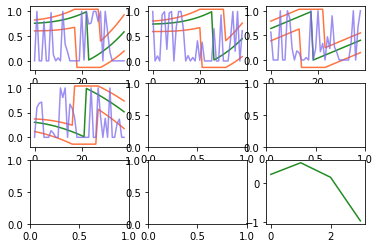

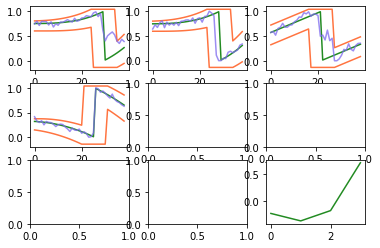

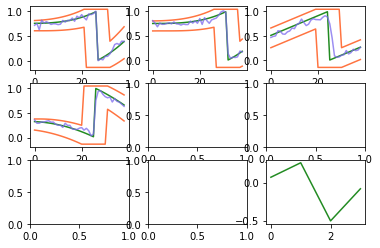

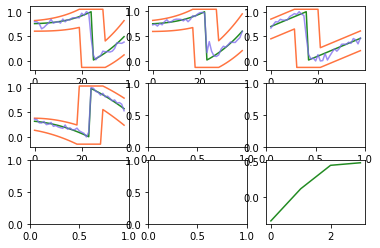

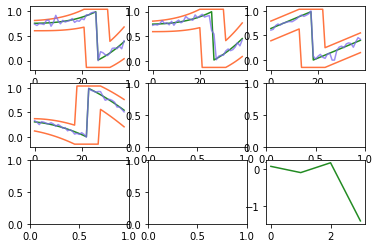

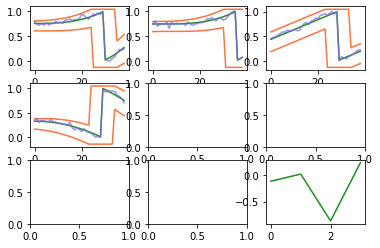

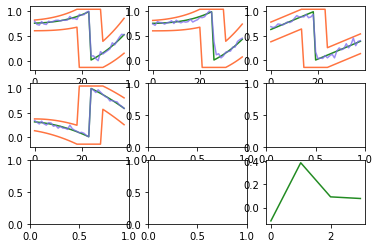

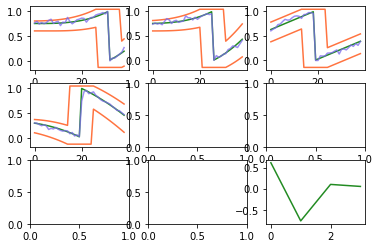

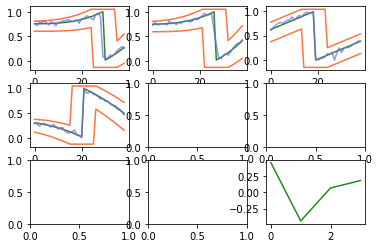

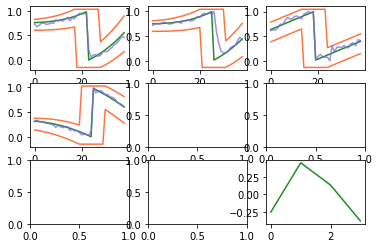

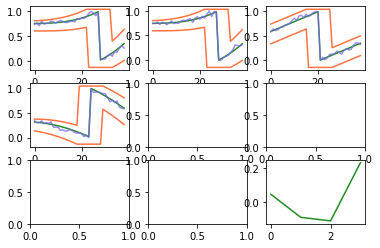

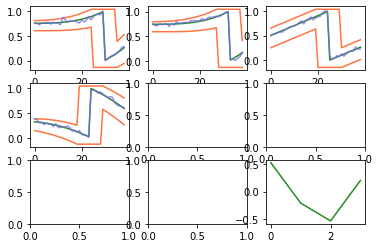

In [22]:
val_env.reset_envs_sampled()
train_policy(
    trainer=bc_trainer, 
    learn_fct = bc_trainer.train, 
    val_env=val_env, 
    logname='BC_train_medium', 
    path='/home/hendrik/Documents/master_project/LokalData/stableBaselines/', 
    n_epochs=10000, 
    n_steps=100,
    eval_epochs=200)

In [ ]:
train_env.reset_envs_sampled()

In [ ]:
rein_trainer = PPO("MlpPolicy", train_env, verbose=1, )

In [ ]:
rein_trainer.policy = bc_trainer.policy

In [ ]:
bc_trainer.policy.load_state_dict(torch.load('/home/hendrik/Documents/master_project/LokalData/test/bc_hard_100tensor(0.5380)'))
rein_model.policy = bc_trainer.policy

In [ ]:
rein_trainer = SAC("MlpPolicy", train_env, verbose=0)
rein_trainer.policy = bc_trainer.policy


In [ ]:
import gym
from stable_baselines3 import PPO
import torch
import numpy as np
from imitation.algorithms import bc
from utilsMW.dataLoaderMW import TorchDatasetMWToy

import numpy as np

from stable_baselines3.common.policies import ActorCriticPolicy

from searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy
path_train = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/train/'
path_validate = '/home/hendrik/Documents/master_project/LokalData/metaworld/large/val/'
train_data = TorchDatasetMWToy(path=path_train, device='cpu')
val_data = TorchDatasetMWToy(path=path_validate, device='cpu')
print(train_data.data.shape)
print(train_data.label.shape)
MyEnv.set_train_data(train_data, tol_neg=-0.8, tol_pos=0.8, window=31)
ToyExpertModel.set_datasets(train_data=train_data, val_data=val_data)
train_env = MyEnv()
val_env = MyEnv(data=val_data)
my_expert = ToyExpertModel(train_data=train_data, env=train_env)

In [ ]:
class LearnWrapper():
    def __init__(self, trainer):
        self.trainer = trainer
    
    def train(self, n_epochs):
        self.trainer.learn(total_timesteps=n_epochs, log_interval=140000)
            

In [ ]:
learn_wrapper = LearnWrapper(my_expert)
train_env.reset_envs_sampled()
benchmark_policy(trainer=my_expert, learn_fct = learn_wrapper.train, val_env=val_env, logname='SAC trainer test', path='/home/hendrik/Documents/master_project/LokalData/stableBaselines/', n_epochs=100, n_steps=10, eval_epochs=100)


In [ ]:
envp = gym.make("Pendulum-v1")

In [ ]:
def get_num_bits(interger):
    return int(torch.ceil(torch.log2(torch.tensor(interger))))

In [ ]:
get_num_bits(200)

In [ ]:
import gym
import numpy as np

from stable_baselines3 import SAC

env = envp

model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)
model.save("sac_pendulum")

del model # remove to demonstrate saving and loading

model = SAC.load("sac_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()